## TBMI26 - Deep Learning Lab ##
### Lab overview ###
In this lab, you will experience the power of deep learning in an image classification task. The aim is to create a Convolutional Neural Network (CNN) and train it on CIFAR10 dataset.
***
** CNN **
There are hundreds, maybe thousands, of CNN architectures for image classification. In this lab, we will train LeNet [1] on image classification dataset. The architecture of the network is shown below
<img src="images/lenet.png" alt="Lenet Architecture" title="Lenet Architecture" />

Your <font color=blue>**first task**</font> is to try different combinations of activation functions and subsampling methods. For example:
1. Sigmoid activation + average pooling subsampling 
2. Sigmoid activation + max pooling subsampling 
3. ReLU activation + average pooling subsampling 

***

The <font color=blue>**second task**</font> is to plot the convergence curves (loss vs. epochs) and (accuracy vs. epochs) and see which of the three combinations above converges faster.

***

** CIFAR10 **
It is one of the earliest datasets for image classification. It has 60,000 images of 10 different classes of images. The dataset is divided into a training set (50,000 images) and a test set (10,000 images)

Your <font color=blue>**third task**</font> is to take the last network from the first task and retrain it again using data augmentation (random horizontal flip and random crop). How does this affect the performance of the network ?

***

The <font color=blue>**final task**</font> is to show some test images with their correpsonding groundtruth and predictions

***

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

### Import Modules

In [5]:
import os
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from models.Lenet import LeNet
from train import *
from test import *

%matplotlib notebook  

# Autoreload modules when they are updated
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Download and Load CIFAR-10 Dataset
First, we download and load the CIFAR10 dataset. Pytorch has a built-in function for that. We apply transformations on images in training set and test set separately. These transformations are *ToTensor* which normalizes the images to the range from 0 to 1 and then *Normalize* which does contrast normalization for all images to make them zero mean along each channel. Contrast normalization was shown to improve the accuracy of CNNs. More data augmentation trasformations could be added to *transform_train*.

In [6]:
# Check if CUDA support is available (GPU)
use_cuda = torch.cuda.is_available()

# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Image transformations for the test set.
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

# Specify classes labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Load and initialize the network model
The network is constructed by creating an object of the class LeNet which defines the network architecture. By default, when this object is created, the weights of each convolution layer are initialized randomly.
Afterwards, we define the loss function. We use *CrossEntropyLoss* as it suits multi-label classification tasks. Then we define the training optimizer, you can choose between the famous gradient descent *SGD* or Adam optimizer.

### 1. Sigmoid activation + average pooling subsampling

In [16]:
# Load and initialize the network architecture 
model1 = LeNet(activation=F.sigmoid, pooling=F.avg_pool2d, pretrained=False)


# Load the last save checkpoint
use_checkpoint=False


if use_cuda:
    model1.cuda()
    cudnn.benchmark = True

# The objective (loss) function
objective = nn.CrossEntropyLoss()

# The optimizer used for training the model
optimizer = optim.Adam(model1.parameters())

#### Start Training

In [17]:
start_epoch = 1
num_epochs = 50
model1, loss_log1, acc_log1 = train(model1, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=num_epochs)


Epoch: 1
Loss: 2.39287424 | Acc: 8.98% (23/256)
Loss: 2.37693036 | Acc: 9.57% (49/512)
Loss: 2.36097670 | Acc: 9.38% (72/768)
Loss: 2.34982151 | Acc: 9.47% (97/1024)
Loss: 2.34366136 | Acc: 9.14% (117/1280)
Loss: 2.33599969 | Acc: 9.51% (146/1536)
Loss: 2.33203578 | Acc: 9.77% (175/1792)
Loss: 2.33041057 | Acc: 9.42% (193/2048)
Loss: 2.32789818 | Acc: 9.59% (221/2304)
Loss: 2.32420437 | Acc: 10.00% (256/2560)
Loss: 2.32302007 | Acc: 9.94% (280/2816)
Loss: 2.32241493 | Acc: 9.77% (300/3072)
Loss: 2.32203251 | Acc: 9.71% (323/3328)
Loss: 2.32104434 | Acc: 9.88% (354/3584)
Loss: 2.31949056 | Acc: 9.90% (380/3840)
Loss: 2.31862117 | Acc: 9.89% (405/4096)
Loss: 2.31823265 | Acc: 9.90% (431/4352)
Loss: 2.31794544 | Acc: 9.79% (451/4608)
Loss: 2.31736267 | Acc: 9.87% (480/4864)
Loss: 2.31706452 | Acc: 9.86% (505/5120)
Loss: 2.31649604 | Acc: 9.84% (529/5376)
Loss: 2.31601644 | Acc: 9.84% (554/5632)
Loss: 2.31532171 | Acc: 9.85% (580/5888)
Loss: 2.31472462 | Acc: 9.96% (612/6144)
Loss: 2.3142

Loss: 2.16318784 | Acc: 17.99% (8934/49664)
Loss: 2.16220207 | Acc: 18.04% (9006/49920)
Loss: 2.16148720 | Acc: 18.04% (9022/50000)

Epoch: 2
Loss: 2.02531838 | Acc: 23.83% (61/256)
Loss: 1.97593051 | Acc: 26.37% (135/512)
Loss: 1.95919844 | Acc: 28.78% (221/768)
Loss: 1.96143326 | Acc: 28.32% (290/1024)
Loss: 1.96480403 | Acc: 27.73% (355/1280)
Loss: 1.96236163 | Acc: 27.80% (427/1536)
Loss: 1.96097393 | Acc: 27.79% (498/1792)
Loss: 1.96672709 | Acc: 27.64% (566/2048)
Loss: 1.97285510 | Acc: 27.39% (631/2304)
Loss: 1.97195278 | Acc: 26.95% (690/2560)
Loss: 1.96967028 | Acc: 26.99% (760/2816)
Loss: 1.97027849 | Acc: 27.28% (838/3072)
Loss: 1.97374354 | Acc: 26.95% (897/3328)
Loss: 1.97786148 | Acc: 26.62% (954/3584)
Loss: 1.98191599 | Acc: 26.41% (1014/3840)
Loss: 1.97976477 | Acc: 26.54% (1087/4096)
Loss: 1.97744046 | Acc: 26.61% (1158/4352)
Loss: 1.97518399 | Acc: 26.95% (1242/4608)
Loss: 1.97501383 | Acc: 26.83% (1305/4864)
Loss: 1.97254441 | Acc: 26.95% (1380/5120)
Loss: 1.97211671

Loss: 1.90872511 | Acc: 29.45% (14097/47872)
Loss: 1.90830367 | Acc: 29.48% (14188/48128)
Loss: 1.90757151 | Acc: 29.51% (14277/48384)
Loss: 1.90743171 | Acc: 29.52% (14357/48640)
Loss: 1.90683004 | Acc: 29.53% (14440/48896)
Loss: 1.90691342 | Acc: 29.53% (14517/49152)
Loss: 1.90665697 | Acc: 29.56% (14604/49408)
Loss: 1.90671879 | Acc: 29.56% (14681/49664)
Loss: 1.90650546 | Acc: 29.58% (14768/49920)
Loss: 1.90546181 | Acc: 29.59% (14797/50000)

Epoch: 3
Loss: 1.84852898 | Acc: 35.55% (91/256)
Loss: 1.85891962 | Acc: 34.38% (176/512)
Loss: 1.84935319 | Acc: 32.29% (248/768)
Loss: 1.85750520 | Acc: 32.42% (332/1024)
Loss: 1.84571185 | Acc: 33.20% (425/1280)
Loss: 1.85731320 | Acc: 32.03% (492/1536)
Loss: 1.85416569 | Acc: 32.14% (576/1792)
Loss: 1.85359728 | Acc: 32.08% (657/2048)
Loss: 1.85988031 | Acc: 31.68% (730/2304)
Loss: 1.86000354 | Acc: 31.68% (811/2560)
Loss: 1.85611421 | Acc: 31.92% (899/2816)
Loss: 1.85362136 | Acc: 31.87% (979/3072)
Loss: 1.85292882 | Acc: 31.70% (1055/332

Loss: 1.81589788 | Acc: 33.47% (15251/45568)
Loss: 1.81582304 | Acc: 33.45% (15327/45824)
Loss: 1.81575625 | Acc: 33.45% (15412/46080)
Loss: 1.81531510 | Acc: 33.44% (15495/46336)
Loss: 1.81536105 | Acc: 33.43% (15577/46592)
Loss: 1.81514123 | Acc: 33.45% (15669/46848)
Loss: 1.81483210 | Acc: 33.46% (15762/47104)
Loss: 1.81446303 | Acc: 33.46% (15849/47360)
Loss: 1.81464634 | Acc: 33.43% (15917/47616)
Loss: 1.81424384 | Acc: 33.44% (16010/47872)
Loss: 1.81380540 | Acc: 33.47% (16110/48128)
Loss: 1.81331407 | Acc: 33.49% (16203/48384)
Loss: 1.81311139 | Acc: 33.50% (16293/48640)
Loss: 1.81324708 | Acc: 33.47% (16366/48896)
Loss: 1.81329329 | Acc: 33.47% (16453/49152)
Loss: 1.81327254 | Acc: 33.46% (16533/49408)
Loss: 1.81284351 | Acc: 33.47% (16623/49664)
Loss: 1.81251604 | Acc: 33.50% (16725/49920)
Loss: 1.81187078 | Acc: 33.51% (16755/50000)

Epoch: 4
Loss: 1.80922425 | Acc: 36.33% (93/256)
Loss: 1.81910861 | Acc: 32.62% (167/512)
Loss: 1.78679486 | Acc: 34.77% (267/768)
Loss: 1.79245

Loss: 1.73823789 | Acc: 36.11% (15808/43776)
Loss: 1.73801058 | Acc: 36.14% (15915/44032)
Loss: 1.73852839 | Acc: 36.10% (15989/44288)
Loss: 1.73828603 | Acc: 36.12% (16089/44544)
Loss: 1.73802315 | Acc: 36.15% (16197/44800)
Loss: 1.73730956 | Acc: 36.18% (16303/45056)
Loss: 1.73698968 | Acc: 36.19% (16400/45312)
Loss: 1.73758910 | Acc: 36.17% (16483/45568)
Loss: 1.73718143 | Acc: 36.19% (16585/45824)
Loss: 1.73687644 | Acc: 36.21% (16684/46080)
Loss: 1.73667492 | Acc: 36.21% (16778/46336)
Loss: 1.73627002 | Acc: 36.23% (16881/46592)
Loss: 1.73616550 | Acc: 36.25% (16984/46848)
Loss: 1.73622069 | Acc: 36.26% (17082/47104)
Loss: 1.73635601 | Acc: 36.26% (17173/47360)
Loss: 1.73637430 | Acc: 36.24% (17258/47616)
Loss: 1.73583666 | Acc: 36.26% (17356/47872)
Loss: 1.73572096 | Acc: 36.26% (17449/48128)
Loss: 1.73532946 | Acc: 36.26% (17546/48384)
Loss: 1.73491117 | Acc: 36.26% (17638/48640)
Loss: 1.73473661 | Acc: 36.27% (17737/48896)
Loss: 1.73446399 | Acc: 36.28% (17832/49152)
Loss: 1.73

Loss: 1.66386070 | Acc: 38.90% (16032/41216)
Loss: 1.66371627 | Acc: 38.90% (16131/41472)
Loss: 1.66399167 | Acc: 38.89% (16227/41728)
Loss: 1.66463672 | Acc: 38.86% (16317/41984)
Loss: 1.66479660 | Acc: 38.85% (16412/42240)
Loss: 1.66467846 | Acc: 38.87% (16518/42496)
Loss: 1.66445778 | Acc: 38.86% (16615/42752)
Loss: 1.66519611 | Acc: 38.83% (16702/43008)
Loss: 1.66490936 | Acc: 38.84% (16802/43264)
Loss: 1.66418021 | Acc: 38.87% (16918/43520)
Loss: 1.66435181 | Acc: 38.86% (17013/43776)
Loss: 1.66471349 | Acc: 38.86% (17113/44032)
Loss: 1.66430221 | Acc: 38.87% (17214/44288)
Loss: 1.66430749 | Acc: 38.90% (17327/44544)
Loss: 1.66381483 | Acc: 38.91% (17432/44800)
Loss: 1.66404440 | Acc: 38.89% (17523/45056)
Loss: 1.66384831 | Acc: 38.88% (17616/45312)
Loss: 1.66439616 | Acc: 38.87% (17712/45568)
Loss: 1.66426555 | Acc: 38.86% (17808/45824)
Loss: 1.66391265 | Acc: 38.88% (17917/46080)
Loss: 1.66346783 | Acc: 38.88% (18017/46336)
Loss: 1.66351669 | Acc: 38.87% (18112/46592)
Loss: 1.66

Loss: 1.61607134 | Acc: 40.79% (15768/38656)
Loss: 1.61614730 | Acc: 40.79% (15871/38912)
Loss: 1.61570102 | Acc: 40.79% (15978/39168)
Loss: 1.61514310 | Acc: 40.81% (16090/39424)
Loss: 1.61523726 | Acc: 40.84% (16205/39680)
Loss: 1.61474111 | Acc: 40.87% (16320/39936)
Loss: 1.61491925 | Acc: 40.84% (16414/40192)
Loss: 1.61431840 | Acc: 40.87% (16533/40448)
Loss: 1.61431571 | Acc: 40.87% (16637/40704)
Loss: 1.61523013 | Acc: 40.84% (16728/40960)
Loss: 1.61457734 | Acc: 40.87% (16844/41216)
Loss: 1.61555879 | Acc: 40.84% (16938/41472)
Loss: 1.61541373 | Acc: 40.86% (17049/41728)
Loss: 1.61450094 | Acc: 40.88% (17162/41984)
Loss: 1.61427804 | Acc: 40.88% (17269/42240)
Loss: 1.61386298 | Acc: 40.89% (17376/42496)
Loss: 1.61395437 | Acc: 40.88% (17476/42752)
Loss: 1.61413493 | Acc: 40.88% (17580/43008)
Loss: 1.61429966 | Acc: 40.89% (17691/43264)
Loss: 1.61396312 | Acc: 40.91% (17806/43520)
Loss: 1.61388696 | Acc: 40.92% (17915/43776)
Loss: 1.61366870 | Acc: 40.92% (18017/44032)
Loss: 1.61

Loss: 1.58331862 | Acc: 41.90% (15123/36096)
Loss: 1.58395644 | Acc: 41.88% (15223/36352)
Loss: 1.58435077 | Acc: 41.85% (15319/36608)
Loss: 1.58454813 | Acc: 41.85% (15426/36864)
Loss: 1.58365347 | Acc: 41.87% (15543/37120)
Loss: 1.58382496 | Acc: 41.85% (15643/37376)
Loss: 1.58368643 | Acc: 41.84% (15744/37632)
Loss: 1.58327330 | Acc: 41.86% (15860/37888)
Loss: 1.58285002 | Acc: 41.90% (15983/38144)
Loss: 1.58259017 | Acc: 41.91% (16094/38400)
Loss: 1.58203207 | Acc: 41.94% (16212/38656)
Loss: 1.58205424 | Acc: 41.94% (16318/38912)
Loss: 1.58219777 | Acc: 41.94% (16427/39168)
Loss: 1.58213569 | Acc: 41.96% (16542/39424)
Loss: 1.58156159 | Acc: 41.99% (16661/39680)
Loss: 1.58126263 | Acc: 42.00% (16774/39936)
Loss: 1.58178096 | Acc: 41.97% (16869/40192)
Loss: 1.58216485 | Acc: 41.95% (16969/40448)
Loss: 1.58180337 | Acc: 41.98% (17089/40704)
Loss: 1.58180442 | Acc: 41.96% (17188/40960)
Loss: 1.58125433 | Acc: 41.97% (17297/41216)
Loss: 1.58099064 | Acc: 41.99% (17413/41472)
Loss: 1.58

Loss: 1.54812683 | Acc: 43.09% (14451/33536)
Loss: 1.54825273 | Acc: 43.08% (14559/33792)
Loss: 1.54891826 | Acc: 43.07% (14666/34048)
Loss: 1.54856754 | Acc: 43.06% (14773/34304)
Loss: 1.54845444 | Acc: 43.05% (14878/34560)
Loss: 1.54872476 | Acc: 43.03% (14981/34816)
Loss: 1.54868685 | Acc: 43.03% (15092/35072)
Loss: 1.54840700 | Acc: 43.03% (15202/35328)
Loss: 1.54772232 | Acc: 43.08% (15328/35584)
Loss: 1.54702994 | Acc: 43.11% (15449/35840)
Loss: 1.54790690 | Acc: 43.09% (15555/36096)
Loss: 1.54893225 | Acc: 43.07% (15655/36352)
Loss: 1.54902623 | Acc: 43.04% (15756/36608)
Loss: 1.54805323 | Acc: 43.07% (15879/36864)
Loss: 1.54791114 | Acc: 43.11% (16003/37120)
Loss: 1.54802275 | Acc: 43.11% (16113/37376)
Loss: 1.54809546 | Acc: 43.09% (16215/37632)
Loss: 1.54775120 | Acc: 43.09% (16325/37888)
Loss: 1.54760619 | Acc: 43.08% (16433/38144)
Loss: 1.54786139 | Acc: 43.08% (16543/38400)
Loss: 1.54751247 | Acc: 43.09% (16658/38656)
Loss: 1.54731900 | Acc: 43.11% (16776/38912)
Loss: 1.54

Loss: 1.52331485 | Acc: 44.26% (13936/31488)
Loss: 1.52261473 | Acc: 44.28% (14056/31744)
Loss: 1.52297554 | Acc: 44.29% (14173/32000)
Loss: 1.52325481 | Acc: 44.27% (14281/32256)
Loss: 1.52443745 | Acc: 44.24% (14384/32512)
Loss: 1.52409606 | Acc: 44.24% (14498/32768)
Loss: 1.52400933 | Acc: 44.25% (14612/33024)
Loss: 1.52448410 | Acc: 44.22% (14716/33280)
Loss: 1.52478795 | Acc: 44.26% (14844/33536)
Loss: 1.52468055 | Acc: 44.25% (14954/33792)
Loss: 1.52484430 | Acc: 44.23% (15061/34048)
Loss: 1.52430689 | Acc: 44.27% (15186/34304)
Loss: 1.52382791 | Acc: 44.29% (15305/34560)
Loss: 1.52378316 | Acc: 44.28% (15416/34816)
Loss: 1.52374329 | Acc: 44.26% (15522/35072)
Loss: 1.52380792 | Acc: 44.27% (15639/35328)
Loss: 1.52316900 | Acc: 44.28% (15756/35584)
Loss: 1.52252970 | Acc: 44.30% (15878/35840)
Loss: 1.52237267 | Acc: 44.32% (15998/36096)
Loss: 1.52273199 | Acc: 44.31% (16107/36352)
Loss: 1.52341583 | Acc: 44.28% (16209/36608)
Loss: 1.52313644 | Acc: 44.25% (16314/36864)
Loss: 1.52

Loss: 1.50175581 | Acc: 45.29% (14028/30976)
Loss: 1.50197987 | Acc: 45.27% (14138/31232)
Loss: 1.50176790 | Acc: 45.26% (14252/31488)
Loss: 1.50090772 | Acc: 45.30% (14379/31744)
Loss: 1.50052728 | Acc: 45.31% (14498/32000)
Loss: 1.50111620 | Acc: 45.29% (14610/32256)
Loss: 1.50118298 | Acc: 45.30% (14727/32512)
Loss: 1.50060797 | Acc: 45.30% (14845/32768)
Loss: 1.50078683 | Acc: 45.31% (14962/33024)
Loss: 1.50083638 | Acc: 45.29% (15073/33280)
Loss: 1.50054291 | Acc: 45.30% (15193/33536)
Loss: 1.50099670 | Acc: 45.28% (15300/33792)
Loss: 1.50097597 | Acc: 45.29% (15422/34048)
Loss: 1.50104046 | Acc: 45.30% (15539/34304)
Loss: 1.50105775 | Acc: 45.27% (15644/34560)
Loss: 1.50050050 | Acc: 45.28% (15766/34816)
Loss: 1.50038258 | Acc: 45.28% (15882/35072)
Loss: 1.49982539 | Acc: 45.30% (16002/35328)
Loss: 1.49981172 | Acc: 45.29% (16115/35584)
Loss: 1.49951698 | Acc: 45.30% (16234/35840)
Loss: 1.49954247 | Acc: 45.31% (16355/36096)
Loss: 1.49999185 | Acc: 45.28% (16462/36352)
Loss: 1.49

Loss: 1.48027901 | Acc: 45.98% (13067/28416)
Loss: 1.48102677 | Acc: 45.98% (13182/28672)
Loss: 1.48152522 | Acc: 45.97% (13297/28928)
Loss: 1.48183765 | Acc: 45.97% (13417/29184)
Loss: 1.48192399 | Acc: 45.95% (13529/29440)
Loss: 1.48219448 | Acc: 45.95% (13645/29696)
Loss: 1.48180766 | Acc: 45.96% (13765/29952)
Loss: 1.48174512 | Acc: 45.93% (13876/30208)
Loss: 1.48169408 | Acc: 45.94% (13996/30464)
Loss: 1.48169514 | Acc: 45.93% (14110/30720)
Loss: 1.48178080 | Acc: 45.92% (14225/30976)
Loss: 1.48275062 | Acc: 45.92% (14341/31232)
Loss: 1.48392907 | Acc: 45.89% (14450/31488)
Loss: 1.48367983 | Acc: 45.91% (14574/31744)
Loss: 1.48351261 | Acc: 45.89% (14685/32000)
Loss: 1.48310576 | Acc: 45.87% (14796/32256)
Loss: 1.48320444 | Acc: 45.86% (14909/32512)
Loss: 1.48324432 | Acc: 45.87% (15030/32768)
Loss: 1.48306331 | Acc: 45.88% (15153/33024)
Loss: 1.48307305 | Acc: 45.88% (15270/33280)
Loss: 1.48293156 | Acc: 45.88% (15385/33536)
Loss: 1.48273816 | Acc: 45.86% (15497/33792)
Loss: 1.48

Loss: 1.45986245 | Acc: 46.74% (12085/25856)
Loss: 1.45995240 | Acc: 46.77% (12213/26112)
Loss: 1.46012087 | Acc: 46.75% (12327/26368)
Loss: 1.45918634 | Acc: 46.76% (12450/26624)
Loss: 1.45994594 | Acc: 46.74% (12565/26880)
Loss: 1.45898596 | Acc: 46.78% (12695/27136)
Loss: 1.45866367 | Acc: 46.81% (12821/27392)
Loss: 1.45910984 | Acc: 46.79% (12936/27648)
Loss: 1.46022811 | Acc: 46.75% (13045/27904)
Loss: 1.46022068 | Acc: 46.76% (13168/28160)
Loss: 1.46056630 | Acc: 46.74% (13283/28416)
Loss: 1.46106397 | Acc: 46.73% (13399/28672)
Loss: 1.46129725 | Acc: 46.74% (13520/28928)
Loss: 1.46269371 | Acc: 46.66% (13617/29184)
Loss: 1.46271424 | Acc: 46.67% (13741/29440)
Loss: 1.46332664 | Acc: 46.63% (13847/29696)
Loss: 1.46396461 | Acc: 46.61% (13961/29952)
Loss: 1.46361381 | Acc: 46.64% (14088/30208)
Loss: 1.46295312 | Acc: 46.65% (14211/30464)
Loss: 1.46324923 | Acc: 46.62% (14321/30720)
Loss: 1.46215225 | Acc: 46.66% (14453/30976)
Loss: 1.46271955 | Acc: 46.66% (14572/31232)
Loss: 1.46

Loss: 1.44230079 | Acc: 47.34% (11029/23296)
Loss: 1.44174534 | Acc: 47.35% (11151/23552)
Loss: 1.44042695 | Acc: 47.40% (11285/23808)
Loss: 1.44025492 | Acc: 47.42% (11412/24064)
Loss: 1.44057656 | Acc: 47.43% (11535/24320)
Loss: 1.44091716 | Acc: 47.39% (11647/24576)
Loss: 1.44231785 | Acc: 47.31% (11749/24832)
Loss: 1.44156079 | Acc: 47.35% (11878/25088)
Loss: 1.44123723 | Acc: 47.34% (11998/25344)
Loss: 1.44105337 | Acc: 47.38% (12129/25600)
Loss: 1.44215374 | Acc: 47.34% (12241/25856)
Loss: 1.44241014 | Acc: 47.35% (12364/26112)
Loss: 1.44149856 | Acc: 47.43% (12506/26368)
Loss: 1.44044726 | Acc: 47.45% (12634/26624)
Loss: 1.44030176 | Acc: 47.47% (12760/26880)
Loss: 1.43995468 | Acc: 47.52% (12896/27136)
Loss: 1.43945512 | Acc: 47.54% (13022/27392)
Loss: 1.43894825 | Acc: 47.56% (13149/27648)
Loss: 1.43824794 | Acc: 47.61% (13286/27904)
Loss: 1.43758720 | Acc: 47.65% (13417/28160)
Loss: 1.43801176 | Acc: 47.65% (13540/28416)
Loss: 1.43806483 | Acc: 47.62% (13654/28672)
Loss: 1.43

Loss: 1.42697724 | Acc: 47.87% (9926/20736)
Loss: 1.42700859 | Acc: 47.85% (10045/20992)
Loss: 1.42623364 | Acc: 47.89% (10176/21248)
Loss: 1.42684409 | Acc: 47.86% (10292/21504)
Loss: 1.42613051 | Acc: 47.90% (10424/21760)
Loss: 1.42656120 | Acc: 47.89% (10543/22016)
Loss: 1.42634901 | Acc: 47.89% (10666/22272)
Loss: 1.42577109 | Acc: 47.96% (10805/22528)
Loss: 1.42551885 | Acc: 47.93% (10921/22784)
Loss: 1.42584998 | Acc: 47.92% (11041/23040)
Loss: 1.42564915 | Acc: 47.95% (11170/23296)
Loss: 1.42634869 | Acc: 47.92% (11286/23552)
Loss: 1.42505709 | Acc: 47.96% (11419/23808)
Loss: 1.42601416 | Acc: 47.92% (11531/24064)
Loss: 1.42642092 | Acc: 47.89% (11648/24320)
Loss: 1.42762447 | Acc: 47.90% (11772/24576)
Loss: 1.42690584 | Acc: 47.96% (11910/24832)
Loss: 1.42690538 | Acc: 47.93% (12025/25088)
Loss: 1.42744791 | Acc: 47.88% (12135/25344)
Loss: 1.42659149 | Acc: 47.94% (12273/25600)
Loss: 1.42713170 | Acc: 47.92% (12391/25856)
Loss: 1.42643252 | Acc: 47.99% (12531/26112)
Loss: 1.426

Loss: 1.41647601 | Acc: 48.78% (8866/18176)
Loss: 1.41742172 | Acc: 48.77% (8989/18432)
Loss: 1.41766972 | Acc: 48.74% (9108/18688)
Loss: 1.41732017 | Acc: 48.74% (9234/18944)
Loss: 1.41758113 | Acc: 48.78% (9365/19200)
Loss: 1.41698453 | Acc: 48.77% (9488/19456)
Loss: 1.41726831 | Acc: 48.79% (9618/19712)
Loss: 1.41637180 | Acc: 48.85% (9754/19968)
Loss: 1.41778628 | Acc: 48.71% (9851/20224)
Loss: 1.41819253 | Acc: 48.69% (9972/20480)
Loss: 1.41895667 | Acc: 48.62% (10081/20736)
Loss: 1.41805017 | Acc: 48.65% (10212/20992)
Loss: 1.41886102 | Acc: 48.61% (10328/21248)
Loss: 1.41914512 | Acc: 48.58% (10447/21504)
Loss: 1.41968229 | Acc: 48.55% (10565/21760)
Loss: 1.41908902 | Acc: 48.54% (10687/22016)
Loss: 1.41943244 | Acc: 48.53% (10809/22272)
Loss: 1.41907428 | Acc: 48.53% (10932/22528)
Loss: 1.41839087 | Acc: 48.53% (11058/22784)
Loss: 1.41925024 | Acc: 48.54% (11184/23040)
Loss: 1.41851061 | Acc: 48.58% (11317/23296)
Loss: 1.41883989 | Acc: 48.55% (11434/23552)
Loss: 1.41765889 | A

Loss: 1.39068362 | Acc: 49.12% (7671/15616)
Loss: 1.39072443 | Acc: 49.14% (7799/15872)
Loss: 1.39061444 | Acc: 49.19% (7933/16128)
Loss: 1.39068289 | Acc: 49.15% (8053/16384)
Loss: 1.39118284 | Acc: 49.15% (8178/16640)
Loss: 1.39172242 | Acc: 49.09% (8295/16896)
Loss: 1.39095474 | Acc: 49.10% (8421/17152)
Loss: 1.39083576 | Acc: 49.04% (8537/17408)
Loss: 1.39019347 | Acc: 49.04% (8662/17664)
Loss: 1.39021155 | Acc: 49.08% (8795/17920)
Loss: 1.38923607 | Acc: 49.14% (8931/18176)
Loss: 1.38994694 | Acc: 49.12% (9053/18432)
Loss: 1.38929551 | Acc: 49.12% (9180/18688)
Loss: 1.39030044 | Acc: 49.12% (9305/18944)
Loss: 1.38970386 | Acc: 49.17% (9440/19200)
Loss: 1.38996332 | Acc: 49.17% (9567/19456)
Loss: 1.39015550 | Acc: 49.24% (9706/19712)
Loss: 1.39109559 | Acc: 49.26% (9837/19968)
Loss: 1.39213416 | Acc: 49.17% (9945/20224)
Loss: 1.39055185 | Acc: 49.23% (10083/20480)
Loss: 1.38920092 | Acc: 49.32% (10226/20736)
Loss: 1.39042929 | Acc: 49.23% (10335/20992)
Loss: 1.39268638 | Acc: 49.15

Loss: 1.36655456 | Acc: 49.89% (6513/13056)
Loss: 1.36687522 | Acc: 49.90% (6643/13312)
Loss: 1.36478830 | Acc: 50.00% (6784/13568)
Loss: 1.36510466 | Acc: 50.03% (6916/13824)
Loss: 1.36453767 | Acc: 50.13% (7059/14080)
Loss: 1.36498344 | Acc: 50.20% (7196/14336)
Loss: 1.36445425 | Acc: 50.22% (7328/14592)
Loss: 1.36414718 | Acc: 50.23% (7458/14848)
Loss: 1.36400524 | Acc: 50.21% (7583/15104)
Loss: 1.36463466 | Acc: 50.21% (7713/15360)
Loss: 1.36620252 | Acc: 50.11% (7825/15616)
Loss: 1.36862703 | Acc: 49.97% (7932/15872)
Loss: 1.36900822 | Acc: 49.99% (8063/16128)
Loss: 1.36886895 | Acc: 50.03% (8197/16384)
Loss: 1.36882647 | Acc: 50.03% (8325/16640)
Loss: 1.36894151 | Acc: 50.01% (8450/16896)
Loss: 1.36894842 | Acc: 50.02% (8579/17152)
Loss: 1.36954115 | Acc: 50.02% (8707/17408)
Loss: 1.36930619 | Acc: 50.02% (8835/17664)
Loss: 1.36930129 | Acc: 49.99% (8959/17920)
Loss: 1.36926259 | Acc: 50.01% (9090/18176)
Loss: 1.36846070 | Acc: 50.08% (9231/18432)
Loss: 1.36758509 | Acc: 50.07% (

Loss: 1.37374761 | Acc: 50.22% (5271/10496)
Loss: 1.37285590 | Acc: 50.32% (5410/10752)
Loss: 1.37160374 | Acc: 50.35% (5542/11008)
Loss: 1.36990038 | Acc: 50.37% (5674/11264)
Loss: 1.36919096 | Acc: 50.43% (5810/11520)
Loss: 1.36984821 | Acc: 50.30% (5923/11776)
Loss: 1.37019916 | Acc: 50.25% (6046/12032)
Loss: 1.36968230 | Acc: 50.29% (6180/12288)
Loss: 1.36956221 | Acc: 50.32% (6312/12544)
Loss: 1.37144858 | Acc: 50.30% (6438/12800)
Loss: 1.37154573 | Acc: 50.29% (6566/13056)
Loss: 1.37040215 | Acc: 50.40% (6709/13312)
Loss: 1.36984393 | Acc: 50.46% (6846/13568)
Loss: 1.36969197 | Acc: 50.41% (6969/13824)
Loss: 1.36997526 | Acc: 50.43% (7101/14080)
Loss: 1.36972732 | Acc: 50.38% (7223/14336)
Loss: 1.36871950 | Acc: 50.42% (7357/14592)
Loss: 1.36911838 | Acc: 50.45% (7491/14848)
Loss: 1.36899101 | Acc: 50.44% (7618/15104)
Loss: 1.36948733 | Acc: 50.40% (7741/15360)
Loss: 1.37014967 | Acc: 50.38% (7867/15616)
Loss: 1.37050189 | Acc: 50.37% (7994/15872)
Loss: 1.37172427 | Acc: 50.29% (

Loss: 1.34333100 | Acc: 50.98% (4046/7936)
Loss: 1.34653173 | Acc: 50.83% (4164/8192)
Loss: 1.34508021 | Acc: 50.97% (4306/8448)
Loss: 1.34618215 | Acc: 50.88% (4429/8704)
Loss: 1.34662063 | Acc: 50.84% (4555/8960)
Loss: 1.34547352 | Acc: 50.84% (4685/9216)
Loss: 1.34201344 | Acc: 50.98% (4829/9472)
Loss: 1.34094401 | Acc: 51.05% (4966/9728)
Loss: 1.34068594 | Acc: 51.17% (5109/9984)
Loss: 1.34226696 | Acc: 51.23% (5246/10240)
Loss: 1.33991698 | Acc: 51.29% (5383/10496)
Loss: 1.34020814 | Acc: 51.29% (5515/10752)
Loss: 1.34105510 | Acc: 51.32% (5649/11008)
Loss: 1.34423443 | Acc: 51.23% (5770/11264)
Loss: 1.34344393 | Acc: 51.28% (5907/11520)
Loss: 1.34139449 | Acc: 51.35% (6047/11776)
Loss: 1.34059968 | Acc: 51.36% (6180/12032)
Loss: 1.34161174 | Acc: 51.42% (6319/12288)
Loss: 1.34433824 | Acc: 51.30% (6435/12544)
Loss: 1.34253249 | Acc: 51.37% (6575/12800)
Loss: 1.34454794 | Acc: 51.30% (6698/13056)
Loss: 1.34654094 | Acc: 51.16% (6810/13312)
Loss: 1.34478761 | Acc: 51.22% (6949/1356

Loss: 1.34034447 | Acc: 52.72% (2834/5376)
Loss: 1.34180239 | Acc: 52.59% (2962/5632)
Loss: 1.33938055 | Acc: 52.53% (3093/5888)
Loss: 1.33665734 | Acc: 52.54% (3228/6144)
Loss: 1.33201982 | Acc: 52.61% (3367/6400)
Loss: 1.32991361 | Acc: 52.69% (3507/6656)
Loss: 1.33570711 | Acc: 52.34% (3618/6912)
Loss: 1.33399930 | Acc: 52.37% (3754/7168)
Loss: 1.33439989 | Acc: 52.22% (3877/7424)
Loss: 1.33572193 | Acc: 52.11% (4002/7680)
Loss: 1.33339552 | Acc: 52.31% (4151/7936)
Loss: 1.33641179 | Acc: 52.03% (4262/8192)
Loss: 1.33449815 | Acc: 51.95% (4389/8448)
Loss: 1.33394342 | Acc: 52.09% (4534/8704)
Loss: 1.33410510 | Acc: 51.99% (4658/8960)
Loss: 1.33396507 | Acc: 51.93% (4786/9216)
Loss: 1.33594915 | Acc: 51.86% (4912/9472)
Loss: 1.33837817 | Acc: 51.71% (5030/9728)
Loss: 1.33812600 | Acc: 51.75% (5167/9984)
Loss: 1.34146430 | Acc: 51.67% (5291/10240)
Loss: 1.34046425 | Acc: 51.78% (5435/10496)
Loss: 1.33957986 | Acc: 51.80% (5569/10752)
Loss: 1.33858004 | Acc: 51.86% (5709/11008)
Loss: 1

Loss: 1.35131847 | Acc: 49.96% (1407/2816)
Loss: 1.35049802 | Acc: 50.03% (1537/3072)
Loss: 1.34878299 | Acc: 50.06% (1666/3328)
Loss: 1.34365716 | Acc: 50.42% (1807/3584)
Loss: 1.34262804 | Acc: 50.57% (1942/3840)
Loss: 1.33680434 | Acc: 50.83% (2082/4096)
Loss: 1.33514530 | Acc: 51.10% (2224/4352)
Loss: 1.33418563 | Acc: 51.00% (2350/4608)
Loss: 1.34063569 | Acc: 50.74% (2468/4864)
Loss: 1.33574226 | Acc: 50.82% (2602/5120)
Loss: 1.33716256 | Acc: 50.58% (2719/5376)
Loss: 1.33922508 | Acc: 50.59% (2849/5632)
Loss: 1.33906246 | Acc: 50.66% (2983/5888)
Loss: 1.33377519 | Acc: 50.93% (3129/6144)
Loss: 1.33868343 | Acc: 50.83% (3253/6400)
Loss: 1.33709606 | Acc: 50.92% (3389/6656)
Loss: 1.33789027 | Acc: 50.98% (3524/6912)
Loss: 1.34405509 | Acc: 50.88% (3647/7168)
Loss: 1.34320000 | Acc: 50.89% (3778/7424)
Loss: 1.34108709 | Acc: 50.90% (3909/7680)
Loss: 1.33999870 | Acc: 51.02% (4049/7936)
Loss: 1.33850567 | Acc: 51.15% (4190/8192)
Loss: 1.33630380 | Acc: 51.14% (4320/8448)
Loss: 1.337

Loss: 1.25173891 | Acc: 58.20% (149/256)
Loss: 1.30482352 | Acc: 56.25% (288/512)
Loss: 1.29922581 | Acc: 55.73% (428/768)
Loss: 1.30511212 | Acc: 54.69% (560/1024)
Loss: 1.30648024 | Acc: 54.30% (695/1280)
Loss: 1.29150619 | Acc: 54.23% (833/1536)
Loss: 1.30825324 | Acc: 53.24% (954/1792)
Loss: 1.29458539 | Acc: 54.15% (1109/2048)
Loss: 1.30140832 | Acc: 53.86% (1241/2304)
Loss: 1.31088135 | Acc: 53.52% (1370/2560)
Loss: 1.31008666 | Acc: 53.44% (1505/2816)
Loss: 1.31814308 | Acc: 53.29% (1637/3072)
Loss: 1.31506527 | Acc: 53.25% (1772/3328)
Loss: 1.32511187 | Acc: 52.82% (1893/3584)
Loss: 1.32278000 | Acc: 52.92% (2032/3840)
Loss: 1.32209653 | Acc: 53.08% (2174/4096)
Loss: 1.32838981 | Acc: 52.85% (2300/4352)
Loss: 1.32359215 | Acc: 53.04% (2444/4608)
Loss: 1.31847198 | Acc: 52.98% (2577/4864)
Loss: 1.31510743 | Acc: 53.16% (2722/5120)
Loss: 1.31695044 | Acc: 53.03% (2851/5376)
Loss: 1.31208963 | Acc: 53.36% (3005/5632)
Loss: 1.31310541 | Acc: 53.28% (3137/5888)
Loss: 1.31313549 | Ac

Loss: 1.31110571 | Acc: 52.69% (25765/48896)
Loss: 1.31107300 | Acc: 52.68% (25893/49152)
Loss: 1.31099843 | Acc: 52.69% (26031/49408)
Loss: 1.31115226 | Acc: 52.67% (26159/49664)
Loss: 1.31064475 | Acc: 52.69% (26303/49920)
Loss: 1.31046360 | Acc: 52.69% (26347/50000)

Epoch: 23
Loss: 1.30445313 | Acc: 49.61% (127/256)
Loss: 1.28502077 | Acc: 51.95% (266/512)
Loss: 1.27612634 | Acc: 52.99% (407/768)
Loss: 1.25126213 | Acc: 54.59% (559/1024)
Loss: 1.25973558 | Acc: 54.45% (697/1280)
Loss: 1.24958181 | Acc: 54.49% (837/1536)
Loss: 1.26581287 | Acc: 54.91% (984/1792)
Loss: 1.26549251 | Acc: 54.93% (1125/2048)
Loss: 1.26001693 | Acc: 55.38% (1276/2304)
Loss: 1.25689975 | Acc: 55.35% (1417/2560)
Loss: 1.27317022 | Acc: 54.65% (1539/2816)
Loss: 1.28156206 | Acc: 54.20% (1665/3072)
Loss: 1.28620459 | Acc: 53.91% (1794/3328)
Loss: 1.28560500 | Acc: 53.82% (1929/3584)
Loss: 1.29424862 | Acc: 53.26% (2045/3840)
Loss: 1.29532924 | Acc: 53.05% (2173/4096)
Loss: 1.29981996 | Acc: 53.01% (2307/4352

Loss: 1.30304171 | Acc: 52.99% (24552/46336)
Loss: 1.30261826 | Acc: 53.00% (24694/46592)
Loss: 1.30266213 | Acc: 52.99% (24826/46848)
Loss: 1.30284545 | Acc: 52.98% (24957/47104)
Loss: 1.30248412 | Acc: 52.99% (25096/47360)
Loss: 1.30309266 | Acc: 52.95% (25215/47616)
Loss: 1.30267894 | Acc: 52.96% (25351/47872)
Loss: 1.30249211 | Acc: 52.97% (25494/48128)
Loss: 1.30246233 | Acc: 52.99% (25637/48384)
Loss: 1.30280480 | Acc: 52.97% (25765/48640)
Loss: 1.30204540 | Acc: 52.99% (25912/48896)
Loss: 1.30243256 | Acc: 52.99% (26044/49152)
Loss: 1.30245418 | Acc: 52.99% (26179/49408)
Loss: 1.30305183 | Acc: 52.98% (26311/49664)
Loss: 1.30263483 | Acc: 53.00% (26457/49920)
Loss: 1.30255846 | Acc: 53.00% (26499/50000)

Epoch: 24
Loss: 1.30230534 | Acc: 55.86% (143/256)
Loss: 1.31784445 | Acc: 52.73% (270/512)
Loss: 1.32179908 | Acc: 53.12% (408/768)
Loss: 1.28901115 | Acc: 54.00% (553/1024)
Loss: 1.29935532 | Acc: 53.52% (685/1280)
Loss: 1.30597260 | Acc: 53.39% (820/1536)
Loss: 1.29984219 | A

Loss: 1.28667267 | Acc: 53.60% (23463/43776)
Loss: 1.28665828 | Acc: 53.60% (23600/44032)
Loss: 1.28704316 | Acc: 53.59% (23735/44288)
Loss: 1.28695305 | Acc: 53.59% (23869/44544)
Loss: 1.28756016 | Acc: 53.57% (23998/44800)
Loss: 1.28735878 | Acc: 53.59% (24147/45056)
Loss: 1.28765113 | Acc: 53.59% (24281/45312)
Loss: 1.28720893 | Acc: 53.60% (24423/45568)
Loss: 1.28735355 | Acc: 53.60% (24563/45824)
Loss: 1.28781517 | Acc: 53.58% (24691/46080)
Loss: 1.28801791 | Acc: 53.59% (24830/46336)
Loss: 1.28820577 | Acc: 53.57% (24961/46592)
Loss: 1.28800118 | Acc: 53.56% (25094/46848)
Loss: 1.28840833 | Acc: 53.56% (25228/47104)
Loss: 1.28785918 | Acc: 53.58% (25377/47360)
Loss: 1.28810617 | Acc: 53.59% (25517/47616)
Loss: 1.28842128 | Acc: 53.57% (25644/47872)
Loss: 1.28822525 | Acc: 53.59% (25791/48128)
Loss: 1.28799842 | Acc: 53.61% (25938/48384)
Loss: 1.28815225 | Acc: 53.61% (26074/48640)
Loss: 1.28802437 | Acc: 53.62% (26216/48896)
Loss: 1.28852587 | Acc: 53.62% (26353/49152)
Loss: 1.28

Loss: 1.28004513 | Acc: 54.05% (22139/40960)
Loss: 1.28039930 | Acc: 54.02% (22263/41216)
Loss: 1.28021401 | Acc: 54.02% (22403/41472)
Loss: 1.27986095 | Acc: 54.02% (22543/41728)
Loss: 1.27942080 | Acc: 54.01% (22676/41984)
Loss: 1.27981869 | Acc: 54.00% (22811/42240)
Loss: 1.28009689 | Acc: 53.99% (22942/42496)
Loss: 1.27939848 | Acc: 54.01% (23090/42752)
Loss: 1.27965205 | Acc: 54.01% (23230/43008)
Loss: 1.27938601 | Acc: 54.02% (23372/43264)
Loss: 1.28002978 | Acc: 53.96% (23485/43520)
Loss: 1.28011054 | Acc: 53.97% (23625/43776)
Loss: 1.27948445 | Acc: 54.01% (23783/44032)
Loss: 1.27981632 | Acc: 54.01% (23918/44288)
Loss: 1.27952069 | Acc: 54.02% (24063/44544)
Loss: 1.27973034 | Acc: 54.00% (24192/44800)
Loss: 1.27979336 | Acc: 54.00% (24329/45056)
Loss: 1.27978741 | Acc: 54.01% (24472/45312)
Loss: 1.27962652 | Acc: 54.01% (24610/45568)
Loss: 1.27926066 | Acc: 54.00% (24743/45824)
Loss: 1.27959998 | Acc: 53.99% (24880/46080)
Loss: 1.27975491 | Acc: 54.00% (25020/46336)
Loss: 1.28

Loss: 1.26923293 | Acc: 54.28% (20981/38656)
Loss: 1.26934210 | Acc: 54.25% (21111/38912)
Loss: 1.26906984 | Acc: 54.26% (21254/39168)
Loss: 1.26836576 | Acc: 54.29% (21404/39424)
Loss: 1.26803076 | Acc: 54.31% (21550/39680)
Loss: 1.26841580 | Acc: 54.28% (21679/39936)
Loss: 1.26941987 | Acc: 54.24% (21801/40192)
Loss: 1.26933868 | Acc: 54.25% (21943/40448)
Loss: 1.26987160 | Acc: 54.22% (22069/40704)
Loss: 1.26983087 | Acc: 54.21% (22206/40960)
Loss: 1.27025756 | Acc: 54.21% (22345/41216)
Loss: 1.27019873 | Acc: 54.21% (22481/41472)
Loss: 1.27032535 | Acc: 54.22% (22623/41728)
Loss: 1.27023669 | Acc: 54.19% (22752/41984)
Loss: 1.26997539 | Acc: 54.21% (22900/42240)
Loss: 1.27037999 | Acc: 54.20% (23032/42496)
Loss: 1.27026087 | Acc: 54.20% (23173/42752)
Loss: 1.26952084 | Acc: 54.21% (23316/43008)
Loss: 1.26846733 | Acc: 54.26% (23474/43264)
Loss: 1.26834797 | Acc: 54.26% (23613/43520)
Loss: 1.26804070 | Acc: 54.28% (23763/43776)
Loss: 1.26803453 | Acc: 54.29% (23906/44032)
Loss: 1.26

Loss: 1.25560331 | Acc: 54.84% (20358/37120)
Loss: 1.25613337 | Acc: 54.80% (20483/37376)
Loss: 1.25591730 | Acc: 54.84% (20636/37632)
Loss: 1.25549762 | Acc: 54.84% (20777/37888)
Loss: 1.25663346 | Acc: 54.81% (20906/38144)
Loss: 1.25726999 | Acc: 54.81% (21047/38400)
Loss: 1.25747392 | Acc: 54.80% (21185/38656)
Loss: 1.25757629 | Acc: 54.82% (21331/38912)
Loss: 1.25803978 | Acc: 54.79% (21462/39168)
Loss: 1.25855262 | Acc: 54.79% (21600/39424)
Loss: 1.25905158 | Acc: 54.77% (21733/39680)
Loss: 1.25833918 | Acc: 54.77% (21874/39936)
Loss: 1.25777058 | Acc: 54.80% (22024/40192)
Loss: 1.25785474 | Acc: 54.79% (22160/40448)
Loss: 1.25751368 | Acc: 54.81% (22308/40704)
Loss: 1.25784552 | Acc: 54.82% (22455/40960)
Loss: 1.25762604 | Acc: 54.84% (22601/41216)
Loss: 1.25744622 | Acc: 54.85% (22746/41472)
Loss: 1.25732428 | Acc: 54.87% (22898/41728)
Loss: 1.25742182 | Acc: 54.87% (23036/41984)
Loss: 1.25706017 | Acc: 54.89% (23184/42240)
Loss: 1.25765073 | Acc: 54.85% (23311/42496)
Loss: 1.25

Loss: 1.25024982 | Acc: 55.25% (19661/35584)
Loss: 1.24972635 | Acc: 55.26% (19805/35840)
Loss: 1.24995576 | Acc: 55.26% (19946/36096)
Loss: 1.25053608 | Acc: 55.27% (20090/36352)
Loss: 1.25047657 | Acc: 55.28% (20237/36608)
Loss: 1.25018397 | Acc: 55.31% (20389/36864)
Loss: 1.24982286 | Acc: 55.32% (20535/37120)
Loss: 1.24951496 | Acc: 55.32% (20676/37376)
Loss: 1.24946798 | Acc: 55.33% (20821/37632)
Loss: 1.24984906 | Acc: 55.31% (20955/37888)
Loss: 1.25003836 | Acc: 55.29% (21088/38144)
Loss: 1.24973538 | Acc: 55.31% (21239/38400)
Loss: 1.25019830 | Acc: 55.28% (21369/38656)
Loss: 1.24962166 | Acc: 55.29% (21516/38912)
Loss: 1.24919316 | Acc: 55.31% (21665/39168)
Loss: 1.24887242 | Acc: 55.33% (21812/39424)
Loss: 1.24926094 | Acc: 55.30% (21942/39680)
Loss: 1.24953469 | Acc: 55.29% (22080/39936)
Loss: 1.24906687 | Acc: 55.30% (22225/40192)
Loss: 1.24995408 | Acc: 55.27% (22354/40448)
Loss: 1.24973870 | Acc: 55.26% (22492/40704)
Loss: 1.24961115 | Acc: 55.30% (22649/40960)
Loss: 1.24

Loss: 1.23960059 | Acc: 55.44% (18591/33536)
Loss: 1.24042863 | Acc: 55.40% (18722/33792)
Loss: 1.23987783 | Acc: 55.41% (18866/34048)
Loss: 1.23888905 | Acc: 55.47% (19029/34304)
Loss: 1.23850265 | Acc: 55.49% (19178/34560)
Loss: 1.23821320 | Acc: 55.50% (19323/34816)
Loss: 1.23754113 | Acc: 55.54% (19480/35072)
Loss: 1.23735057 | Acc: 55.56% (19629/35328)
Loss: 1.23796576 | Acc: 55.54% (19764/35584)
Loss: 1.23815772 | Acc: 55.53% (19902/35840)
Loss: 1.23869417 | Acc: 55.49% (20031/36096)
Loss: 1.23904691 | Acc: 55.50% (20175/36352)
Loss: 1.23870693 | Acc: 55.51% (20321/36608)
Loss: 1.23922490 | Acc: 55.49% (20455/36864)
Loss: 1.23884545 | Acc: 55.48% (20594/37120)
Loss: 1.23891892 | Acc: 55.47% (20731/37376)
Loss: 1.23867016 | Acc: 55.45% (20868/37632)
Loss: 1.23827521 | Acc: 55.46% (21014/37888)
Loss: 1.23793814 | Acc: 55.48% (21161/38144)
Loss: 1.23817603 | Acc: 55.46% (21298/38400)
Loss: 1.23842558 | Acc: 55.48% (21445/38656)
Loss: 1.23815962 | Acc: 55.49% (21591/38912)
Loss: 1.23

Loss: 1.23337362 | Acc: 55.80% (17286/30976)
Loss: 1.23345170 | Acc: 55.79% (17425/31232)
Loss: 1.23271711 | Acc: 55.83% (17579/31488)
Loss: 1.23332884 | Acc: 55.82% (17719/31744)
Loss: 1.23403607 | Acc: 55.80% (17857/32000)
Loss: 1.23351768 | Acc: 55.81% (18002/32256)
Loss: 1.23364327 | Acc: 55.81% (18146/32512)
Loss: 1.23427195 | Acc: 55.80% (18283/32768)
Loss: 1.23517490 | Acc: 55.76% (18413/33024)
Loss: 1.23462715 | Acc: 55.76% (18558/33280)
Loss: 1.23416725 | Acc: 55.80% (18713/33536)
Loss: 1.23418955 | Acc: 55.81% (18859/33792)
Loss: 1.23456350 | Acc: 55.79% (18995/34048)
Loss: 1.23430044 | Acc: 55.80% (19143/34304)
Loss: 1.23413227 | Acc: 55.80% (19286/34560)
Loss: 1.23325549 | Acc: 55.85% (19445/34816)
Loss: 1.23292800 | Acc: 55.85% (19589/35072)
Loss: 1.23283672 | Acc: 55.85% (19732/35328)
Loss: 1.23290930 | Acc: 55.85% (19872/35584)
Loss: 1.23317501 | Acc: 55.82% (20007/35840)
Loss: 1.23406257 | Acc: 55.80% (20142/36096)
Loss: 1.23398019 | Acc: 55.81% (20288/36352)
Loss: 1.23

Loss: 1.22442601 | Acc: 56.11% (15944/28416)
Loss: 1.22427720 | Acc: 56.13% (16094/28672)
Loss: 1.22545686 | Acc: 56.08% (16224/28928)
Loss: 1.22515017 | Acc: 56.11% (16375/29184)
Loss: 1.22543526 | Acc: 56.10% (16516/29440)
Loss: 1.22475721 | Acc: 56.12% (16666/29696)
Loss: 1.22439043 | Acc: 56.13% (16813/29952)
Loss: 1.22531304 | Acc: 56.09% (16945/30208)
Loss: 1.22568099 | Acc: 56.07% (17080/30464)
Loss: 1.22585613 | Acc: 56.05% (17219/30720)
Loss: 1.22615488 | Acc: 56.00% (17347/30976)
Loss: 1.22744260 | Acc: 55.95% (17475/31232)
Loss: 1.22674496 | Acc: 55.99% (17629/31488)
Loss: 1.22701550 | Acc: 55.97% (17767/31744)
Loss: 1.22734104 | Acc: 55.94% (17902/32000)
Loss: 1.22752502 | Acc: 55.93% (18040/32256)
Loss: 1.22730561 | Acc: 55.94% (18187/32512)
Loss: 1.22673169 | Acc: 55.98% (18342/32768)
Loss: 1.22661393 | Acc: 55.97% (18484/33024)
Loss: 1.22605968 | Acc: 55.99% (18632/33280)
Loss: 1.22580683 | Acc: 56.03% (18790/33536)
Loss: 1.22489017 | Acc: 56.06% (18944/33792)
Loss: 1.22

Loss: 1.22031035 | Acc: 56.38% (14865/26368)
Loss: 1.22055429 | Acc: 56.39% (15013/26624)
Loss: 1.22030823 | Acc: 56.41% (15163/26880)
Loss: 1.22161446 | Acc: 56.36% (15295/27136)
Loss: 1.22178869 | Acc: 56.35% (15435/27392)
Loss: 1.22224596 | Acc: 56.36% (15582/27648)
Loss: 1.22228407 | Acc: 56.35% (15724/27904)
Loss: 1.22158396 | Acc: 56.39% (15879/28160)
Loss: 1.22111247 | Acc: 56.41% (16029/28416)
Loss: 1.22010506 | Acc: 56.43% (16180/28672)
Loss: 1.21988873 | Acc: 56.45% (16329/28928)
Loss: 1.21970749 | Acc: 56.44% (16472/29184)
Loss: 1.21958398 | Acc: 56.44% (16617/29440)
Loss: 1.21852686 | Acc: 56.50% (16779/29696)
Loss: 1.21820622 | Acc: 56.53% (16933/29952)
Loss: 1.21746484 | Acc: 56.57% (17088/30208)
Loss: 1.21846007 | Acc: 56.53% (17222/30464)
Loss: 1.21773571 | Acc: 56.55% (17371/30720)
Loss: 1.21749714 | Acc: 56.54% (17514/30976)
Loss: 1.21770862 | Acc: 56.56% (17664/31232)
Loss: 1.21723079 | Acc: 56.59% (17818/31488)
Loss: 1.21691585 | Acc: 56.58% (17961/31744)
Loss: 1.21

Loss: 1.20436628 | Acc: 57.27% (13635/23808)
Loss: 1.20532695 | Acc: 57.21% (13767/24064)
Loss: 1.20505479 | Acc: 57.21% (13913/24320)
Loss: 1.20367176 | Acc: 57.26% (14072/24576)
Loss: 1.20329568 | Acc: 57.27% (14222/24832)
Loss: 1.20393877 | Acc: 57.25% (14362/25088)
Loss: 1.20576765 | Acc: 57.16% (14486/25344)
Loss: 1.20472124 | Acc: 57.20% (14644/25600)
Loss: 1.20574869 | Acc: 57.17% (14782/25856)
Loss: 1.20537698 | Acc: 57.18% (14932/26112)
Loss: 1.20688426 | Acc: 57.13% (15064/26368)
Loss: 1.20728704 | Acc: 57.11% (15205/26624)
Loss: 1.20735252 | Acc: 57.10% (15348/26880)
Loss: 1.20742365 | Acc: 57.12% (15499/27136)
Loss: 1.20741000 | Acc: 57.12% (15645/27392)
Loss: 1.20785546 | Acc: 57.11% (15791/27648)
Loss: 1.20920647 | Acc: 57.04% (15917/27904)
Loss: 1.20907434 | Acc: 57.06% (16067/28160)
Loss: 1.20934450 | Acc: 57.05% (16211/28416)
Loss: 1.20907520 | Acc: 57.06% (16359/28672)
Loss: 1.20938716 | Acc: 57.02% (16495/28928)
Loss: 1.20985199 | Acc: 57.00% (16634/29184)
Loss: 1.20

Loss: 1.18999024 | Acc: 57.15% (12144/21248)
Loss: 1.18986894 | Acc: 57.12% (12284/21504)
Loss: 1.18989418 | Acc: 57.15% (12435/21760)
Loss: 1.19048447 | Acc: 57.11% (12574/22016)
Loss: 1.19091959 | Acc: 57.11% (12719/22272)
Loss: 1.19133608 | Acc: 57.13% (12871/22528)
Loss: 1.19121927 | Acc: 57.10% (13009/22784)
Loss: 1.19128492 | Acc: 57.10% (13155/23040)
Loss: 1.19130636 | Acc: 57.10% (13302/23296)
Loss: 1.19171067 | Acc: 57.06% (13438/23552)
Loss: 1.19122596 | Acc: 57.08% (13590/23808)
Loss: 1.19216399 | Acc: 57.04% (13725/24064)
Loss: 1.19203758 | Acc: 57.05% (13874/24320)
Loss: 1.19260226 | Acc: 57.03% (14016/24576)
Loss: 1.19348727 | Acc: 56.99% (14152/24832)
Loss: 1.19375439 | Acc: 57.00% (14301/25088)
Loss: 1.19420439 | Acc: 57.02% (14451/25344)
Loss: 1.19382454 | Acc: 57.05% (14606/25600)
Loss: 1.19413308 | Acc: 57.07% (14757/25856)
Loss: 1.19399321 | Acc: 57.07% (14902/26112)
Loss: 1.19378063 | Acc: 57.09% (15054/26368)
Loss: 1.19446237 | Acc: 57.05% (15188/26624)
Loss: 1.19

Loss: 1.19039488 | Acc: 57.56% (10610/18432)
Loss: 1.18965715 | Acc: 57.64% (10771/18688)
Loss: 1.18788291 | Acc: 57.70% (10931/18944)
Loss: 1.18943928 | Acc: 57.60% (11060/19200)
Loss: 1.19022644 | Acc: 57.56% (11199/19456)
Loss: 1.18911764 | Acc: 57.61% (11357/19712)
Loss: 1.18869920 | Acc: 57.58% (11498/19968)
Loss: 1.18860114 | Acc: 57.61% (11651/20224)
Loss: 1.18782907 | Acc: 57.65% (11807/20480)
Loss: 1.18575678 | Acc: 57.74% (11973/20736)
Loss: 1.18596388 | Acc: 57.72% (12116/20992)
Loss: 1.18812355 | Acc: 57.62% (12244/21248)
Loss: 1.18840833 | Acc: 57.62% (12390/21504)
Loss: 1.18763524 | Acc: 57.67% (12549/21760)
Loss: 1.18686207 | Acc: 57.69% (12702/22016)
Loss: 1.18658947 | Acc: 57.70% (12852/22272)
Loss: 1.18693727 | Acc: 57.69% (12997/22528)
Loss: 1.18638930 | Acc: 57.69% (13144/22784)
Loss: 1.18652533 | Acc: 57.68% (13290/23040)
Loss: 1.18692154 | Acc: 57.67% (13435/23296)
Loss: 1.18684606 | Acc: 57.69% (13587/23552)
Loss: 1.18669255 | Acc: 57.70% (13738/23808)
Loss: 1.18

Loss: 1.17927180 | Acc: 58.13% (9078/15616)
Loss: 1.18285023 | Acc: 57.95% (9198/15872)
Loss: 1.18223828 | Acc: 57.96% (9348/16128)
Loss: 1.18180561 | Acc: 57.92% (9489/16384)
Loss: 1.18073887 | Acc: 57.93% (9640/16640)
Loss: 1.18107262 | Acc: 57.91% (9784/16896)
Loss: 1.18108910 | Acc: 57.86% (9924/17152)
Loss: 1.18237600 | Acc: 57.79% (10060/17408)
Loss: 1.18296239 | Acc: 57.80% (10210/17664)
Loss: 1.18319822 | Acc: 57.77% (10352/17920)
Loss: 1.18484499 | Acc: 57.74% (10495/18176)
Loss: 1.18449952 | Acc: 57.74% (10642/18432)
Loss: 1.18558922 | Acc: 57.68% (10780/18688)
Loss: 1.18549011 | Acc: 57.68% (10927/18944)
Loss: 1.18484384 | Acc: 57.76% (11089/19200)
Loss: 1.18493715 | Acc: 57.73% (11232/19456)
Loss: 1.18431380 | Acc: 57.76% (11385/19712)
Loss: 1.18421518 | Acc: 57.72% (11526/19968)
Loss: 1.18317172 | Acc: 57.72% (11673/20224)
Loss: 1.18220776 | Acc: 57.76% (11830/20480)
Loss: 1.18238419 | Acc: 57.76% (11978/20736)
Loss: 1.18323418 | Acc: 57.73% (12118/20992)
Loss: 1.18264543 

Loss: 1.17194935 | Acc: 57.66% (7528/13056)
Loss: 1.17295375 | Acc: 57.66% (7676/13312)
Loss: 1.17086518 | Acc: 57.77% (7838/13568)
Loss: 1.17149242 | Acc: 57.75% (7984/13824)
Loss: 1.17259184 | Acc: 57.78% (8136/14080)
Loss: 1.17423229 | Acc: 57.74% (8277/14336)
Loss: 1.17310380 | Acc: 57.80% (8434/14592)
Loss: 1.17483823 | Acc: 57.76% (8576/14848)
Loss: 1.17382225 | Acc: 57.84% (8736/15104)
Loss: 1.17411680 | Acc: 57.86% (8888/15360)
Loss: 1.17289421 | Acc: 57.90% (9041/15616)
Loss: 1.17251915 | Acc: 57.87% (9185/15872)
Loss: 1.17342897 | Acc: 57.83% (9327/16128)
Loss: 1.17449399 | Acc: 57.78% (9466/16384)
Loss: 1.17494731 | Acc: 57.75% (9609/16640)
Loss: 1.17569387 | Acc: 57.75% (9758/16896)
Loss: 1.17626829 | Acc: 57.75% (9906/17152)
Loss: 1.17626197 | Acc: 57.76% (10054/17408)
Loss: 1.17616112 | Acc: 57.76% (10203/17664)
Loss: 1.17534304 | Acc: 57.79% (10356/17920)
Loss: 1.17492930 | Acc: 57.83% (10511/18176)
Loss: 1.17561793 | Acc: 57.83% (10659/18432)
Loss: 1.17645912 | Acc: 57.

Loss: 1.15780430 | Acc: 58.31% (6120/10496)
Loss: 1.16072313 | Acc: 58.17% (6254/10752)
Loss: 1.16126503 | Acc: 58.11% (6397/11008)
Loss: 1.15929023 | Acc: 58.13% (6548/11264)
Loss: 1.15924182 | Acc: 58.22% (6707/11520)
Loss: 1.15695968 | Acc: 58.31% (6867/11776)
Loss: 1.15803632 | Acc: 58.31% (7016/12032)
Loss: 1.15650593 | Acc: 58.46% (7183/12288)
Loss: 1.15622587 | Acc: 58.55% (7344/12544)
Loss: 1.15640149 | Acc: 58.59% (7499/12800)
Loss: 1.15632945 | Acc: 58.60% (7651/13056)
Loss: 1.15767882 | Acc: 58.61% (7802/13312)
Loss: 1.15639212 | Acc: 58.72% (7967/13568)
Loss: 1.15710817 | Acc: 58.69% (8113/13824)
Loss: 1.15802405 | Acc: 58.55% (8244/14080)
Loss: 1.15934761 | Acc: 58.55% (8394/14336)
Loss: 1.16102833 | Acc: 58.48% (8533/14592)
Loss: 1.16172267 | Acc: 58.53% (8690/14848)
Loss: 1.16017381 | Acc: 58.57% (8847/15104)
Loss: 1.16067845 | Acc: 58.49% (8984/15360)
Loss: 1.16256892 | Acc: 58.41% (9122/15616)
Loss: 1.16197188 | Acc: 58.49% (9283/15872)
Loss: 1.16107265 | Acc: 58.53% (

Loss: 1.15874317 | Acc: 58.09% (4610/7936)
Loss: 1.15946680 | Acc: 58.14% (4763/8192)
Loss: 1.16284818 | Acc: 58.05% (4904/8448)
Loss: 1.16465191 | Acc: 58.00% (5048/8704)
Loss: 1.16366114 | Acc: 58.04% (5200/8960)
Loss: 1.16152337 | Acc: 58.12% (5356/9216)
Loss: 1.15992586 | Acc: 58.12% (5505/9472)
Loss: 1.15790674 | Acc: 58.23% (5665/9728)
Loss: 1.15889622 | Acc: 58.17% (5808/9984)
Loss: 1.15696163 | Acc: 58.31% (5971/10240)
Loss: 1.15752618 | Acc: 58.19% (6108/10496)
Loss: 1.15673978 | Acc: 58.30% (6268/10752)
Loss: 1.15831261 | Acc: 58.25% (6412/11008)
Loss: 1.15764676 | Acc: 58.34% (6571/11264)
Loss: 1.15696561 | Acc: 58.39% (6726/11520)
Loss: 1.15470087 | Acc: 58.44% (6882/11776)
Loss: 1.15421940 | Acc: 58.55% (7045/12032)
Loss: 1.15294290 | Acc: 58.50% (7188/12288)
Loss: 1.15221378 | Acc: 58.56% (7346/12544)
Loss: 1.15185279 | Acc: 58.57% (7497/12800)
Loss: 1.15170578 | Acc: 58.56% (7646/13056)
Loss: 1.15475244 | Acc: 58.53% (7792/13312)
Loss: 1.15562139 | Acc: 58.49% (7936/1356

Loss: 1.15660552 | Acc: 58.26% (3132/5376)
Loss: 1.15737859 | Acc: 58.35% (3286/5632)
Loss: 1.15973599 | Acc: 58.29% (3432/5888)
Loss: 1.15568854 | Acc: 58.48% (3593/6144)
Loss: 1.15599050 | Acc: 58.56% (3748/6400)
Loss: 1.15225872 | Acc: 58.62% (3902/6656)
Loss: 1.15198680 | Acc: 58.62% (4052/6912)
Loss: 1.15423669 | Acc: 58.50% (4193/7168)
Loss: 1.15337042 | Acc: 58.62% (4352/7424)
Loss: 1.15234529 | Acc: 58.68% (4507/7680)
Loss: 1.15341959 | Acc: 58.59% (4650/7936)
Loss: 1.15597191 | Acc: 58.56% (4797/8192)
Loss: 1.15999141 | Acc: 58.46% (4939/8448)
Loss: 1.16213510 | Acc: 58.33% (5077/8704)
Loss: 1.16294561 | Acc: 58.25% (5219/8960)
Loss: 1.16024987 | Acc: 58.25% (5368/9216)
Loss: 1.15885085 | Acc: 58.29% (5521/9472)
Loss: 1.15538017 | Acc: 58.43% (5684/9728)
Loss: 1.15537663 | Acc: 58.44% (5835/9984)
Loss: 1.15424035 | Acc: 58.38% (5978/10240)
Loss: 1.15218305 | Acc: 58.46% (6136/10496)
Loss: 1.15300152 | Acc: 58.34% (6273/10752)
Loss: 1.15467012 | Acc: 58.27% (6414/11008)
Loss: 1

Loss: 1.16090532 | Acc: 58.95% (1660/2816)
Loss: 1.15998921 | Acc: 58.95% (1811/3072)
Loss: 1.14553814 | Acc: 59.62% (1984/3328)
Loss: 1.14921583 | Acc: 59.68% (2139/3584)
Loss: 1.14636766 | Acc: 59.61% (2289/3840)
Loss: 1.15338441 | Acc: 59.35% (2431/4096)
Loss: 1.15368754 | Acc: 59.12% (2573/4352)
Loss: 1.15464990 | Acc: 59.20% (2728/4608)
Loss: 1.15488598 | Acc: 59.03% (2871/4864)
Loss: 1.15524677 | Acc: 59.02% (3022/5120)
Loss: 1.16075884 | Acc: 58.97% (3170/5376)
Loss: 1.16138254 | Acc: 59.00% (3323/5632)
Loss: 1.15772673 | Acc: 59.02% (3475/5888)
Loss: 1.15875664 | Acc: 59.10% (3631/6144)
Loss: 1.15287678 | Acc: 59.31% (3796/6400)
Loss: 1.15035149 | Acc: 59.41% (3954/6656)
Loss: 1.15181524 | Acc: 59.39% (4105/6912)
Loss: 1.15143323 | Acc: 59.43% (4260/7168)
Loss: 1.15273358 | Acc: 59.12% (4389/7424)
Loss: 1.15550309 | Acc: 59.11% (4540/7680)
Loss: 1.14828071 | Acc: 59.32% (4708/7936)
Loss: 1.14780811 | Acc: 59.34% (4861/8192)
Loss: 1.14917572 | Acc: 59.23% (5004/8448)
Loss: 1.146

Loss: 1.08201885 | Acc: 60.94% (156/256)
Loss: 1.05223650 | Acc: 62.89% (322/512)
Loss: 1.07068813 | Acc: 61.20% (470/768)
Loss: 1.06109026 | Acc: 62.21% (637/1024)
Loss: 1.09208386 | Acc: 61.95% (793/1280)
Loss: 1.12036341 | Acc: 61.13% (939/1536)
Loss: 1.11898627 | Acc: 61.33% (1099/1792)
Loss: 1.12964587 | Acc: 60.94% (1248/2048)
Loss: 1.12363260 | Acc: 61.15% (1409/2304)
Loss: 1.12277681 | Acc: 60.98% (1561/2560)
Loss: 1.11979649 | Acc: 60.76% (1711/2816)
Loss: 1.11776270 | Acc: 60.64% (1863/3072)
Loss: 1.11460511 | Acc: 60.67% (2019/3328)
Loss: 1.12068656 | Acc: 60.27% (2160/3584)
Loss: 1.12370981 | Acc: 60.29% (2315/3840)
Loss: 1.11750718 | Acc: 60.42% (2475/4096)
Loss: 1.11786307 | Acc: 60.55% (2635/4352)
Loss: 1.12363350 | Acc: 60.39% (2783/4608)
Loss: 1.12341293 | Acc: 60.40% (2938/4864)
Loss: 1.12566709 | Acc: 60.33% (3089/5120)
Loss: 1.12375366 | Acc: 60.44% (3249/5376)
Loss: 1.12210639 | Acc: 60.44% (3404/5632)
Loss: 1.12027948 | Acc: 60.55% (3565/5888)
Loss: 1.12120461 | A

Loss: 1.13039608 | Acc: 59.91% (29293/48896)
Loss: 1.13019466 | Acc: 59.92% (29451/49152)
Loss: 1.13008927 | Acc: 59.91% (29599/49408)
Loss: 1.13047830 | Acc: 59.89% (29743/49664)
Loss: 1.13014814 | Acc: 59.88% (29891/49920)
Loss: 1.13041404 | Acc: 59.88% (29940/50000)

Epoch: 43
Loss: 1.21462166 | Acc: 55.86% (143/256)
Loss: 1.15277708 | Acc: 58.40% (299/512)
Loss: 1.14681407 | Acc: 57.94% (445/768)
Loss: 1.15273812 | Acc: 57.81% (592/1024)
Loss: 1.13780510 | Acc: 58.59% (750/1280)
Loss: 1.14295260 | Acc: 58.40% (897/1536)
Loss: 1.12019403 | Acc: 59.32% (1063/1792)
Loss: 1.12775554 | Acc: 59.18% (1212/2048)
Loss: 1.13017616 | Acc: 59.38% (1368/2304)
Loss: 1.12264249 | Acc: 59.61% (1526/2560)
Loss: 1.12860060 | Acc: 58.91% (1659/2816)
Loss: 1.12972757 | Acc: 58.98% (1812/3072)
Loss: 1.14118605 | Acc: 58.53% (1948/3328)
Loss: 1.13896120 | Acc: 58.71% (2104/3584)
Loss: 1.13891632 | Acc: 58.59% (2250/3840)
Loss: 1.14065012 | Acc: 58.79% (2408/4096)
Loss: 1.14212242 | Acc: 58.69% (2554/435

Loss: 1.12635384 | Acc: 59.85% (28192/47104)
Loss: 1.12636932 | Acc: 59.85% (28346/47360)
Loss: 1.12654303 | Acc: 59.83% (28490/47616)
Loss: 1.12624122 | Acc: 59.85% (28649/47872)
Loss: 1.12644419 | Acc: 59.84% (28799/48128)
Loss: 1.12676292 | Acc: 59.82% (28945/48384)
Loss: 1.12701787 | Acc: 59.81% (29091/48640)
Loss: 1.12665362 | Acc: 59.82% (29251/48896)
Loss: 1.12717450 | Acc: 59.81% (29396/49152)
Loss: 1.12735762 | Acc: 59.79% (29541/49408)
Loss: 1.12758050 | Acc: 59.79% (29692/49664)
Loss: 1.12721175 | Acc: 59.80% (29853/49920)
Loss: 1.12761953 | Acc: 59.81% (29903/50000)

Epoch: 44
Loss: 1.03992081 | Acc: 63.67% (163/256)
Loss: 1.12041312 | Acc: 59.38% (304/512)
Loss: 1.11178108 | Acc: 60.81% (467/768)
Loss: 1.11111668 | Acc: 61.52% (630/1024)
Loss: 1.10997374 | Acc: 61.48% (787/1280)
Loss: 1.10605127 | Acc: 62.04% (953/1536)
Loss: 1.12638661 | Acc: 61.22% (1097/1792)
Loss: 1.11477156 | Acc: 61.47% (1259/2048)
Loss: 1.11183563 | Acc: 61.55% (1418/2304)
Loss: 1.11387095 | Acc: 61

Loss: 1.11395599 | Acc: 60.37% (27665/45824)
Loss: 1.11457546 | Acc: 60.37% (27817/46080)
Loss: 1.11506831 | Acc: 60.35% (27963/46336)
Loss: 1.11438734 | Acc: 60.37% (28126/46592)
Loss: 1.11523926 | Acc: 60.35% (28274/46848)
Loss: 1.11625107 | Acc: 60.32% (28413/47104)
Loss: 1.11601807 | Acc: 60.33% (28570/47360)
Loss: 1.11586464 | Acc: 60.33% (28726/47616)
Loss: 1.11652468 | Acc: 60.31% (28871/47872)
Loss: 1.11708953 | Acc: 60.27% (29008/48128)
Loss: 1.11742336 | Acc: 60.26% (29154/48384)
Loss: 1.11707478 | Acc: 60.26% (29309/48640)
Loss: 1.11636546 | Acc: 60.29% (29479/48896)
Loss: 1.11680868 | Acc: 60.27% (29626/49152)
Loss: 1.11690279 | Acc: 60.27% (29776/49408)
Loss: 1.11644179 | Acc: 60.28% (29937/49664)
Loss: 1.11638718 | Acc: 60.29% (30096/49920)
Loss: 1.11597073 | Acc: 60.29% (30146/50000)

Epoch: 45
Loss: 1.16388285 | Acc: 56.64% (145/256)
Loss: 1.12126988 | Acc: 58.79% (301/512)
Loss: 1.09885601 | Acc: 59.64% (458/768)
Loss: 1.11564854 | Acc: 59.86% (613/1024)
Loss: 1.105880

Loss: 1.10963952 | Acc: 60.56% (26199/43264)
Loss: 1.10948672 | Acc: 60.57% (26362/43520)
Loss: 1.10941069 | Acc: 60.57% (26514/43776)
Loss: 1.11027960 | Acc: 60.54% (26659/44032)
Loss: 1.11043674 | Acc: 60.56% (26823/44288)
Loss: 1.11015613 | Acc: 60.58% (26984/44544)
Loss: 1.10958550 | Acc: 60.59% (27143/44800)
Loss: 1.11027979 | Acc: 60.56% (27285/45056)
Loss: 1.11028224 | Acc: 60.55% (27438/45312)
Loss: 1.11037045 | Acc: 60.54% (27589/45568)
Loss: 1.11048978 | Acc: 60.54% (27740/45824)
Loss: 1.11036141 | Acc: 60.54% (27899/46080)
Loss: 1.11002521 | Acc: 60.56% (28059/46336)
Loss: 1.10997782 | Acc: 60.54% (28208/46592)
Loss: 1.10928739 | Acc: 60.56% (28369/46848)
Loss: 1.10938305 | Acc: 60.54% (28519/47104)
Loss: 1.10957284 | Acc: 60.54% (28672/47360)
Loss: 1.10944214 | Acc: 60.53% (28821/47616)
Loss: 1.10927787 | Acc: 60.53% (28979/47872)
Loss: 1.10940738 | Acc: 60.53% (29130/48128)
Loss: 1.11014702 | Acc: 60.50% (29271/48384)
Loss: 1.10998448 | Acc: 60.49% (29422/48640)
Loss: 1.11

Loss: 1.10167699 | Acc: 60.77% (25358/41728)
Loss: 1.10190066 | Acc: 60.76% (25508/41984)
Loss: 1.10261824 | Acc: 60.72% (25648/42240)
Loss: 1.10260347 | Acc: 60.70% (25796/42496)
Loss: 1.10274289 | Acc: 60.68% (25943/42752)
Loss: 1.10323929 | Acc: 60.68% (26098/43008)
Loss: 1.10321387 | Acc: 60.69% (26257/43264)
Loss: 1.10325953 | Acc: 60.70% (26415/43520)
Loss: 1.10328506 | Acc: 60.70% (26571/43776)
Loss: 1.10279664 | Acc: 60.73% (26740/44032)
Loss: 1.10230724 | Acc: 60.74% (26901/44288)
Loss: 1.10223190 | Acc: 60.73% (27053/44544)
Loss: 1.10207894 | Acc: 60.73% (27205/44800)
Loss: 1.10200099 | Acc: 60.74% (27366/45056)
Loss: 1.10134464 | Acc: 60.76% (27531/45312)
Loss: 1.10116440 | Acc: 60.76% (27688/45568)
Loss: 1.10127768 | Acc: 60.75% (27837/45824)
Loss: 1.10163759 | Acc: 60.73% (27984/46080)
Loss: 1.10140965 | Acc: 60.73% (28140/46336)
Loss: 1.10191330 | Acc: 60.71% (28285/46592)
Loss: 1.10213878 | Acc: 60.68% (28426/46848)
Loss: 1.10246399 | Acc: 60.67% (28578/47104)
Loss: 1.10

Loss: 1.09488288 | Acc: 61.20% (23969/39168)
Loss: 1.09502433 | Acc: 61.19% (24124/39424)
Loss: 1.09519820 | Acc: 61.18% (24276/39680)
Loss: 1.09488378 | Acc: 61.17% (24430/39936)
Loss: 1.09496767 | Acc: 61.17% (24584/40192)
Loss: 1.09558985 | Acc: 61.12% (24720/40448)
Loss: 1.09537498 | Acc: 61.12% (24879/40704)
Loss: 1.09450202 | Acc: 61.14% (25043/40960)
Loss: 1.09383167 | Acc: 61.15% (25205/41216)
Loss: 1.09402241 | Acc: 61.16% (25365/41472)
Loss: 1.09376381 | Acc: 61.16% (25522/41728)
Loss: 1.09372103 | Acc: 61.17% (25681/41984)
Loss: 1.09430674 | Acc: 61.14% (25826/42240)
Loss: 1.09421650 | Acc: 61.16% (25990/42496)
Loss: 1.09423766 | Acc: 61.16% (26145/42752)
Loss: 1.09482324 | Acc: 61.11% (26283/43008)
Loss: 1.09573758 | Acc: 61.09% (26431/43264)
Loss: 1.09612868 | Acc: 61.05% (26569/43520)
Loss: 1.09626848 | Acc: 61.04% (26721/43776)
Loss: 1.09601056 | Acc: 61.05% (26882/44032)
Loss: 1.09620938 | Acc: 61.07% (27046/44288)
Loss: 1.09612933 | Acc: 61.07% (27202/44544)
Loss: 1.09

Loss: 1.08975417 | Acc: 61.05% (23601/38656)
Loss: 1.08962381 | Acc: 61.08% (23769/38912)
Loss: 1.08933691 | Acc: 61.10% (23932/39168)
Loss: 1.08895167 | Acc: 61.11% (24093/39424)
Loss: 1.08874137 | Acc: 61.11% (24249/39680)
Loss: 1.08924675 | Acc: 61.10% (24400/39936)
Loss: 1.08980934 | Acc: 61.09% (24554/40192)
Loss: 1.08988047 | Acc: 61.10% (24712/40448)
Loss: 1.08978356 | Acc: 61.11% (24875/40704)
Loss: 1.08948608 | Acc: 61.12% (25035/40960)
Loss: 1.08988502 | Acc: 61.13% (25195/41216)
Loss: 1.09038633 | Acc: 61.10% (25340/41472)
Loss: 1.09049854 | Acc: 61.09% (25491/41728)
Loss: 1.09045081 | Acc: 61.08% (25645/41984)
Loss: 1.09026861 | Acc: 61.11% (25811/42240)
Loss: 1.08998119 | Acc: 61.10% (25966/42496)
Loss: 1.09039288 | Acc: 61.08% (26114/42752)
Loss: 1.09016715 | Acc: 61.09% (26273/43008)
Loss: 1.08961976 | Acc: 61.11% (26440/43264)
Loss: 1.08969290 | Acc: 61.11% (26597/43520)
Loss: 1.08977301 | Acc: 61.12% (26757/43776)
Loss: 1.08965968 | Acc: 61.14% (26922/44032)
Loss: 1.08

Loss: 1.08711033 | Acc: 61.25% (22109/36096)
Loss: 1.08677645 | Acc: 61.26% (22270/36352)
Loss: 1.08626917 | Acc: 61.27% (22430/36608)
Loss: 1.08614524 | Acc: 61.28% (22591/36864)
Loss: 1.08636774 | Acc: 61.32% (22761/37120)
Loss: 1.08519243 | Acc: 61.34% (22926/37376)
Loss: 1.08527675 | Acc: 61.32% (23075/37632)
Loss: 1.08562400 | Acc: 61.30% (23227/37888)
Loss: 1.08558817 | Acc: 61.29% (23380/38144)
Loss: 1.08588471 | Acc: 61.27% (23529/38400)
Loss: 1.08518462 | Acc: 61.28% (23690/38656)
Loss: 1.08475462 | Acc: 61.30% (23855/38912)
Loss: 1.08468406 | Acc: 61.31% (24013/39168)
Loss: 1.08453377 | Acc: 61.32% (24174/39424)
Loss: 1.08476683 | Acc: 61.32% (24330/39680)
Loss: 1.08533498 | Acc: 61.29% (24477/39936)
Loss: 1.08547746 | Acc: 61.33% (24648/40192)
Loss: 1.08505262 | Acc: 61.32% (24803/40448)
Loss: 1.08507246 | Acc: 61.31% (24956/40704)
Loss: 1.08487104 | Acc: 61.36% (25132/40960)
Loss: 1.08512444 | Acc: 61.33% (25277/41216)
Loss: 1.08498360 | Acc: 61.33% (25436/41472)
Loss: 1.08

Loss: 1.07673656 | Acc: 61.57% (20647/33536)
Loss: 1.07647432 | Acc: 61.58% (20809/33792)
Loss: 1.07666970 | Acc: 61.57% (20962/34048)
Loss: 1.07569534 | Acc: 61.62% (21138/34304)
Loss: 1.07649168 | Acc: 61.58% (21282/34560)
Loss: 1.07642448 | Acc: 61.58% (21438/34816)
Loss: 1.07664744 | Acc: 61.57% (21593/35072)
Loss: 1.07764133 | Acc: 61.54% (21741/35328)
Loss: 1.07734741 | Acc: 61.56% (21905/35584)
Loss: 1.07711202 | Acc: 61.58% (22070/35840)
Loss: 1.07657752 | Acc: 61.59% (22231/36096)
Loss: 1.07674848 | Acc: 61.58% (22386/36352)
Loss: 1.07679428 | Acc: 61.60% (22549/36608)
Loss: 1.07616663 | Acc: 61.61% (22712/36864)
Loss: 1.07642730 | Acc: 61.59% (22862/37120)
Loss: 1.07670013 | Acc: 61.60% (23025/37376)
Loss: 1.07666254 | Acc: 61.60% (23181/37632)
Loss: 1.07719285 | Acc: 61.60% (23338/37888)
Loss: 1.07748491 | Acc: 61.60% (23496/38144)
Loss: 1.07790725 | Acc: 61.56% (23640/38400)
Loss: 1.07762276 | Acc: 61.59% (23809/38656)
Loss: 1.07751700 | Acc: 61.60% (23970/38912)
Loss: 1.07

#### Evaluate the network (Run this cell to evaluate on the test set)

In [18]:
test_acc1 = test(model1, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 57 %


<font color=blue>**What do you observe regarding training and test accuracies?**</font>

### 2. Sigmoid activation + max pooling subsampling

Check pytorch documentation for the name of max_pooling layer and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#pooling-functions

In [13]:
# Load and initialize the network architecture 
model2 = LeNet(activation=F.sigmoid, pooling=F.max_pool2d, pretrained=False)


if use_cuda:
    model2.cuda()

optimizer = optim.Adam(model2.parameters()) 


model2, loss_log2, acc_log2 = train(model2, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.38547873 | Acc: 12.11% (31/256)
Loss: 2.36558485 | Acc: 12.30% (63/512)
Loss: 2.36270269 | Acc: 11.46% (88/768)
Loss: 2.35573751 | Acc: 12.01% (123/1024)
Loss: 2.35019054 | Acc: 11.41% (146/1280)
Loss: 2.34004168 | Acc: 12.30% (189/1536)
Loss: 2.33668808 | Acc: 11.72% (210/1792)
Loss: 2.33270824 | Acc: 11.52% (236/2048)
Loss: 2.33036979 | Acc: 11.15% (257/2304)
Loss: 2.32867029 | Acc: 10.94% (280/2560)
Loss: 2.32661715 | Acc: 10.80% (304/2816)
Loss: 2.32439379 | Acc: 10.74% (330/3072)
Loss: 2.32311218 | Acc: 10.73% (357/3328)
Loss: 2.32157031 | Acc: 10.77% (386/3584)
Loss: 2.32072128 | Acc: 10.70% (411/3840)
Loss: 2.32055648 | Acc: 10.52% (431/4096)
Loss: 2.31984359 | Acc: 10.59% (461/4352)
Loss: 2.31938027 | Acc: 10.53% (485/4608)
Loss: 2.31972073 | Acc: 10.55% (513/4864)
Loss: 2.31923422 | Acc: 10.61% (543/5120)
Loss: 2.31884734 | Acc: 10.53% (566/5376)
Loss: 2.31805865 | Acc: 10.51% (592/5632)
Loss: 2.31713894 | Acc: 10.65% (627/5888)
Loss: 2.31677197 | Acc: 10.61%

Loss: 2.16217075 | Acc: 17.41% (8511/48896)
Loss: 2.16166292 | Acc: 17.43% (8567/49152)
Loss: 2.16090502 | Acc: 17.48% (8635/49408)
Loss: 2.15986526 | Acc: 17.52% (8700/49664)
Loss: 2.15919573 | Acc: 17.55% (8761/49920)
Loss: 2.15829161 | Acc: 17.57% (8783/50000)

Epoch: 2
Loss: 1.95990753 | Acc: 25.39% (65/256)
Loss: 1.94974780 | Acc: 25.39% (130/512)
Loss: 1.96175933 | Acc: 25.26% (194/768)
Loss: 1.98431557 | Acc: 24.22% (248/1024)
Loss: 1.99217868 | Acc: 24.53% (314/1280)
Loss: 1.99007777 | Acc: 24.67% (379/1536)
Loss: 1.97948321 | Acc: 24.16% (433/1792)
Loss: 1.98710699 | Acc: 24.37% (499/2048)
Loss: 1.98717573 | Acc: 24.91% (574/2304)
Loss: 1.99124179 | Acc: 24.88% (637/2560)
Loss: 1.99266380 | Acc: 24.68% (695/2816)
Loss: 1.99617948 | Acc: 24.35% (748/3072)
Loss: 1.99723198 | Acc: 24.49% (815/3328)
Loss: 1.99565306 | Acc: 24.83% (890/3584)
Loss: 1.99861011 | Acc: 24.95% (958/3840)
Loss: 1.99902142 | Acc: 25.10% (1028/4096)
Loss: 1.99903614 | Acc: 25.21% (1097/4352)
Loss: 1.999097

Loss: 1.94095750 | Acc: 28.14% (13759/48896)
Loss: 1.94058825 | Acc: 28.16% (13843/49152)
Loss: 1.93994010 | Acc: 28.20% (13932/49408)
Loss: 1.93928244 | Acc: 28.22% (14013/49664)
Loss: 1.93865872 | Acc: 28.25% (14101/49920)
Loss: 1.93865000 | Acc: 28.25% (14126/50000)

Epoch: 3
Loss: 1.91458225 | Acc: 29.30% (75/256)
Loss: 1.86799192 | Acc: 30.08% (154/512)
Loss: 1.85354304 | Acc: 30.60% (235/768)
Loss: 1.84785414 | Acc: 31.74% (325/1024)
Loss: 1.85306201 | Acc: 31.25% (400/1280)
Loss: 1.86581918 | Acc: 30.99% (476/1536)
Loss: 1.86636967 | Acc: 31.31% (561/1792)
Loss: 1.86281867 | Acc: 31.74% (650/2048)
Loss: 1.85469993 | Acc: 32.20% (742/2304)
Loss: 1.84959925 | Acc: 32.73% (838/2560)
Loss: 1.85482536 | Acc: 32.63% (919/2816)
Loss: 1.85973388 | Acc: 32.10% (986/3072)
Loss: 1.86109008 | Acc: 31.79% (1058/3328)
Loss: 1.85900911 | Acc: 31.86% (1142/3584)
Loss: 1.85760097 | Acc: 31.82% (1222/3840)
Loss: 1.86006913 | Acc: 31.64% (1296/4096)
Loss: 1.86254834 | Acc: 31.41% (1367/4352)
Loss:

Loss: 1.82154557 | Acc: 33.19% (15381/46336)
Loss: 1.82143197 | Acc: 33.20% (15467/46592)
Loss: 1.82057883 | Acc: 33.21% (15559/46848)
Loss: 1.82051098 | Acc: 33.21% (15641/47104)
Loss: 1.82055544 | Acc: 33.21% (15729/47360)
Loss: 1.82006163 | Acc: 33.22% (15818/47616)
Loss: 1.81938039 | Acc: 33.23% (15909/47872)
Loss: 1.81921433 | Acc: 33.23% (15993/48128)
Loss: 1.81921594 | Acc: 33.26% (16094/48384)
Loss: 1.81901077 | Acc: 33.24% (16170/48640)
Loss: 1.81882531 | Acc: 33.28% (16274/48896)
Loss: 1.81862994 | Acc: 33.28% (16360/49152)
Loss: 1.81882272 | Acc: 33.28% (16441/49408)
Loss: 1.81887018 | Acc: 33.29% (16532/49664)
Loss: 1.81861188 | Acc: 33.29% (16619/49920)
Loss: 1.81868300 | Acc: 33.30% (16650/50000)

Epoch: 4
Loss: 1.73631155 | Acc: 35.55% (91/256)
Loss: 1.69812286 | Acc: 38.67% (198/512)
Loss: 1.75152918 | Acc: 38.15% (293/768)
Loss: 1.75155860 | Acc: 37.70% (386/1024)
Loss: 1.76102693 | Acc: 37.50% (480/1280)
Loss: 1.75092345 | Acc: 37.17% (571/1536)
Loss: 1.75750901 | Acc

Loss: 1.72731160 | Acc: 37.02% (16208/43776)
Loss: 1.72700030 | Acc: 37.03% (16304/44032)
Loss: 1.72640710 | Acc: 37.04% (16404/44288)
Loss: 1.72535336 | Acc: 37.10% (16525/44544)
Loss: 1.72498478 | Acc: 37.11% (16624/44800)
Loss: 1.72464713 | Acc: 37.13% (16728/45056)
Loss: 1.72418739 | Acc: 37.12% (16818/45312)
Loss: 1.72384442 | Acc: 37.13% (16919/45568)
Loss: 1.72317480 | Acc: 37.14% (17021/45824)
Loss: 1.72339043 | Acc: 37.12% (17103/46080)
Loss: 1.72327974 | Acc: 37.12% (17199/46336)
Loss: 1.72274931 | Acc: 37.12% (17295/46592)
Loss: 1.72250418 | Acc: 37.11% (17387/46848)
Loss: 1.72265286 | Acc: 37.11% (17480/47104)
Loss: 1.72249898 | Acc: 37.12% (17579/47360)
Loss: 1.72199446 | Acc: 37.12% (17677/47616)
Loss: 1.72164786 | Acc: 37.16% (17787/47872)
Loss: 1.72214141 | Acc: 37.13% (17871/48128)
Loss: 1.72236932 | Acc: 37.14% (17972/48384)
Loss: 1.72222041 | Acc: 37.13% (18062/48640)
Loss: 1.72178129 | Acc: 37.16% (18170/48896)
Loss: 1.72160700 | Acc: 37.16% (18267/49152)
Loss: 1.72

Loss: 1.65457941 | Acc: 39.20% (16155/41216)
Loss: 1.65460572 | Acc: 39.19% (16254/41472)
Loss: 1.65501208 | Acc: 39.17% (16346/41728)
Loss: 1.65458336 | Acc: 39.20% (16459/41984)
Loss: 1.65470523 | Acc: 39.22% (16565/42240)
Loss: 1.65445875 | Acc: 39.22% (16665/42496)
Loss: 1.65394062 | Acc: 39.23% (16773/42752)
Loss: 1.65380088 | Acc: 39.26% (16886/43008)
Loss: 1.65369601 | Acc: 39.27% (16990/43264)
Loss: 1.65371723 | Acc: 39.25% (17083/43520)
Loss: 1.65354931 | Acc: 39.26% (17187/43776)
Loss: 1.65353276 | Acc: 39.24% (17279/44032)
Loss: 1.65386455 | Acc: 39.22% (17369/44288)
Loss: 1.65297274 | Acc: 39.26% (17488/44544)
Loss: 1.65264319 | Acc: 39.27% (17595/44800)
Loss: 1.65188494 | Acc: 39.31% (17710/45056)
Loss: 1.65150011 | Acc: 39.33% (17820/45312)
Loss: 1.65084822 | Acc: 39.35% (17933/45568)
Loss: 1.65079370 | Acc: 39.35% (18031/45824)
Loss: 1.65057282 | Acc: 39.35% (18133/46080)
Loss: 1.65006702 | Acc: 39.36% (18236/46336)
Loss: 1.64953014 | Acc: 39.37% (18342/46592)
Loss: 1.64

Loss: 1.59700616 | Acc: 41.03% (15859/38656)
Loss: 1.59722077 | Acc: 41.02% (15962/38912)
Loss: 1.59766793 | Acc: 41.00% (16059/39168)
Loss: 1.59788080 | Acc: 40.98% (16154/39424)
Loss: 1.59806895 | Acc: 40.97% (16256/39680)
Loss: 1.59821717 | Acc: 40.95% (16354/39936)
Loss: 1.59796464 | Acc: 40.93% (16452/40192)
Loss: 1.59719457 | Acc: 40.95% (16563/40448)
Loss: 1.59737858 | Acc: 40.94% (16664/40704)
Loss: 1.59657976 | Acc: 40.96% (16779/40960)
Loss: 1.59634952 | Acc: 40.97% (16887/41216)
Loss: 1.59629124 | Acc: 40.97% (16992/41472)
Loss: 1.59627990 | Acc: 40.98% (17101/41728)
Loss: 1.59638963 | Acc: 40.97% (17201/41984)
Loss: 1.59622744 | Acc: 40.98% (17312/42240)
Loss: 1.59573670 | Acc: 41.01% (17429/42496)
Loss: 1.59526995 | Acc: 41.02% (17535/42752)
Loss: 1.59484291 | Acc: 41.04% (17651/43008)
Loss: 1.59482165 | Acc: 41.04% (17756/43264)
Loss: 1.59451381 | Acc: 41.06% (17870/43520)
Loss: 1.59386751 | Acc: 41.10% (17991/43776)
Loss: 1.59393233 | Acc: 41.10% (18097/44032)
Loss: 1.59

Loss: 1.55207882 | Acc: 42.93% (15496/36096)
Loss: 1.55210136 | Acc: 42.94% (15609/36352)
Loss: 1.55238410 | Acc: 42.94% (15718/36608)
Loss: 1.55269362 | Acc: 42.90% (15816/36864)
Loss: 1.55205662 | Acc: 42.96% (15945/37120)
Loss: 1.55186868 | Acc: 42.94% (16050/37376)
Loss: 1.55161904 | Acc: 42.96% (16165/37632)
Loss: 1.55143074 | Acc: 42.98% (16283/37888)
Loss: 1.55233795 | Acc: 42.94% (16379/38144)
Loss: 1.55256562 | Acc: 42.93% (16484/38400)
Loss: 1.55328948 | Acc: 42.88% (16577/38656)
Loss: 1.55343092 | Acc: 42.88% (16684/38912)
Loss: 1.55297537 | Acc: 42.90% (16805/39168)
Loss: 1.55354334 | Acc: 42.89% (16908/39424)
Loss: 1.55421977 | Acc: 42.90% (17024/39680)
Loss: 1.55444040 | Acc: 42.91% (17138/39936)
Loss: 1.55389891 | Acc: 42.94% (17257/40192)
Loss: 1.55352213 | Acc: 42.95% (17374/40448)
Loss: 1.55319405 | Acc: 42.98% (17496/40704)
Loss: 1.55310524 | Acc: 43.00% (17612/40960)
Loss: 1.55251570 | Acc: 43.03% (17737/41216)
Loss: 1.55215483 | Acc: 43.06% (17857/41472)
Loss: 1.55

Loss: 1.52296011 | Acc: 43.78% (15355/35072)
Loss: 1.52308965 | Acc: 43.75% (15456/35328)
Loss: 1.52309932 | Acc: 43.74% (15563/35584)
Loss: 1.52303545 | Acc: 43.73% (15674/35840)
Loss: 1.52303297 | Acc: 43.73% (15786/36096)
Loss: 1.52258739 | Acc: 43.76% (15908/36352)
Loss: 1.52270329 | Acc: 43.77% (16024/36608)
Loss: 1.52268497 | Acc: 43.77% (16134/36864)
Loss: 1.52271231 | Acc: 43.75% (16240/37120)
Loss: 1.52241142 | Acc: 43.76% (16356/37376)
Loss: 1.52237500 | Acc: 43.73% (16458/37632)
Loss: 1.52208414 | Acc: 43.77% (16583/37888)
Loss: 1.52143540 | Acc: 43.79% (16704/38144)
Loss: 1.52190893 | Acc: 43.77% (16809/38400)
Loss: 1.52166423 | Acc: 43.78% (16924/38656)
Loss: 1.52220676 | Acc: 43.76% (17028/38912)
Loss: 1.52181046 | Acc: 43.78% (17146/39168)
Loss: 1.52173903 | Acc: 43.85% (17286/39424)
Loss: 1.52222616 | Acc: 43.83% (17390/39680)
Loss: 1.52198227 | Acc: 43.84% (17507/39936)
Loss: 1.52150792 | Acc: 43.88% (17635/40192)
Loss: 1.52132921 | Acc: 43.90% (17757/40448)
Loss: 1.52

Loss: 1.49060282 | Acc: 45.18% (15151/33536)
Loss: 1.49131038 | Acc: 45.15% (15258/33792)
Loss: 1.49092241 | Acc: 45.16% (15377/34048)
Loss: 1.49087411 | Acc: 45.16% (15490/34304)
Loss: 1.49059526 | Acc: 45.18% (15615/34560)
Loss: 1.49026107 | Acc: 45.23% (15746/34816)
Loss: 1.49081726 | Acc: 45.22% (15860/35072)
Loss: 1.49177545 | Acc: 45.17% (15957/35328)
Loss: 1.49191239 | Acc: 45.16% (16069/35584)
Loss: 1.49172440 | Acc: 45.14% (16179/35840)
Loss: 1.49127074 | Acc: 45.16% (16302/36096)
Loss: 1.49121402 | Acc: 45.17% (16421/36352)
Loss: 1.49165693 | Acc: 45.15% (16527/36608)
Loss: 1.49163142 | Acc: 45.16% (16647/36864)
Loss: 1.49238159 | Acc: 45.13% (16752/37120)
Loss: 1.49218157 | Acc: 45.14% (16870/37376)
Loss: 1.49237715 | Acc: 45.14% (16988/37632)
Loss: 1.49208685 | Acc: 45.15% (17105/37888)
Loss: 1.49177074 | Acc: 45.17% (17228/38144)
Loss: 1.49152262 | Acc: 45.20% (17355/38400)
Loss: 1.49169914 | Acc: 45.21% (17476/38656)
Loss: 1.49130482 | Acc: 45.23% (17598/38912)
Loss: 1.49

Loss: 1.46875775 | Acc: 46.06% (14269/30976)
Loss: 1.46980866 | Acc: 46.05% (14383/31232)
Loss: 1.46899494 | Acc: 46.09% (14513/31488)
Loss: 1.46886906 | Acc: 46.13% (14642/31744)
Loss: 1.46911619 | Acc: 46.12% (14758/32000)
Loss: 1.46939891 | Acc: 46.12% (14876/32256)
Loss: 1.46915217 | Acc: 46.10% (14988/32512)
Loss: 1.47028763 | Acc: 46.07% (15095/32768)
Loss: 1.47069095 | Acc: 46.05% (15206/33024)
Loss: 1.47030656 | Acc: 46.08% (15335/33280)
Loss: 1.46949153 | Acc: 46.13% (15470/33536)
Loss: 1.46942668 | Acc: 46.17% (15601/33792)
Loss: 1.46952307 | Acc: 46.19% (15728/34048)
Loss: 1.46962023 | Acc: 46.20% (15850/34304)
Loss: 1.47009146 | Acc: 46.23% (15977/34560)
Loss: 1.47057631 | Acc: 46.21% (16088/34816)
Loss: 1.47044846 | Acc: 46.20% (16204/35072)
Loss: 1.47016162 | Acc: 46.18% (16316/35328)
Loss: 1.46952943 | Acc: 46.21% (16445/35584)
Loss: 1.46974166 | Acc: 46.24% (16573/35840)
Loss: 1.46989253 | Acc: 46.22% (16684/36096)
Loss: 1.46948843 | Acc: 46.23% (16804/36352)
Loss: 1.46

Loss: 1.43281318 | Acc: 47.43% (13479/28416)
Loss: 1.43277621 | Acc: 47.46% (13609/28672)
Loss: 1.43256457 | Acc: 47.47% (13733/28928)
Loss: 1.43298000 | Acc: 47.48% (13856/29184)
Loss: 1.43333392 | Acc: 47.47% (13974/29440)
Loss: 1.43351661 | Acc: 47.45% (14092/29696)
Loss: 1.43340545 | Acc: 47.46% (14215/29952)
Loss: 1.43324535 | Acc: 47.46% (14336/30208)
Loss: 1.43236301 | Acc: 47.48% (14463/30464)
Loss: 1.43275160 | Acc: 47.48% (14586/30720)
Loss: 1.43321458 | Acc: 47.44% (14696/30976)
Loss: 1.43425860 | Acc: 47.44% (14815/31232)
Loss: 1.43426874 | Acc: 47.47% (14947/31488)
Loss: 1.43505036 | Acc: 47.44% (15059/31744)
Loss: 1.43553639 | Acc: 47.41% (15171/32000)
Loss: 1.43526718 | Acc: 47.41% (15294/32256)
Loss: 1.43535556 | Acc: 47.39% (15407/32512)
Loss: 1.43459949 | Acc: 47.40% (15531/32768)
Loss: 1.43487139 | Acc: 47.40% (15654/33024)
Loss: 1.43472461 | Acc: 47.38% (15769/33280)
Loss: 1.43479113 | Acc: 47.38% (15890/33536)
Loss: 1.43451929 | Acc: 47.38% (16009/33792)
Loss: 1.43

Loss: 1.42266958 | Acc: 48.12% (12319/25600)
Loss: 1.42326650 | Acc: 48.11% (12440/25856)
Loss: 1.42287880 | Acc: 48.13% (12569/26112)
Loss: 1.42300332 | Acc: 48.12% (12689/26368)
Loss: 1.42228463 | Acc: 48.17% (12825/26624)
Loss: 1.42256442 | Acc: 48.14% (12941/26880)
Loss: 1.42239235 | Acc: 48.14% (13062/27136)
Loss: 1.42205557 | Acc: 48.14% (13187/27392)
Loss: 1.42179418 | Acc: 48.14% (13311/27648)
Loss: 1.42170494 | Acc: 48.17% (13442/27904)
Loss: 1.42114773 | Acc: 48.20% (13572/28160)
Loss: 1.42006328 | Acc: 48.23% (13706/28416)
Loss: 1.42048518 | Acc: 48.20% (13819/28672)
Loss: 1.42058469 | Acc: 48.19% (13939/28928)
Loss: 1.42118254 | Acc: 48.16% (14054/29184)
Loss: 1.42092491 | Acc: 48.15% (14176/29440)
Loss: 1.42075084 | Acc: 48.12% (14290/29696)
Loss: 1.41958392 | Acc: 48.14% (14419/29952)
Loss: 1.41917427 | Acc: 48.13% (14538/30208)
Loss: 1.41945214 | Acc: 48.11% (14657/30464)
Loss: 1.41969073 | Acc: 48.06% (14765/30720)
Loss: 1.42053986 | Acc: 48.07% (14889/30976)
Loss: 1.42

Loss: 1.40039687 | Acc: 49.12% (11444/23296)
Loss: 1.40073328 | Acc: 49.14% (11574/23552)
Loss: 1.40051554 | Acc: 49.16% (11703/23808)
Loss: 1.39931721 | Acc: 49.17% (11832/24064)
Loss: 1.39864583 | Acc: 49.17% (11957/24320)
Loss: 1.39843777 | Acc: 49.17% (12083/24576)
Loss: 1.39829070 | Acc: 49.13% (12200/24832)
Loss: 1.39811745 | Acc: 49.17% (12336/25088)
Loss: 1.39779247 | Acc: 49.16% (12458/25344)
Loss: 1.39825500 | Acc: 49.09% (12568/25600)
Loss: 1.39755867 | Acc: 49.10% (12695/25856)
Loss: 1.39762373 | Acc: 49.10% (12821/26112)
Loss: 1.39811137 | Acc: 49.08% (12942/26368)
Loss: 1.39789805 | Acc: 49.06% (13063/26624)
Loss: 1.39729021 | Acc: 49.10% (13198/26880)
Loss: 1.39671458 | Acc: 49.11% (13326/27136)
Loss: 1.39642981 | Acc: 49.15% (13463/27392)
Loss: 1.39686208 | Acc: 49.10% (13576/27648)
Loss: 1.39674209 | Acc: 49.10% (13700/27904)
Loss: 1.39630669 | Acc: 49.09% (13823/28160)
Loss: 1.39588616 | Acc: 49.08% (13947/28416)
Loss: 1.39625840 | Acc: 49.08% (14073/28672)
Loss: 1.39

Loss: 1.40171523 | Acc: 48.52% (10310/21248)
Loss: 1.40240755 | Acc: 48.52% (10434/21504)
Loss: 1.40179859 | Acc: 48.56% (10566/21760)
Loss: 1.40100180 | Acc: 48.61% (10701/22016)
Loss: 1.40116259 | Acc: 48.62% (10829/22272)
Loss: 1.40180903 | Acc: 48.58% (10944/22528)
Loss: 1.40158953 | Acc: 48.57% (11066/22784)
Loss: 1.40137982 | Acc: 48.57% (11191/23040)
Loss: 1.40174436 | Acc: 48.57% (11316/23296)
Loss: 1.40275687 | Acc: 48.56% (11436/23552)
Loss: 1.40179559 | Acc: 48.63% (11577/23808)
Loss: 1.40196656 | Acc: 48.60% (11696/24064)
Loss: 1.40164238 | Acc: 48.59% (11818/24320)
Loss: 1.40075359 | Acc: 48.61% (11947/24576)
Loss: 1.40128254 | Acc: 48.59% (12065/24832)
Loss: 1.40109468 | Acc: 48.62% (12198/25088)
Loss: 1.40020801 | Acc: 48.64% (12328/25344)
Loss: 1.39937973 | Acc: 48.65% (12454/25600)
Loss: 1.39926535 | Acc: 48.68% (12587/25856)
Loss: 1.39892074 | Acc: 48.72% (12722/26112)
Loss: 1.39858311 | Acc: 48.76% (12857/26368)
Loss: 1.39868339 | Acc: 48.76% (12982/26624)
Loss: 1.39

Loss: 1.36874120 | Acc: 49.86% (10340/20736)
Loss: 1.36801330 | Acc: 49.86% (10467/20992)
Loss: 1.36767462 | Acc: 49.84% (10589/21248)
Loss: 1.36685826 | Acc: 49.84% (10718/21504)
Loss: 1.36643994 | Acc: 49.82% (10840/21760)
Loss: 1.36631158 | Acc: 49.80% (10964/22016)
Loss: 1.36482488 | Acc: 49.89% (11111/22272)
Loss: 1.36432216 | Acc: 49.89% (11240/22528)
Loss: 1.36419450 | Acc: 49.95% (11380/22784)
Loss: 1.36415940 | Acc: 49.93% (11503/23040)
Loss: 1.36318766 | Acc: 50.00% (11648/23296)
Loss: 1.36347624 | Acc: 50.01% (11779/23552)
Loss: 1.36393450 | Acc: 49.99% (11901/23808)
Loss: 1.36413670 | Acc: 49.99% (12030/24064)
Loss: 1.36399288 | Acc: 50.00% (12159/24320)
Loss: 1.36368660 | Acc: 50.02% (12294/24576)
Loss: 1.36357222 | Acc: 50.05% (12429/24832)
Loss: 1.36377056 | Acc: 50.06% (12559/25088)
Loss: 1.36361871 | Acc: 50.06% (12686/25344)
Loss: 1.36407902 | Acc: 50.03% (12808/25600)
Loss: 1.36383452 | Acc: 50.03% (12935/25856)
Loss: 1.36276413 | Acc: 50.06% (13071/26112)
Loss: 1.36

Loss: 1.34845170 | Acc: 50.78% (9359/18432)
Loss: 1.34921059 | Acc: 50.75% (9484/18688)
Loss: 1.34970639 | Acc: 50.74% (9612/18944)
Loss: 1.35124347 | Acc: 50.67% (9729/19200)
Loss: 1.35181645 | Acc: 50.64% (9852/19456)
Loss: 1.35058818 | Acc: 50.64% (9983/19712)
Loss: 1.35096460 | Acc: 50.66% (10116/19968)
Loss: 1.35009123 | Acc: 50.73% (10260/20224)
Loss: 1.34863071 | Acc: 50.76% (10396/20480)
Loss: 1.34815858 | Acc: 50.79% (10531/20736)
Loss: 1.34744159 | Acc: 50.77% (10657/20992)
Loss: 1.34677355 | Acc: 50.80% (10794/21248)
Loss: 1.34746292 | Acc: 50.80% (10925/21504)
Loss: 1.34765302 | Acc: 50.81% (11057/21760)
Loss: 1.34745623 | Acc: 50.83% (11190/22016)
Loss: 1.34699855 | Acc: 50.85% (11325/22272)
Loss: 1.34634588 | Acc: 50.88% (11462/22528)
Loss: 1.34676652 | Acc: 50.86% (11589/22784)
Loss: 1.34685997 | Acc: 50.88% (11723/23040)
Loss: 1.34653082 | Acc: 50.87% (11851/23296)
Loss: 1.34706725 | Acc: 50.88% (11983/23552)
Loss: 1.34638504 | Acc: 50.95% (12130/23808)
Loss: 1.34702886

Loss: 1.34724199 | Acc: 51.09% (8239/16128)
Loss: 1.34836507 | Acc: 51.07% (8367/16384)
Loss: 1.34805864 | Acc: 51.08% (8499/16640)
Loss: 1.34676657 | Acc: 51.12% (8637/16896)
Loss: 1.34744700 | Acc: 51.07% (8760/17152)
Loss: 1.34706506 | Acc: 51.11% (8897/17408)
Loss: 1.34575107 | Acc: 51.18% (9040/17664)
Loss: 1.34521759 | Acc: 51.15% (9166/17920)
Loss: 1.34469858 | Acc: 51.15% (9297/18176)
Loss: 1.34490810 | Acc: 51.12% (9423/18432)
Loss: 1.34474051 | Acc: 51.11% (9552/18688)
Loss: 1.34485075 | Acc: 51.12% (9685/18944)
Loss: 1.34522688 | Acc: 51.06% (9804/19200)
Loss: 1.34581453 | Acc: 51.04% (9931/19456)
Loss: 1.34556230 | Acc: 51.07% (10067/19712)
Loss: 1.34683236 | Acc: 51.03% (10189/19968)
Loss: 1.34734134 | Acc: 51.06% (10327/20224)
Loss: 1.34731373 | Acc: 51.04% (10453/20480)
Loss: 1.34722120 | Acc: 51.05% (10585/20736)
Loss: 1.34676662 | Acc: 51.05% (10717/20992)
Loss: 1.34686079 | Acc: 51.04% (10844/21248)
Loss: 1.34739389 | Acc: 51.00% (10968/21504)
Loss: 1.34655956 | Acc: 

Loss: 1.30674543 | Acc: 52.12% (7605/14592)
Loss: 1.30637977 | Acc: 52.13% (7741/14848)
Loss: 1.30723726 | Acc: 52.14% (7875/15104)
Loss: 1.30753269 | Acc: 52.13% (8007/15360)
Loss: 1.30605451 | Acc: 52.18% (8148/15616)
Loss: 1.30624205 | Acc: 52.19% (8284/15872)
Loss: 1.30537217 | Acc: 52.22% (8422/16128)
Loss: 1.30516243 | Acc: 52.21% (8554/16384)
Loss: 1.30599950 | Acc: 52.16% (8680/16640)
Loss: 1.30719649 | Acc: 52.11% (8805/16896)
Loss: 1.30765539 | Acc: 52.07% (8931/17152)
Loss: 1.30587660 | Acc: 52.11% (9072/17408)
Loss: 1.30777957 | Acc: 52.02% (9188/17664)
Loss: 1.30763550 | Acc: 52.05% (9328/17920)
Loss: 1.30817395 | Acc: 52.01% (9453/18176)
Loss: 1.30971382 | Acc: 51.93% (9571/18432)
Loss: 1.30865820 | Acc: 51.94% (9706/18688)
Loss: 1.30898346 | Acc: 51.96% (9843/18944)
Loss: 1.30927580 | Acc: 51.99% (9983/19200)
Loss: 1.30960228 | Acc: 51.99% (10115/19456)
Loss: 1.30837194 | Acc: 51.99% (10248/19712)
Loss: 1.30907939 | Acc: 52.03% (10390/19968)
Loss: 1.30773672 | Acc: 52.08

Loss: 1.29602488 | Acc: 52.93% (6910/13056)
Loss: 1.29533071 | Acc: 53.00% (7056/13312)
Loss: 1.29466563 | Acc: 53.10% (7205/13568)
Loss: 1.29446293 | Acc: 53.09% (7339/13824)
Loss: 1.29546156 | Acc: 53.05% (7469/14080)
Loss: 1.29585149 | Acc: 52.99% (7597/14336)
Loss: 1.29801952 | Acc: 52.96% (7728/14592)
Loss: 1.29822930 | Acc: 52.93% (7859/14848)
Loss: 1.29934855 | Acc: 52.93% (7994/15104)
Loss: 1.30016405 | Acc: 52.90% (8126/15360)
Loss: 1.29997284 | Acc: 52.95% (8269/15616)
Loss: 1.29934542 | Acc: 53.04% (8418/15872)
Loss: 1.29941580 | Acc: 53.01% (8550/16128)
Loss: 1.30002037 | Acc: 52.95% (8676/16384)
Loss: 1.29832695 | Acc: 53.00% (8819/16640)
Loss: 1.29819853 | Acc: 53.00% (8955/16896)
Loss: 1.29846807 | Acc: 53.00% (9090/17152)
Loss: 1.29816435 | Acc: 52.98% (9223/17408)
Loss: 1.29761563 | Acc: 52.94% (9351/17664)
Loss: 1.29695477 | Acc: 52.96% (9491/17920)
Loss: 1.29814361 | Acc: 53.00% (9633/18176)
Loss: 1.29816890 | Acc: 53.01% (9771/18432)
Loss: 1.29835022 | Acc: 53.04% (

Loss: 1.28761437 | Acc: 53.20% (5584/10496)
Loss: 1.28798206 | Acc: 53.25% (5725/10752)
Loss: 1.28618447 | Acc: 53.21% (5857/11008)
Loss: 1.28747464 | Acc: 53.07% (5978/11264)
Loss: 1.28576297 | Acc: 53.25% (6134/11520)
Loss: 1.28603174 | Acc: 53.18% (6262/11776)
Loss: 1.28705105 | Acc: 53.14% (6394/12032)
Loss: 1.28864337 | Acc: 53.00% (6513/12288)
Loss: 1.28820608 | Acc: 53.01% (6650/12544)
Loss: 1.28980170 | Acc: 52.98% (6781/12800)
Loss: 1.29016369 | Acc: 52.98% (6917/13056)
Loss: 1.29155133 | Acc: 52.96% (7050/13312)
Loss: 1.29347472 | Acc: 52.87% (7174/13568)
Loss: 1.29344025 | Acc: 52.88% (7310/13824)
Loss: 1.29283965 | Acc: 52.90% (7449/14080)
Loss: 1.29258754 | Acc: 53.00% (7598/14336)
Loss: 1.29375569 | Acc: 52.92% (7722/14592)
Loss: 1.29243962 | Acc: 53.02% (7872/14848)
Loss: 1.29407267 | Acc: 52.91% (7992/15104)
Loss: 1.29445212 | Acc: 52.87% (8121/15360)
Loss: 1.29386689 | Acc: 52.95% (8269/15616)
Loss: 1.29258911 | Acc: 52.98% (8409/15872)
Loss: 1.29254772 | Acc: 52.95% (

Loss: 1.27545436 | Acc: 53.88% (4276/7936)
Loss: 1.27439890 | Acc: 53.96% (4420/8192)
Loss: 1.27471323 | Acc: 53.94% (4557/8448)
Loss: 1.27141103 | Acc: 54.01% (4701/8704)
Loss: 1.27157588 | Acc: 54.04% (4842/8960)
Loss: 1.27259336 | Acc: 53.95% (4972/9216)
Loss: 1.27400564 | Acc: 53.91% (5106/9472)
Loss: 1.27285281 | Acc: 53.90% (5243/9728)
Loss: 1.27527320 | Acc: 53.88% (5379/9984)
Loss: 1.27493249 | Acc: 53.88% (5517/10240)
Loss: 1.27570645 | Acc: 53.64% (5630/10496)
Loss: 1.27340983 | Acc: 53.74% (5778/10752)
Loss: 1.27230872 | Acc: 53.82% (5924/11008)
Loss: 1.27303857 | Acc: 53.76% (6056/11264)
Loss: 1.27334311 | Acc: 53.79% (6197/11520)
Loss: 1.27303125 | Acc: 53.92% (6350/11776)
Loss: 1.27288995 | Acc: 53.96% (6492/12032)
Loss: 1.27438494 | Acc: 53.82% (6614/12288)
Loss: 1.27585187 | Acc: 53.80% (6749/12544)
Loss: 1.27660273 | Acc: 53.80% (6886/12800)
Loss: 1.27758469 | Acc: 53.80% (7024/13056)
Loss: 1.27548100 | Acc: 53.79% (7161/13312)
Loss: 1.27442255 | Acc: 53.84% (7305/1356

Loss: 1.23858727 | Acc: 54.54% (2932/5376)
Loss: 1.24587306 | Acc: 54.15% (3050/5632)
Loss: 1.24676031 | Acc: 54.13% (3187/5888)
Loss: 1.24705133 | Acc: 54.15% (3327/6144)
Loss: 1.24857108 | Acc: 54.08% (3461/6400)
Loss: 1.25105420 | Acc: 53.89% (3587/6656)
Loss: 1.25521954 | Acc: 53.76% (3716/6912)
Loss: 1.25595800 | Acc: 53.81% (3857/7168)
Loss: 1.25534883 | Acc: 53.89% (4001/7424)
Loss: 1.25500632 | Acc: 53.88% (4138/7680)
Loss: 1.25554400 | Acc: 53.99% (4285/7936)
Loss: 1.25403935 | Acc: 54.05% (4428/8192)
Loss: 1.25291001 | Acc: 54.02% (4564/8448)
Loss: 1.25165640 | Acc: 54.00% (4700/8704)
Loss: 1.24973481 | Acc: 54.05% (4843/8960)
Loss: 1.25334611 | Acc: 53.93% (4970/9216)
Loss: 1.25604361 | Acc: 53.84% (5100/9472)
Loss: 1.25361073 | Acc: 53.97% (5250/9728)
Loss: 1.25404587 | Acc: 54.02% (5393/9984)
Loss: 1.25151135 | Acc: 54.11% (5541/10240)
Loss: 1.25336488 | Acc: 54.17% (5686/10496)
Loss: 1.25252426 | Acc: 54.19% (5827/10752)
Loss: 1.25193926 | Acc: 54.31% (5978/11008)
Loss: 1

Loss: 1.24362288 | Acc: 54.51% (1535/2816)
Loss: 1.24135411 | Acc: 54.92% (1687/3072)
Loss: 1.24156141 | Acc: 54.99% (1830/3328)
Loss: 1.24458274 | Acc: 54.72% (1961/3584)
Loss: 1.25211630 | Acc: 54.71% (2101/3840)
Loss: 1.24842999 | Acc: 54.86% (2247/4096)
Loss: 1.24706143 | Acc: 54.87% (2388/4352)
Loss: 1.24539479 | Acc: 54.84% (2527/4608)
Loss: 1.24377392 | Acc: 54.93% (2672/4864)
Loss: 1.24414065 | Acc: 54.98% (2815/5120)
Loss: 1.24747057 | Acc: 54.80% (2946/5376)
Loss: 1.24429958 | Acc: 55.02% (3099/5632)
Loss: 1.24614234 | Acc: 54.81% (3227/5888)
Loss: 1.24909254 | Acc: 54.75% (3364/6144)
Loss: 1.24722478 | Acc: 54.89% (3513/6400)
Loss: 1.24820704 | Acc: 54.97% (3659/6656)
Loss: 1.25120130 | Acc: 54.88% (3793/6912)
Loss: 1.25187251 | Acc: 54.79% (3927/7168)
Loss: 1.25006520 | Acc: 54.88% (4074/7424)
Loss: 1.25492240 | Acc: 54.71% (4202/7680)
Loss: 1.25396142 | Acc: 54.69% (4340/7936)
Loss: 1.24866080 | Acc: 54.82% (4491/8192)
Loss: 1.24823706 | Acc: 54.90% (4638/8448)
Loss: 1.250

Loss: 1.31801975 | Acc: 52.73% (135/256)
Loss: 1.27132094 | Acc: 53.71% (275/512)
Loss: 1.23154859 | Acc: 54.56% (419/768)
Loss: 1.21884838 | Acc: 54.79% (561/1024)
Loss: 1.23633590 | Acc: 55.08% (705/1280)
Loss: 1.22861550 | Acc: 55.34% (850/1536)
Loss: 1.22174408 | Acc: 55.80% (1000/1792)
Loss: 1.23069745 | Acc: 55.32% (1133/2048)
Loss: 1.22527266 | Acc: 55.77% (1285/2304)
Loss: 1.22861177 | Acc: 55.47% (1420/2560)
Loss: 1.22427365 | Acc: 55.50% (1563/2816)
Loss: 1.21732152 | Acc: 55.76% (1713/3072)
Loss: 1.21925950 | Acc: 55.86% (1859/3328)
Loss: 1.22168538 | Acc: 55.66% (1995/3584)
Loss: 1.22273378 | Acc: 55.57% (2134/3840)
Loss: 1.22136496 | Acc: 55.76% (2284/4096)
Loss: 1.21887050 | Acc: 55.93% (2434/4352)
Loss: 1.22608305 | Acc: 55.69% (2566/4608)
Loss: 1.22746478 | Acc: 55.63% (2706/4864)
Loss: 1.22831695 | Acc: 55.57% (2845/5120)
Loss: 1.23015197 | Acc: 55.43% (2980/5376)
Loss: 1.22883923 | Acc: 55.47% (3124/5632)
Loss: 1.22563646 | Acc: 55.74% (3282/5888)
Loss: 1.23000137 | A

Loss: 1.23637469 | Acc: 55.37% (27358/49408)
Loss: 1.23604336 | Acc: 55.38% (27506/49664)
Loss: 1.23651315 | Acc: 55.36% (27634/49920)
Loss: 1.23706886 | Acc: 55.35% (27674/50000)

Epoch: 25
Loss: 1.13371301 | Acc: 61.33% (157/256)
Loss: 1.11938703 | Acc: 61.91% (317/512)
Loss: 1.16049123 | Acc: 60.16% (462/768)
Loss: 1.18640274 | Acc: 58.59% (600/1024)
Loss: 1.19004257 | Acc: 57.73% (739/1280)
Loss: 1.20595024 | Acc: 57.16% (878/1536)
Loss: 1.20047670 | Acc: 57.48% (1030/1792)
Loss: 1.19745958 | Acc: 57.28% (1173/2048)
Loss: 1.20204157 | Acc: 57.25% (1319/2304)
Loss: 1.20750328 | Acc: 56.72% (1452/2560)
Loss: 1.20719167 | Acc: 56.75% (1598/2816)
Loss: 1.21292625 | Acc: 56.38% (1732/3072)
Loss: 1.21471762 | Acc: 56.13% (1868/3328)
Loss: 1.21125129 | Acc: 56.22% (2015/3584)
Loss: 1.21378968 | Acc: 56.02% (2151/3840)
Loss: 1.21671985 | Acc: 55.88% (2289/4096)
Loss: 1.21570809 | Acc: 55.81% (2429/4352)
Loss: 1.21523356 | Acc: 55.73% (2568/4608)
Loss: 1.21906787 | Acc: 55.55% (2702/4864)
L

Loss: 1.22692875 | Acc: 55.52% (27147/48896)
Loss: 1.22785527 | Acc: 55.47% (27267/49152)
Loss: 1.22853673 | Acc: 55.44% (27393/49408)
Loss: 1.22885454 | Acc: 55.42% (27523/49664)
Loss: 1.22927538 | Acc: 55.41% (27660/49920)
Loss: 1.22859553 | Acc: 55.42% (27710/50000)

Epoch: 26
Loss: 1.26002359 | Acc: 56.25% (144/256)
Loss: 1.23070478 | Acc: 55.86% (286/512)
Loss: 1.23818195 | Acc: 55.99% (430/768)
Loss: 1.22009563 | Acc: 55.66% (570/1024)
Loss: 1.19906070 | Acc: 57.50% (736/1280)
Loss: 1.21978492 | Acc: 56.90% (874/1536)
Loss: 1.22607577 | Acc: 56.31% (1009/1792)
Loss: 1.22614317 | Acc: 55.76% (1142/2048)
Loss: 1.21578125 | Acc: 56.21% (1295/2304)
Loss: 1.22280265 | Acc: 55.78% (1428/2560)
Loss: 1.21375741 | Acc: 56.11% (1580/2816)
Loss: 1.22036969 | Acc: 55.66% (1710/3072)
Loss: 1.22418440 | Acc: 55.65% (1852/3328)
Loss: 1.22271248 | Acc: 55.52% (1990/3584)
Loss: 1.22403137 | Acc: 55.36% (2126/3840)
Loss: 1.22824537 | Acc: 55.25% (2263/4096)
Loss: 1.23275500 | Acc: 54.99% (2393/435

Loss: 1.21813248 | Acc: 55.62% (25629/46080)
Loss: 1.21808461 | Acc: 55.63% (25779/46336)
Loss: 1.21772920 | Acc: 55.65% (25928/46592)
Loss: 1.21732053 | Acc: 55.65% (26069/46848)
Loss: 1.21797719 | Acc: 55.63% (26202/47104)
Loss: 1.21786132 | Acc: 55.64% (26349/47360)
Loss: 1.21855305 | Acc: 55.62% (26486/47616)
Loss: 1.21853844 | Acc: 55.63% (26632/47872)
Loss: 1.21852695 | Acc: 55.63% (26773/48128)
Loss: 1.21854784 | Acc: 55.63% (26916/48384)
Loss: 1.21882434 | Acc: 55.64% (27061/48640)
Loss: 1.21893148 | Acc: 55.63% (27203/48896)
Loss: 1.21913072 | Acc: 55.61% (27332/49152)
Loss: 1.21894374 | Acc: 55.63% (27485/49408)
Loss: 1.21903312 | Acc: 55.63% (27628/49664)
Loss: 1.21945482 | Acc: 55.61% (27761/49920)
Loss: 1.22095743 | Acc: 55.60% (27798/50000)

Epoch: 27
Loss: 1.21958411 | Acc: 55.08% (141/256)
Loss: 1.20161504 | Acc: 55.08% (282/512)
Loss: 1.17432821 | Acc: 55.60% (427/768)
Loss: 1.23413470 | Acc: 53.91% (552/1024)
Loss: 1.22862949 | Acc: 54.30% (695/1280)
Loss: 1.24247702 

Loss: 1.20897891 | Acc: 56.23% (24614/43776)
Loss: 1.20845810 | Acc: 56.26% (24773/44032)
Loss: 1.20868722 | Acc: 56.27% (24922/44288)
Loss: 1.20870012 | Acc: 56.28% (25071/44544)
Loss: 1.20868488 | Acc: 56.29% (25217/44800)
Loss: 1.20827763 | Acc: 56.30% (25367/45056)
Loss: 1.20819337 | Acc: 56.31% (25516/45312)
Loss: 1.20863420 | Acc: 56.30% (25653/45568)
Loss: 1.20834614 | Acc: 56.30% (25799/45824)
Loss: 1.20764008 | Acc: 56.35% (25964/46080)
Loss: 1.20767797 | Acc: 56.35% (26109/46336)
Loss: 1.20750433 | Acc: 56.35% (26256/46592)
Loss: 1.20685724 | Acc: 56.39% (26416/46848)
Loss: 1.20648717 | Acc: 56.43% (26579/47104)
Loss: 1.20662818 | Acc: 56.41% (26717/47360)
Loss: 1.20646480 | Acc: 56.43% (26868/47616)
Loss: 1.20625035 | Acc: 56.44% (27019/47872)
Loss: 1.20614508 | Acc: 56.45% (27166/48128)
Loss: 1.20602592 | Acc: 56.46% (27319/48384)
Loss: 1.20597868 | Acc: 56.47% (27469/48640)
Loss: 1.20579247 | Acc: 56.47% (27614/48896)
Loss: 1.20580330 | Acc: 56.48% (27763/49152)
Loss: 1.20

Loss: 1.19706039 | Acc: 56.72% (23667/41728)
Loss: 1.19692061 | Acc: 56.73% (23816/41984)
Loss: 1.19647276 | Acc: 56.74% (23967/42240)
Loss: 1.19588676 | Acc: 56.78% (24130/42496)
Loss: 1.19605654 | Acc: 56.77% (24269/42752)
Loss: 1.19662188 | Acc: 56.73% (24398/43008)
Loss: 1.19719310 | Acc: 56.71% (24533/43264)
Loss: 1.19652304 | Acc: 56.73% (24687/43520)
Loss: 1.19650426 | Acc: 56.72% (24830/43776)
Loss: 1.19707206 | Acc: 56.69% (24962/44032)
Loss: 1.19669492 | Acc: 56.71% (25114/44288)
Loss: 1.19652099 | Acc: 56.70% (25256/44544)
Loss: 1.19657327 | Acc: 56.68% (25391/44800)
Loss: 1.19646524 | Acc: 56.69% (25540/45056)
Loss: 1.19645980 | Acc: 56.68% (25682/45312)
Loss: 1.19659851 | Acc: 56.64% (25811/45568)
Loss: 1.19682731 | Acc: 56.62% (25947/45824)
Loss: 1.19735773 | Acc: 56.62% (26089/46080)
Loss: 1.19760863 | Acc: 56.61% (26232/46336)
Loss: 1.19759177 | Acc: 56.62% (26382/46592)
Loss: 1.19768528 | Acc: 56.63% (26531/46848)
Loss: 1.19806730 | Acc: 56.63% (26677/47104)
Loss: 1.19

Loss: 1.18941616 | Acc: 56.87% (23438/41216)
Loss: 1.18951668 | Acc: 56.86% (23583/41472)
Loss: 1.18973132 | Acc: 56.86% (23727/41728)
Loss: 1.18981898 | Acc: 56.85% (23869/41984)
Loss: 1.18970360 | Acc: 56.83% (24007/42240)
Loss: 1.18947006 | Acc: 56.86% (24162/42496)
Loss: 1.18916113 | Acc: 56.86% (24307/42752)
Loss: 1.18952221 | Acc: 56.83% (24440/43008)
Loss: 1.18885367 | Acc: 56.84% (24590/43264)
Loss: 1.18914852 | Acc: 56.82% (24726/43520)
Loss: 1.18887690 | Acc: 56.83% (24880/43776)
Loss: 1.18857259 | Acc: 56.86% (25036/44032)
Loss: 1.18842077 | Acc: 56.89% (25196/44288)
Loss: 1.18783169 | Acc: 56.90% (25345/44544)
Loss: 1.18798881 | Acc: 56.89% (25488/44800)
Loss: 1.18718591 | Acc: 56.93% (25652/45056)
Loss: 1.18682360 | Acc: 56.95% (25805/45312)
Loss: 1.18709139 | Acc: 56.93% (25942/45568)
Loss: 1.18744548 | Acc: 56.93% (26086/45824)
Loss: 1.18743202 | Acc: 56.94% (26237/46080)
Loss: 1.18760432 | Acc: 56.93% (26381/46336)
Loss: 1.18740933 | Acc: 56.95% (26536/46592)
Loss: 1.18

Loss: 1.17049786 | Acc: 57.60% (22264/38656)
Loss: 1.17048836 | Acc: 57.60% (22412/38912)
Loss: 1.17010558 | Acc: 57.59% (22558/39168)
Loss: 1.16948954 | Acc: 57.64% (22725/39424)
Loss: 1.17033726 | Acc: 57.62% (22863/39680)
Loss: 1.16972644 | Acc: 57.65% (23023/39936)
Loss: 1.16927715 | Acc: 57.66% (23175/40192)
Loss: 1.16902159 | Acc: 57.66% (23321/40448)
Loss: 1.16813677 | Acc: 57.69% (23481/40704)
Loss: 1.16791012 | Acc: 57.71% (23636/40960)
Loss: 1.16821952 | Acc: 57.70% (23781/41216)
Loss: 1.16862102 | Acc: 57.71% (23935/41472)
Loss: 1.16883225 | Acc: 57.68% (24069/41728)
Loss: 1.16947490 | Acc: 57.66% (24206/41984)
Loss: 1.17001019 | Acc: 57.65% (24352/42240)
Loss: 1.16953342 | Acc: 57.68% (24511/42496)
Loss: 1.17024413 | Acc: 57.66% (24649/42752)
Loss: 1.17013299 | Acc: 57.66% (24798/43008)
Loss: 1.17038358 | Acc: 57.66% (24944/43264)
Loss: 1.17126884 | Acc: 57.62% (25078/43520)
Loss: 1.17137371 | Acc: 57.63% (25226/43776)
Loss: 1.17105830 | Acc: 57.63% (25377/44032)
Loss: 1.17

Loss: 1.16659185 | Acc: 57.87% (21036/36352)
Loss: 1.16685554 | Acc: 57.86% (21180/36608)
Loss: 1.16684209 | Acc: 57.88% (21338/36864)
Loss: 1.16634059 | Acc: 57.90% (21493/37120)
Loss: 1.16592696 | Acc: 57.93% (21652/37376)
Loss: 1.16661570 | Acc: 57.90% (21788/37632)
Loss: 1.16647820 | Acc: 57.88% (21931/37888)
Loss: 1.16682491 | Acc: 57.86% (22070/38144)
Loss: 1.16617570 | Acc: 57.88% (22227/38400)
Loss: 1.16640464 | Acc: 57.89% (22379/38656)
Loss: 1.16680952 | Acc: 57.88% (22523/38912)
Loss: 1.16658373 | Acc: 57.87% (22667/39168)
Loss: 1.16580570 | Acc: 57.88% (22820/39424)
Loss: 1.16621824 | Acc: 57.88% (22965/39680)
Loss: 1.16587298 | Acc: 57.89% (23119/39936)
Loss: 1.16637574 | Acc: 57.85% (23253/40192)
Loss: 1.16665068 | Acc: 57.86% (23404/40448)
Loss: 1.16640414 | Acc: 57.86% (23553/40704)
Loss: 1.16593666 | Acc: 57.87% (23702/40960)
Loss: 1.16571269 | Acc: 57.89% (23861/41216)
Loss: 1.16587220 | Acc: 57.87% (23999/41472)
Loss: 1.16559196 | Acc: 57.87% (24146/41728)
Loss: 1.16

Loss: 1.15370248 | Acc: 58.35% (20914/35840)
Loss: 1.15450356 | Acc: 58.33% (21054/36096)
Loss: 1.15448449 | Acc: 58.32% (21201/36352)
Loss: 1.15338879 | Acc: 58.37% (21369/36608)
Loss: 1.15311491 | Acc: 58.39% (21524/36864)
Loss: 1.15295636 | Acc: 58.38% (21671/37120)
Loss: 1.15315655 | Acc: 58.38% (21821/37376)
Loss: 1.15301554 | Acc: 58.38% (21969/37632)
Loss: 1.15298799 | Acc: 58.38% (22120/37888)
Loss: 1.15322946 | Acc: 58.40% (22275/38144)
Loss: 1.15318561 | Acc: 58.40% (22427/38400)
Loss: 1.15242607 | Acc: 58.44% (22589/38656)
Loss: 1.15109589 | Acc: 58.49% (22758/38912)
Loss: 1.15109356 | Acc: 58.48% (22905/39168)
Loss: 1.15084643 | Acc: 58.49% (23058/39424)
Loss: 1.15101993 | Acc: 58.47% (23202/39680)
Loss: 1.15136482 | Acc: 58.44% (23337/39936)
Loss: 1.15120895 | Acc: 58.44% (23490/40192)
Loss: 1.15145322 | Acc: 58.42% (23629/40448)
Loss: 1.15157595 | Acc: 58.41% (23775/40704)
Loss: 1.15146607 | Acc: 58.42% (23929/40960)
Loss: 1.15149416 | Acc: 58.43% (24083/41216)
Loss: 1.15

Loss: 1.14887440 | Acc: 58.44% (19600/33536)
Loss: 1.14884135 | Acc: 58.46% (19756/33792)
Loss: 1.14892241 | Acc: 58.46% (19903/34048)
Loss: 1.14792812 | Acc: 58.48% (20062/34304)
Loss: 1.14763295 | Acc: 58.48% (20212/34560)
Loss: 1.14790037 | Acc: 58.48% (20361/34816)
Loss: 1.14769941 | Acc: 58.49% (20513/35072)
Loss: 1.14768263 | Acc: 58.47% (20655/35328)
Loss: 1.14786352 | Acc: 58.45% (20799/35584)
Loss: 1.14756130 | Acc: 58.47% (20955/35840)
Loss: 1.14688125 | Acc: 58.49% (21112/36096)
Loss: 1.14709663 | Acc: 58.46% (21250/36352)
Loss: 1.14748112 | Acc: 58.42% (21386/36608)
Loss: 1.14754593 | Acc: 58.41% (21532/36864)
Loss: 1.14779424 | Acc: 58.40% (21677/37120)
Loss: 1.14793195 | Acc: 58.38% (21819/37376)
Loss: 1.14792158 | Acc: 58.38% (21968/37632)
Loss: 1.14778413 | Acc: 58.39% (22121/37888)
Loss: 1.14792970 | Acc: 58.39% (22272/38144)
Loss: 1.14760430 | Acc: 58.39% (22421/38400)
Loss: 1.14695690 | Acc: 58.40% (22574/38656)
Loss: 1.14689466 | Acc: 58.40% (22726/38912)
Loss: 1.14

Loss: 1.13481704 | Acc: 59.19% (18790/31744)
Loss: 1.13588365 | Acc: 59.17% (18935/32000)
Loss: 1.13625101 | Acc: 59.15% (19081/32256)
Loss: 1.13618977 | Acc: 59.12% (19222/32512)
Loss: 1.13628925 | Acc: 59.11% (19368/32768)
Loss: 1.13624127 | Acc: 59.11% (19520/33024)
Loss: 1.13579561 | Acc: 59.13% (19680/33280)
Loss: 1.13605429 | Acc: 59.12% (19827/33536)
Loss: 1.13623767 | Acc: 59.12% (19979/33792)
Loss: 1.13571401 | Acc: 59.16% (20142/34048)
Loss: 1.13571355 | Acc: 59.16% (20293/34304)
Loss: 1.13555926 | Acc: 59.13% (20434/34560)
Loss: 1.13552977 | Acc: 59.13% (20586/34816)
Loss: 1.13569732 | Acc: 59.10% (20726/35072)
Loss: 1.13703100 | Acc: 59.04% (20858/35328)
Loss: 1.13761021 | Acc: 59.03% (21005/35584)
Loss: 1.13750713 | Acc: 59.03% (21157/35840)
Loss: 1.13751142 | Acc: 59.03% (21307/36096)
Loss: 1.13752660 | Acc: 59.04% (21462/36352)
Loss: 1.13749897 | Acc: 59.02% (21607/36608)
Loss: 1.13793865 | Acc: 59.00% (21748/36864)
Loss: 1.13808786 | Acc: 59.01% (21903/37120)
Loss: 1.13

Loss: 1.12765827 | Acc: 59.08% (17847/30208)
Loss: 1.12833030 | Acc: 59.11% (18007/30464)
Loss: 1.12853407 | Acc: 59.10% (18156/30720)
Loss: 1.12832953 | Acc: 59.12% (18314/30976)
Loss: 1.12824143 | Acc: 59.15% (18474/31232)
Loss: 1.12808430 | Acc: 59.14% (18623/31488)
Loss: 1.12825855 | Acc: 59.16% (18779/31744)
Loss: 1.12788991 | Acc: 59.17% (18934/32000)
Loss: 1.12791544 | Acc: 59.17% (19085/32256)
Loss: 1.12800816 | Acc: 59.18% (19239/32512)
Loss: 1.12731616 | Acc: 59.21% (19401/32768)
Loss: 1.12763554 | Acc: 59.23% (19559/33024)
Loss: 1.12726096 | Acc: 59.22% (19708/33280)
Loss: 1.12698169 | Acc: 59.23% (19864/33536)
Loss: 1.12768567 | Acc: 59.21% (20007/33792)
Loss: 1.12779161 | Acc: 59.19% (20153/34048)
Loss: 1.12754195 | Acc: 59.20% (20309/34304)
Loss: 1.12678242 | Acc: 59.23% (20470/34560)
Loss: 1.12812180 | Acc: 59.20% (20610/34816)
Loss: 1.12776449 | Acc: 59.18% (20757/35072)
Loss: 1.12790912 | Acc: 59.19% (20911/35328)
Loss: 1.12701794 | Acc: 59.24% (21081/35584)
Loss: 1.12

Loss: 1.11597248 | Acc: 59.74% (16364/27392)
Loss: 1.11599701 | Acc: 59.72% (16512/27648)
Loss: 1.11505553 | Acc: 59.75% (16673/27904)
Loss: 1.11459390 | Acc: 59.77% (16832/28160)
Loss: 1.11406105 | Acc: 59.81% (16995/28416)
Loss: 1.11442676 | Acc: 59.79% (17143/28672)
Loss: 1.11469406 | Acc: 59.81% (17301/28928)
Loss: 1.11497424 | Acc: 59.76% (17441/29184)
Loss: 1.11494427 | Acc: 59.75% (17591/29440)
Loss: 1.11574862 | Acc: 59.71% (17732/29696)
Loss: 1.11637724 | Acc: 59.67% (17872/29952)
Loss: 1.11706300 | Acc: 59.61% (18006/30208)
Loss: 1.11616937 | Acc: 59.63% (18165/30464)
Loss: 1.11673434 | Acc: 59.57% (18301/30720)
Loss: 1.11793215 | Acc: 59.49% (18429/30976)
Loss: 1.11844504 | Acc: 59.47% (18574/31232)
Loss: 1.11773357 | Acc: 59.52% (18741/31488)
Loss: 1.11841388 | Acc: 59.48% (18880/31744)
Loss: 1.11832820 | Acc: 59.45% (19024/32000)
Loss: 1.11866072 | Acc: 59.43% (19169/32256)
Loss: 1.11950926 | Acc: 59.38% (19305/32512)
Loss: 1.11986202 | Acc: 59.33% (19442/32768)
Loss: 1.12

Loss: 1.11682436 | Acc: 59.69% (14823/24832)
Loss: 1.11642396 | Acc: 59.72% (14983/25088)
Loss: 1.11611975 | Acc: 59.72% (15135/25344)
Loss: 1.11607802 | Acc: 59.70% (15283/25600)
Loss: 1.11740774 | Acc: 59.62% (15416/25856)
Loss: 1.11728368 | Acc: 59.61% (15566/26112)
Loss: 1.11689856 | Acc: 59.64% (15726/26368)
Loss: 1.11648801 | Acc: 59.69% (15891/26624)
Loss: 1.11619896 | Acc: 59.69% (16046/26880)
Loss: 1.11622831 | Acc: 59.70% (16200/27136)
Loss: 1.11616070 | Acc: 59.70% (16352/27392)
Loss: 1.11555900 | Acc: 59.70% (16505/27648)
Loss: 1.11443487 | Acc: 59.71% (16662/27904)
Loss: 1.11366114 | Acc: 59.75% (16826/28160)
Loss: 1.11349859 | Acc: 59.77% (16985/28416)
Loss: 1.11224566 | Acc: 59.79% (17144/28672)
Loss: 1.11230152 | Acc: 59.78% (17292/28928)
Loss: 1.11261114 | Acc: 59.73% (17431/29184)
Loss: 1.11367222 | Acc: 59.71% (17578/29440)
Loss: 1.11305245 | Acc: 59.74% (17739/29696)
Loss: 1.11231680 | Acc: 59.77% (17901/29952)
Loss: 1.11334658 | Acc: 59.77% (18054/30208)
Loss: 1.11

Loss: 1.11481465 | Acc: 59.93% (13962/23296)
Loss: 1.11473961 | Acc: 59.91% (14109/23552)
Loss: 1.11537709 | Acc: 59.90% (14261/23808)
Loss: 1.11535365 | Acc: 59.92% (14418/24064)
Loss: 1.11671368 | Acc: 59.86% (14558/24320)
Loss: 1.11772692 | Acc: 59.86% (14711/24576)
Loss: 1.11709621 | Acc: 59.87% (14868/24832)
Loss: 1.11641199 | Acc: 59.88% (15023/25088)
Loss: 1.11720113 | Acc: 59.90% (15180/25344)
Loss: 1.11660973 | Acc: 59.93% (15341/25600)
Loss: 1.11716395 | Acc: 59.88% (15482/25856)
Loss: 1.11644044 | Acc: 59.92% (15646/26112)
Loss: 1.11697449 | Acc: 59.93% (15803/26368)
Loss: 1.11730780 | Acc: 59.93% (15955/26624)
Loss: 1.11659374 | Acc: 59.96% (16118/26880)
Loss: 1.11651988 | Acc: 59.95% (16268/27136)
Loss: 1.11565550 | Acc: 60.00% (16435/27392)
Loss: 1.11583931 | Acc: 59.96% (16579/27648)
Loss: 1.11527132 | Acc: 59.98% (16738/27904)
Loss: 1.11573914 | Acc: 59.96% (16884/28160)
Loss: 1.11604414 | Acc: 59.93% (17030/28416)
Loss: 1.11550999 | Acc: 59.95% (17188/28672)
Loss: 1.11

Loss: 1.08616862 | Acc: 61.05% (12971/21248)
Loss: 1.08826238 | Acc: 60.93% (13103/21504)
Loss: 1.08742532 | Acc: 60.95% (13263/21760)
Loss: 1.08684003 | Acc: 61.01% (13433/22016)
Loss: 1.08648681 | Acc: 61.02% (13590/22272)
Loss: 1.08747100 | Acc: 61.00% (13742/22528)
Loss: 1.08759047 | Acc: 60.99% (13897/22784)
Loss: 1.08748647 | Acc: 61.02% (14060/23040)
Loss: 1.08755173 | Acc: 61.05% (14222/23296)
Loss: 1.08782017 | Acc: 61.08% (14386/23552)
Loss: 1.08776890 | Acc: 61.04% (14533/23808)
Loss: 1.08833027 | Acc: 61.04% (14688/24064)
Loss: 1.08816429 | Acc: 61.03% (14843/24320)
Loss: 1.08779040 | Acc: 61.07% (15008/24576)
Loss: 1.08701511 | Acc: 61.11% (15174/24832)
Loss: 1.08663668 | Acc: 61.13% (15337/25088)
Loss: 1.08737069 | Acc: 61.14% (15496/25344)
Loss: 1.08831959 | Acc: 61.11% (15644/25600)
Loss: 1.08738284 | Acc: 61.15% (15810/25856)
Loss: 1.08760097 | Acc: 61.14% (15965/26112)
Loss: 1.08805329 | Acc: 61.12% (16117/26368)
Loss: 1.08753729 | Acc: 61.13% (16274/26624)
Loss: 1.08

Loss: 1.08486957 | Acc: 60.93% (12323/20224)
Loss: 1.08500900 | Acc: 60.92% (12477/20480)
Loss: 1.08463162 | Acc: 60.93% (12634/20736)
Loss: 1.08566288 | Acc: 60.89% (12783/20992)
Loss: 1.08651873 | Acc: 60.86% (12931/21248)
Loss: 1.08701692 | Acc: 60.85% (13086/21504)
Loss: 1.08704546 | Acc: 60.85% (13241/21760)
Loss: 1.08625435 | Acc: 60.91% (13409/22016)
Loss: 1.08682670 | Acc: 60.91% (13566/22272)
Loss: 1.08727316 | Acc: 60.87% (13713/22528)
Loss: 1.08701758 | Acc: 60.86% (13866/22784)
Loss: 1.08768309 | Acc: 60.82% (14013/23040)
Loss: 1.08821218 | Acc: 60.76% (14155/23296)
Loss: 1.08720635 | Acc: 60.82% (14324/23552)
Loss: 1.08575280 | Acc: 60.86% (14490/23808)
Loss: 1.08526470 | Acc: 60.90% (14654/24064)
Loss: 1.08528949 | Acc: 60.91% (14814/24320)
Loss: 1.08539817 | Acc: 60.88% (14962/24576)
Loss: 1.08584536 | Acc: 60.89% (15119/24832)
Loss: 1.08594303 | Acc: 60.90% (15279/25088)
Loss: 1.08679407 | Acc: 60.86% (15424/25344)
Loss: 1.08737576 | Acc: 60.82% (15570/25600)
Loss: 1.08

Loss: 1.08437196 | Acc: 60.66% (11026/18176)
Loss: 1.08430909 | Acc: 60.66% (11180/18432)
Loss: 1.08603577 | Acc: 60.57% (11320/18688)
Loss: 1.08492829 | Acc: 60.69% (11497/18944)
Loss: 1.08454781 | Acc: 60.72% (11659/19200)
Loss: 1.08532346 | Acc: 60.70% (11810/19456)
Loss: 1.08519398 | Acc: 60.68% (11961/19712)
Loss: 1.08529820 | Acc: 60.67% (12114/19968)
Loss: 1.08740679 | Acc: 60.58% (12252/20224)
Loss: 1.08718026 | Acc: 60.60% (12411/20480)
Loss: 1.08741596 | Acc: 60.56% (12558/20736)
Loss: 1.08961972 | Acc: 60.48% (12697/20992)
Loss: 1.08904272 | Acc: 60.48% (12850/21248)
Loss: 1.08908439 | Acc: 60.46% (13001/21504)
Loss: 1.08757700 | Acc: 60.51% (13166/21760)
Loss: 1.08875049 | Acc: 60.48% (13316/22016)
Loss: 1.08825590 | Acc: 60.53% (13482/22272)
Loss: 1.08854918 | Acc: 60.56% (13643/22528)
Loss: 1.08847235 | Acc: 60.55% (13795/22784)
Loss: 1.08833024 | Acc: 60.56% (13953/23040)
Loss: 1.08774509 | Acc: 60.59% (14115/23296)
Loss: 1.08859785 | Acc: 60.58% (14268/23552)
Loss: 1.08

Loss: 1.07432221 | Acc: 61.28% (9413/15360)
Loss: 1.07495439 | Acc: 61.21% (9558/15616)
Loss: 1.07357243 | Acc: 61.29% (9728/15872)
Loss: 1.07215177 | Acc: 61.33% (9892/16128)
Loss: 1.07183113 | Acc: 61.38% (10057/16384)
Loss: 1.07125905 | Acc: 61.44% (10223/16640)
Loss: 1.06991125 | Acc: 61.48% (10388/16896)
Loss: 1.07070692 | Acc: 61.42% (10534/17152)
Loss: 1.07052114 | Acc: 61.43% (10694/17408)
Loss: 1.07231518 | Acc: 61.41% (10848/17664)
Loss: 1.06996038 | Acc: 61.48% (11018/17920)
Loss: 1.07085250 | Acc: 61.50% (11179/18176)
Loss: 1.07060555 | Acc: 61.51% (11337/18432)
Loss: 1.06981220 | Acc: 61.50% (11494/18688)
Loss: 1.07087269 | Acc: 61.43% (11638/18944)
Loss: 1.06889444 | Acc: 61.53% (11814/19200)
Loss: 1.06807012 | Acc: 61.57% (11980/19456)
Loss: 1.06799074 | Acc: 61.53% (12129/19712)
Loss: 1.06877226 | Acc: 61.53% (12287/19968)
Loss: 1.06861340 | Acc: 61.59% (12456/20224)
Loss: 1.06840366 | Acc: 61.59% (12614/20480)
Loss: 1.06793526 | Acc: 61.59% (12772/20736)
Loss: 1.068078

Loss: 1.06568580 | Acc: 61.64% (8363/13568)
Loss: 1.06252683 | Acc: 61.75% (8537/13824)
Loss: 1.06267109 | Acc: 61.75% (8694/14080)
Loss: 1.06135324 | Acc: 61.88% (8871/14336)
Loss: 1.06211777 | Acc: 61.83% (9022/14592)
Loss: 1.06189415 | Acc: 61.81% (9177/14848)
Loss: 1.06230838 | Acc: 61.82% (9337/15104)
Loss: 1.06270584 | Acc: 61.80% (9492/15360)
Loss: 1.06189258 | Acc: 61.80% (9651/15616)
Loss: 1.06025350 | Acc: 61.91% (9826/15872)
Loss: 1.06052925 | Acc: 61.88% (9980/16128)
Loss: 1.06168758 | Acc: 61.89% (10140/16384)
Loss: 1.06072204 | Acc: 61.94% (10306/16640)
Loss: 1.06004917 | Acc: 61.92% (10462/16896)
Loss: 1.05847611 | Acc: 62.03% (10640/17152)
Loss: 1.05854563 | Acc: 62.01% (10795/17408)
Loss: 1.05912347 | Acc: 62.00% (10952/17664)
Loss: 1.06033127 | Acc: 61.98% (11106/17920)
Loss: 1.05925679 | Acc: 62.04% (11276/18176)
Loss: 1.05847599 | Acc: 62.11% (11448/18432)
Loss: 1.05966225 | Acc: 62.02% (11590/18688)
Loss: 1.06044099 | Acc: 62.03% (11751/18944)
Loss: 1.06116404 | Ac

Loss: 1.06975528 | Acc: 61.52% (8032/13056)
Loss: 1.07329273 | Acc: 61.46% (8181/13312)
Loss: 1.07189217 | Acc: 61.56% (8352/13568)
Loss: 1.07239350 | Acc: 61.52% (8505/13824)
Loss: 1.07207303 | Acc: 61.57% (8669/14080)
Loss: 1.07156564 | Acc: 61.54% (8822/14336)
Loss: 1.07209746 | Acc: 61.53% (8979/14592)
Loss: 1.07110080 | Acc: 61.58% (9144/14848)
Loss: 1.07212294 | Acc: 61.52% (9292/15104)
Loss: 1.07017353 | Acc: 61.59% (9460/15360)
Loss: 1.06846089 | Acc: 61.62% (9622/15616)
Loss: 1.06986808 | Acc: 61.59% (9776/15872)
Loss: 1.07030464 | Acc: 61.59% (9934/16128)
Loss: 1.06931111 | Acc: 61.66% (10102/16384)
Loss: 1.06935470 | Acc: 61.65% (10258/16640)
Loss: 1.06896618 | Acc: 61.65% (10416/16896)
Loss: 1.06885717 | Acc: 61.71% (10584/17152)
Loss: 1.06828333 | Acc: 61.72% (10745/17408)
Loss: 1.06811051 | Acc: 61.71% (10900/17664)
Loss: 1.06844601 | Acc: 61.68% (11053/17920)
Loss: 1.06618198 | Acc: 61.77% (11227/18176)
Loss: 1.06650146 | Acc: 61.71% (11374/18432)
Loss: 1.06641330 | Acc:

Loss: 1.04964635 | Acc: 62.31% (6381/10240)
Loss: 1.04853255 | Acc: 62.35% (6544/10496)
Loss: 1.04801169 | Acc: 62.38% (6707/10752)
Loss: 1.04711296 | Acc: 62.40% (6869/11008)
Loss: 1.04771118 | Acc: 62.30% (7018/11264)
Loss: 1.04806406 | Acc: 62.29% (7176/11520)
Loss: 1.04911426 | Acc: 62.18% (7322/11776)
Loss: 1.04929143 | Acc: 62.14% (7477/12032)
Loss: 1.04903442 | Acc: 62.12% (7633/12288)
Loss: 1.04998683 | Acc: 62.09% (7788/12544)
Loss: 1.05123772 | Acc: 62.05% (7942/12800)
Loss: 1.05125998 | Acc: 62.07% (8104/13056)
Loss: 1.05064253 | Acc: 62.03% (8258/13312)
Loss: 1.05169873 | Acc: 61.94% (8404/13568)
Loss: 1.05216832 | Acc: 61.90% (8557/13824)
Loss: 1.05302772 | Acc: 61.90% (8716/14080)
Loss: 1.05136399 | Acc: 61.98% (8885/14336)
Loss: 1.05262572 | Acc: 61.86% (9027/14592)
Loss: 1.05173956 | Acc: 61.92% (9194/14848)
Loss: 1.05229958 | Acc: 61.88% (9347/15104)
Loss: 1.05304395 | Acc: 61.80% (9492/15360)
Loss: 1.05236267 | Acc: 61.84% (9657/15616)
Loss: 1.05197132 | Acc: 61.83% (

Loss: 1.04427602 | Acc: 62.84% (4987/7936)
Loss: 1.04309547 | Acc: 63.00% (5161/8192)
Loss: 1.04235891 | Acc: 63.06% (5327/8448)
Loss: 1.04379345 | Acc: 63.01% (5484/8704)
Loss: 1.04063145 | Acc: 63.10% (5654/8960)
Loss: 1.04279001 | Acc: 63.02% (5808/9216)
Loss: 1.04415399 | Acc: 62.96% (5964/9472)
Loss: 1.04525985 | Acc: 62.98% (6127/9728)
Loss: 1.04498293 | Acc: 62.90% (6280/9984)
Loss: 1.04763090 | Acc: 62.75% (6426/10240)
Loss: 1.04983608 | Acc: 62.62% (6573/10496)
Loss: 1.05281866 | Acc: 62.48% (6718/10752)
Loss: 1.05270962 | Acc: 62.49% (6879/11008)
Loss: 1.05161229 | Acc: 62.59% (7050/11264)
Loss: 1.05203096 | Acc: 62.66% (7218/11520)
Loss: 1.05199002 | Acc: 62.62% (7374/11776)
Loss: 1.05280381 | Acc: 62.60% (7532/12032)
Loss: 1.05305640 | Acc: 62.58% (7690/12288)
Loss: 1.05173894 | Acc: 62.60% (7852/12544)
Loss: 1.05083327 | Acc: 62.62% (8016/12800)
Loss: 1.05004648 | Acc: 62.66% (8181/13056)
Loss: 1.04978560 | Acc: 62.65% (8340/13312)
Loss: 1.05007055 | Acc: 62.66% (8502/1356

Loss: 1.05355935 | Acc: 62.23% (3186/5120)
Loss: 1.05147930 | Acc: 62.41% (3355/5376)
Loss: 1.04861165 | Acc: 62.55% (3523/5632)
Loss: 1.04782822 | Acc: 62.70% (3692/5888)
Loss: 1.04334529 | Acc: 62.91% (3865/6144)
Loss: 1.04233318 | Acc: 62.98% (4031/6400)
Loss: 1.04560800 | Acc: 62.73% (4175/6656)
Loss: 1.04449783 | Acc: 62.76% (4338/6912)
Loss: 1.04200449 | Acc: 62.82% (4503/7168)
Loss: 1.04189307 | Acc: 62.81% (4663/7424)
Loss: 1.04173043 | Acc: 62.71% (4816/7680)
Loss: 1.04291916 | Acc: 62.64% (4971/7936)
Loss: 1.04665514 | Acc: 62.46% (5117/8192)
Loss: 1.05116770 | Acc: 62.22% (5256/8448)
Loss: 1.05118097 | Acc: 62.26% (5419/8704)
Loss: 1.05026349 | Acc: 62.30% (5582/8960)
Loss: 1.04904864 | Acc: 62.37% (5748/9216)
Loss: 1.04463363 | Acc: 62.58% (5928/9472)
Loss: 1.04358982 | Acc: 62.66% (6096/9728)
Loss: 1.04204926 | Acc: 62.73% (6263/9984)
Loss: 1.04249948 | Acc: 62.71% (6421/10240)
Loss: 1.04258508 | Acc: 62.66% (6577/10496)
Loss: 1.04123561 | Acc: 62.78% (6750/10752)
Loss: 1.

Loss: 1.04957713 | Acc: 62.29% (1754/2816)
Loss: 1.05477165 | Acc: 61.95% (1903/3072)
Loss: 1.06531531 | Acc: 61.48% (2046/3328)
Loss: 1.05497577 | Acc: 62.00% (2222/3584)
Loss: 1.04717344 | Acc: 62.34% (2394/3840)
Loss: 1.04415950 | Acc: 62.77% (2571/4096)
Loss: 1.05061009 | Acc: 62.50% (2720/4352)
Loss: 1.04677951 | Acc: 62.54% (2882/4608)
Loss: 1.04103380 | Acc: 62.71% (3050/4864)
Loss: 1.03769706 | Acc: 62.73% (3212/5120)
Loss: 1.03784170 | Acc: 62.65% (3368/5376)
Loss: 1.04274518 | Acc: 62.48% (3519/5632)
Loss: 1.04329760 | Acc: 62.38% (3673/5888)
Loss: 1.04614922 | Acc: 62.39% (3833/6144)
Loss: 1.04524820 | Acc: 62.42% (3995/6400)
Loss: 1.04117643 | Acc: 62.47% (4158/6656)
Loss: 1.04375943 | Acc: 62.31% (4307/6912)
Loss: 1.04145913 | Acc: 62.47% (4478/7168)
Loss: 1.04149678 | Acc: 62.45% (4636/7424)
Loss: 1.04251264 | Acc: 62.34% (4788/7680)
Loss: 1.03920284 | Acc: 62.54% (4963/7936)
Loss: 1.04273553 | Acc: 62.49% (5119/8192)
Loss: 1.04315628 | Acc: 62.45% (5276/8448)
Loss: 1.041


Epoch: 49
Loss: 1.00353467 | Acc: 64.06% (164/256)
Loss: 0.98131058 | Acc: 65.43% (335/512)
Loss: 0.97909542 | Acc: 64.71% (497/768)
Loss: 0.96165380 | Acc: 65.62% (672/1024)
Loss: 0.98219593 | Acc: 64.30% (823/1280)
Loss: 0.98241277 | Acc: 64.00% (983/1536)
Loss: 0.99817531 | Acc: 63.28% (1134/1792)
Loss: 1.00618977 | Acc: 63.33% (1297/2048)
Loss: 1.02342976 | Acc: 62.59% (1442/2304)
Loss: 1.01253752 | Acc: 63.05% (1614/2560)
Loss: 1.01702644 | Acc: 62.96% (1773/2816)
Loss: 1.01274968 | Acc: 63.15% (1940/3072)
Loss: 1.01690179 | Acc: 63.01% (2097/3328)
Loss: 1.01754418 | Acc: 63.11% (2262/3584)
Loss: 1.01784201 | Acc: 63.36% (2433/3840)
Loss: 1.02223504 | Acc: 63.18% (2588/4096)
Loss: 1.02370416 | Acc: 63.21% (2751/4352)
Loss: 1.02294562 | Acc: 63.28% (2916/4608)
Loss: 1.02439454 | Acc: 63.20% (3074/4864)
Loss: 1.02313759 | Acc: 63.03% (3227/5120)
Loss: 1.02327114 | Acc: 63.10% (3392/5376)
Loss: 1.02517845 | Acc: 62.98% (3547/5632)
Loss: 1.02848590 | Acc: 62.96% (3707/5888)
Loss: 1.0

Loss: 1.03271813 | Acc: 62.93% (30772/48896)
Loss: 1.03245237 | Acc: 62.94% (30937/49152)
Loss: 1.03230209 | Acc: 62.97% (31114/49408)
Loss: 1.03260913 | Acc: 62.96% (31270/49664)
Loss: 1.03292215 | Acc: 62.94% (31421/49920)
Loss: 1.03308903 | Acc: 62.94% (31472/50000)

Epoch: 50
Loss: 1.11473501 | Acc: 56.64% (145/256)
Loss: 1.07826596 | Acc: 58.98% (302/512)
Loss: 1.06298804 | Acc: 59.77% (459/768)
Loss: 1.04108062 | Acc: 60.74% (622/1024)
Loss: 1.04725175 | Acc: 60.23% (771/1280)
Loss: 1.04239690 | Acc: 60.87% (935/1536)
Loss: 1.04222623 | Acc: 61.10% (1095/1792)
Loss: 1.03720596 | Acc: 61.72% (1264/2048)
Loss: 1.04577002 | Acc: 61.41% (1415/2304)
Loss: 1.03646485 | Acc: 61.33% (1570/2560)
Loss: 1.03435400 | Acc: 61.90% (1743/2816)
Loss: 1.02591057 | Acc: 62.47% (1919/3072)
Loss: 1.02444821 | Acc: 62.86% (2092/3328)
Loss: 1.02178577 | Acc: 63.03% (2259/3584)
Loss: 1.02647267 | Acc: 62.71% (2408/3840)
Loss: 1.02552370 | Acc: 62.79% (2572/4096)
Loss: 1.02665467 | Acc: 62.89% (2737/435

Loss: 1.01638397 | Acc: 63.52% (29269/46080)
Loss: 1.01673406 | Acc: 63.50% (29423/46336)
Loss: 1.01674837 | Acc: 63.49% (29583/46592)
Loss: 1.01683941 | Acc: 63.51% (29751/46848)
Loss: 1.01659388 | Acc: 63.51% (29915/47104)
Loss: 1.01644716 | Acc: 63.52% (30085/47360)
Loss: 1.01671062 | Acc: 63.51% (30240/47616)
Loss: 1.01659369 | Acc: 63.52% (30406/47872)
Loss: 1.01724574 | Acc: 63.51% (30567/48128)
Loss: 1.01748027 | Acc: 63.51% (30731/48384)
Loss: 1.01781858 | Acc: 63.48% (30879/48640)
Loss: 1.01847906 | Acc: 63.46% (31030/48896)
Loss: 1.01865454 | Acc: 63.45% (31187/49152)
Loss: 1.01865263 | Acc: 63.45% (31351/49408)
Loss: 1.01836904 | Acc: 63.45% (31510/49664)
Loss: 1.01824121 | Acc: 63.44% (31670/49920)
Loss: 1.01871016 | Acc: 63.44% (31718/50000)
Training Finished!


In [15]:
test_acc2 = test(model2, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 43 %


<font color=blue>**How does the max pooling affect the training and test accuracies? and why in your opinion?**</font>

### 3. ReLU activation + average pooling subsampling 

Check pytorch documentation for the name of relu activation function and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#non-linear-activation-functions

In [19]:
# Load and initialize the network architecture 
model3 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model3.cuda()

optimizer = optim.Adam(model3.parameters()) 


model3, loss_log3, acc_log3 = train(model3, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.30432224 | Acc: 10.16% (26/256)
Loss: 2.30373836 | Acc: 9.96% (51/512)
Loss: 2.30153990 | Acc: 10.03% (77/768)
Loss: 2.29983097 | Acc: 9.47% (97/1024)
Loss: 2.29823503 | Acc: 9.92% (127/1280)
Loss: 2.29530426 | Acc: 11.07% (170/1536)
Loss: 2.29272955 | Acc: 11.66% (209/1792)
Loss: 2.28729361 | Acc: 13.77% (282/2048)
Loss: 2.28329092 | Acc: 13.89% (320/2304)
Loss: 2.27918036 | Acc: 13.91% (356/2560)
Loss: 2.27365437 | Acc: 14.03% (395/2816)
Loss: 2.26374976 | Acc: 14.75% (453/3072)
Loss: 2.25442402 | Acc: 15.17% (505/3328)
Loss: 2.24551126 | Acc: 15.74% (564/3584)
Loss: 2.23852350 | Acc: 16.12% (619/3840)
Loss: 2.23192939 | Acc: 16.46% (674/4096)
Loss: 2.22725338 | Acc: 16.82% (732/4352)
Loss: 2.21945151 | Acc: 17.04% (785/4608)
Loss: 2.20918985 | Acc: 17.52% (852/4864)
Loss: 2.20129688 | Acc: 17.93% (918/5120)
Loss: 2.18827493 | Acc: 18.55% (997/5376)
Loss: 2.17977405 | Acc: 19.05% (1073/5632)
Loss: 2.17198123 | Acc: 19.63% (1156/5888)
Loss: 2.16478608 | Acc: 19.87% (

Loss: 1.84159668 | Acc: 33.32% (16375/49152)
Loss: 1.84050429 | Acc: 33.36% (16482/49408)
Loss: 1.83959272 | Acc: 33.40% (16590/49664)
Loss: 1.83896134 | Acc: 33.44% (16693/49920)
Loss: 1.83777118 | Acc: 33.45% (16727/50000)

Epoch: 2
Loss: 1.65862620 | Acc: 39.45% (101/256)
Loss: 1.60559982 | Acc: 40.62% (208/512)
Loss: 1.62050454 | Acc: 39.97% (307/768)
Loss: 1.61651635 | Acc: 40.53% (415/1024)
Loss: 1.61103871 | Acc: 41.41% (530/1280)
Loss: 1.62688327 | Acc: 40.76% (626/1536)
Loss: 1.61124252 | Acc: 41.24% (739/1792)
Loss: 1.61923441 | Acc: 41.36% (847/2048)
Loss: 1.61504866 | Acc: 41.45% (955/2304)
Loss: 1.62534502 | Acc: 41.52% (1063/2560)
Loss: 1.62486663 | Acc: 41.55% (1170/2816)
Loss: 1.62512309 | Acc: 41.67% (1280/3072)
Loss: 1.61537038 | Acc: 41.98% (1397/3328)
Loss: 1.61395822 | Acc: 41.99% (1505/3584)
Loss: 1.61187383 | Acc: 42.24% (1622/3840)
Loss: 1.61337558 | Acc: 41.89% (1716/4096)
Loss: 1.61254518 | Acc: 42.03% (1829/4352)
Loss: 1.61153211 | Acc: 41.84% (1928/4608)
Los

Loss: 1.54449405 | Acc: 44.49% (20616/46336)
Loss: 1.54405166 | Acc: 44.51% (20740/46592)
Loss: 1.54355672 | Acc: 44.52% (20855/46848)
Loss: 1.54319724 | Acc: 44.52% (20973/47104)
Loss: 1.54258884 | Acc: 44.55% (21098/47360)
Loss: 1.54288378 | Acc: 44.54% (21208/47616)
Loss: 1.54307295 | Acc: 44.52% (21314/47872)
Loss: 1.54233703 | Acc: 44.55% (21440/48128)
Loss: 1.54217916 | Acc: 44.55% (21556/48384)
Loss: 1.54143412 | Acc: 44.55% (21670/48640)
Loss: 1.54110639 | Acc: 44.56% (21787/48896)
Loss: 1.54073746 | Acc: 44.56% (21901/49152)
Loss: 1.54045657 | Acc: 44.57% (22019/49408)
Loss: 1.53996193 | Acc: 44.58% (22141/49664)
Loss: 1.53915837 | Acc: 44.61% (22268/49920)
Loss: 1.53814735 | Acc: 44.62% (22309/50000)

Epoch: 3
Loss: 1.38414168 | Acc: 50.78% (130/256)
Loss: 1.41556954 | Acc: 50.39% (258/512)
Loss: 1.44775120 | Acc: 48.57% (373/768)
Loss: 1.43481410 | Acc: 48.54% (497/1024)
Loss: 1.41405728 | Acc: 49.61% (635/1280)
Loss: 1.41418407 | Acc: 49.54% (761/1536)
Loss: 1.40120607 | Ac

Loss: 1.41899246 | Acc: 49.17% (22408/45568)
Loss: 1.41911846 | Acc: 49.16% (22526/45824)
Loss: 1.41939962 | Acc: 49.14% (22644/46080)
Loss: 1.41921462 | Acc: 49.14% (22770/46336)
Loss: 1.41857609 | Acc: 49.17% (22910/46592)
Loss: 1.41865062 | Acc: 49.17% (23033/46848)
Loss: 1.41819649 | Acc: 49.17% (23161/47104)
Loss: 1.41771754 | Acc: 49.18% (23291/47360)
Loss: 1.41662833 | Acc: 49.23% (23441/47616)
Loss: 1.41652699 | Acc: 49.23% (23567/47872)
Loss: 1.41613564 | Acc: 49.25% (23703/48128)
Loss: 1.41551522 | Acc: 49.27% (23839/48384)
Loss: 1.41547891 | Acc: 49.29% (23975/48640)
Loss: 1.41469182 | Acc: 49.31% (24112/48896)
Loss: 1.41403547 | Acc: 49.33% (24245/49152)
Loss: 1.41355461 | Acc: 49.35% (24385/49408)
Loss: 1.41353694 | Acc: 49.35% (24509/49664)
Loss: 1.41316098 | Acc: 49.37% (24645/49920)
Loss: 1.41251062 | Acc: 49.38% (24689/50000)

Epoch: 4
Loss: 1.47957003 | Acc: 48.83% (125/256)
Loss: 1.46488577 | Acc: 49.41% (253/512)
Loss: 1.40189934 | Acc: 51.30% (394/768)
Loss: 1.3968

Loss: 1.33181850 | Acc: 52.62% (23033/43776)
Loss: 1.33211956 | Acc: 52.60% (23159/44032)
Loss: 1.33222066 | Acc: 52.59% (23293/44288)
Loss: 1.33221806 | Acc: 52.60% (23431/44544)
Loss: 1.33244878 | Acc: 52.58% (23555/44800)
Loss: 1.33265583 | Acc: 52.56% (23681/45056)
Loss: 1.33251930 | Acc: 52.56% (23818/45312)
Loss: 1.33275433 | Acc: 52.58% (23958/45568)
Loss: 1.33265594 | Acc: 52.59% (24099/45824)
Loss: 1.33315598 | Acc: 52.57% (24226/46080)
Loss: 1.33378990 | Acc: 52.55% (24350/46336)
Loss: 1.33368521 | Acc: 52.55% (24485/46592)
Loss: 1.33324775 | Acc: 52.59% (24637/46848)
Loss: 1.33272422 | Acc: 52.60% (24778/47104)
Loss: 1.33305333 | Acc: 52.59% (24906/47360)
Loss: 1.33251755 | Acc: 52.62% (25054/47616)
Loss: 1.33217991 | Acc: 52.62% (25192/47872)
Loss: 1.33206815 | Acc: 52.64% (25334/48128)
Loss: 1.33194675 | Acc: 52.64% (25469/48384)
Loss: 1.33200006 | Acc: 52.65% (25608/48640)
Loss: 1.33225092 | Acc: 52.64% (25739/48896)
Loss: 1.33156298 | Acc: 52.66% (25882/49152)
Loss: 1.33

Loss: 1.28313171 | Acc: 54.35% (22402/41216)
Loss: 1.28329194 | Acc: 54.34% (22537/41472)
Loss: 1.28274135 | Acc: 54.37% (22689/41728)
Loss: 1.28288590 | Acc: 54.38% (22829/41984)
Loss: 1.28278020 | Acc: 54.39% (22974/42240)
Loss: 1.28258558 | Acc: 54.40% (23119/42496)
Loss: 1.28235071 | Acc: 54.41% (23261/42752)
Loss: 1.28169373 | Acc: 54.43% (23409/43008)
Loss: 1.28140028 | Acc: 54.44% (23553/43264)
Loss: 1.28188046 | Acc: 54.44% (23691/43520)
Loss: 1.28154802 | Acc: 54.46% (23841/43776)
Loss: 1.28152666 | Acc: 54.46% (23981/44032)
Loss: 1.28161315 | Acc: 54.48% (24129/44288)
Loss: 1.28141371 | Acc: 54.48% (24267/44544)
Loss: 1.28152369 | Acc: 54.48% (24405/44800)
Loss: 1.28162295 | Acc: 54.45% (24532/45056)
Loss: 1.28123766 | Acc: 54.45% (24671/45312)
Loss: 1.28094945 | Acc: 54.48% (24825/45568)
Loss: 1.28144610 | Acc: 54.46% (24955/45824)
Loss: 1.28000585 | Acc: 54.52% (25121/46080)
Loss: 1.28095790 | Acc: 54.50% (25251/46336)
Loss: 1.28080973 | Acc: 54.51% (25398/46592)
Loss: 1.28

Loss: 1.23420372 | Acc: 56.07% (21676/38656)
Loss: 1.23405725 | Acc: 56.08% (21821/38912)
Loss: 1.23393446 | Acc: 56.07% (21961/39168)
Loss: 1.23408135 | Acc: 56.06% (22102/39424)
Loss: 1.23395565 | Acc: 56.06% (22244/39680)
Loss: 1.23371830 | Acc: 56.07% (22393/39936)
Loss: 1.23361179 | Acc: 56.07% (22537/40192)
Loss: 1.23338252 | Acc: 56.08% (22685/40448)
Loss: 1.23347095 | Acc: 56.08% (22827/40704)
Loss: 1.23373118 | Acc: 56.07% (22967/40960)
Loss: 1.23351015 | Acc: 56.08% (23112/41216)
Loss: 1.23367145 | Acc: 56.05% (23245/41472)
Loss: 1.23363019 | Acc: 56.05% (23390/41728)
Loss: 1.23316070 | Acc: 56.07% (23539/41984)
Loss: 1.23283488 | Acc: 56.09% (23691/42240)
Loss: 1.23279582 | Acc: 56.10% (23840/42496)
Loss: 1.23282735 | Acc: 56.10% (23983/42752)
Loss: 1.23269607 | Acc: 56.11% (24131/43008)
Loss: 1.23312140 | Acc: 56.09% (24268/43264)
Loss: 1.23352346 | Acc: 56.09% (24409/43520)
Loss: 1.23373542 | Acc: 56.07% (24544/43776)
Loss: 1.23358088 | Acc: 56.08% (24695/44032)
Loss: 1.23

Loss: 1.19187014 | Acc: 57.72% (20833/36096)
Loss: 1.19142852 | Acc: 57.72% (20983/36352)
Loss: 1.19034747 | Acc: 57.77% (21148/36608)
Loss: 1.19006990 | Acc: 57.78% (21299/36864)
Loss: 1.19039712 | Acc: 57.78% (21447/37120)
Loss: 1.18967270 | Acc: 57.81% (21606/37376)
Loss: 1.19001840 | Acc: 57.81% (21754/37632)
Loss: 1.19025004 | Acc: 57.82% (21905/37888)
Loss: 1.18973749 | Acc: 57.83% (22059/38144)
Loss: 1.19017629 | Acc: 57.82% (22201/38400)
Loss: 1.19002788 | Acc: 57.82% (22352/38656)
Loss: 1.18981250 | Acc: 57.83% (22503/38912)
Loss: 1.19037837 | Acc: 57.80% (22639/39168)
Loss: 1.18973744 | Acc: 57.82% (22794/39424)
Loss: 1.19013547 | Acc: 57.80% (22936/39680)
Loss: 1.19005237 | Acc: 57.78% (23077/39936)
Loss: 1.18990322 | Acc: 57.78% (23224/40192)
Loss: 1.18972194 | Acc: 57.78% (23371/40448)
Loss: 1.18924601 | Acc: 57.78% (23519/40704)
Loss: 1.18898406 | Acc: 57.79% (23669/40960)
Loss: 1.18945317 | Acc: 57.79% (23817/41216)
Loss: 1.18957215 | Acc: 57.75% (23950/41472)
Loss: 1.18

Loss: 1.15651963 | Acc: 59.04% (19801/33536)
Loss: 1.15633480 | Acc: 59.05% (19955/33792)
Loss: 1.15581453 | Acc: 59.05% (20106/34048)
Loss: 1.15591467 | Acc: 59.05% (20256/34304)
Loss: 1.15555827 | Acc: 59.06% (20410/34560)
Loss: 1.15499084 | Acc: 59.10% (20576/34816)
Loss: 1.15472464 | Acc: 59.10% (20727/35072)
Loss: 1.15431780 | Acc: 59.10% (20879/35328)
Loss: 1.15479083 | Acc: 59.07% (21021/35584)
Loss: 1.15460823 | Acc: 59.10% (21180/35840)
Loss: 1.15379140 | Acc: 59.14% (21346/36096)
Loss: 1.15298128 | Acc: 59.17% (21509/36352)
Loss: 1.15256809 | Acc: 59.19% (21668/36608)
Loss: 1.15248973 | Acc: 59.20% (21822/36864)
Loss: 1.15222879 | Acc: 59.19% (21973/37120)
Loss: 1.15183975 | Acc: 59.21% (22129/37376)
Loss: 1.15282722 | Acc: 59.17% (22267/37632)
Loss: 1.15252502 | Acc: 59.16% (22416/37888)
Loss: 1.15220309 | Acc: 59.18% (22573/38144)
Loss: 1.15220624 | Acc: 59.17% (22723/38400)
Loss: 1.15276683 | Acc: 59.15% (22864/38656)
Loss: 1.15299561 | Acc: 59.13% (23009/38912)
Loss: 1.15

Loss: 1.11322558 | Acc: 60.47% (18732/30976)
Loss: 1.11319567 | Acc: 60.46% (18883/31232)
Loss: 1.11361629 | Acc: 60.46% (19037/31488)
Loss: 1.11374392 | Acc: 60.46% (19193/31744)
Loss: 1.11425371 | Acc: 60.45% (19344/32000)
Loss: 1.11307013 | Acc: 60.48% (19508/32256)
Loss: 1.11268937 | Acc: 60.49% (19666/32512)
Loss: 1.11380817 | Acc: 60.46% (19812/32768)
Loss: 1.11402926 | Acc: 60.43% (19955/33024)
Loss: 1.11350466 | Acc: 60.44% (20116/33280)
Loss: 1.11249273 | Acc: 60.51% (20292/33536)
Loss: 1.11227616 | Acc: 60.50% (20444/33792)
Loss: 1.11258734 | Acc: 60.50% (20600/34048)
Loss: 1.11270429 | Acc: 60.49% (20749/34304)
Loss: 1.11221101 | Acc: 60.53% (20920/34560)
Loss: 1.11179438 | Acc: 60.57% (21087/34816)
Loss: 1.11201294 | Acc: 60.56% (21241/35072)
Loss: 1.11152580 | Acc: 60.57% (21397/35328)
Loss: 1.11190119 | Acc: 60.55% (21547/35584)
Loss: 1.11214495 | Acc: 60.55% (21702/35840)
Loss: 1.11111407 | Acc: 60.61% (21878/36096)
Loss: 1.11138502 | Acc: 60.63% (22040/36352)
Loss: 1.11

Loss: 1.08079983 | Acc: 61.61% (17506/28416)
Loss: 1.08057473 | Acc: 61.64% (17674/28672)
Loss: 1.08066294 | Acc: 61.64% (17832/28928)
Loss: 1.08083080 | Acc: 61.64% (17990/29184)
Loss: 1.08030246 | Acc: 61.68% (18159/29440)
Loss: 1.08070806 | Acc: 61.67% (18314/29696)
Loss: 1.08039505 | Acc: 61.69% (18477/29952)
Loss: 1.08046181 | Acc: 61.67% (18630/30208)
Loss: 1.08048472 | Acc: 61.67% (18786/30464)
Loss: 1.08049826 | Acc: 61.69% (18952/30720)
Loss: 1.08017771 | Acc: 61.68% (19107/30976)
Loss: 1.08053579 | Acc: 61.65% (19254/31232)
Loss: 1.08134403 | Acc: 61.62% (19404/31488)
Loss: 1.08196950 | Acc: 61.61% (19557/31744)
Loss: 1.08129032 | Acc: 61.65% (19729/32000)
Loss: 1.08099272 | Acc: 61.68% (19896/32256)
Loss: 1.08073999 | Acc: 61.68% (20054/32512)
Loss: 1.08091660 | Acc: 61.68% (20210/32768)
Loss: 1.08117736 | Acc: 61.68% (20369/33024)
Loss: 1.08114948 | Acc: 61.64% (20515/33280)
Loss: 1.08160300 | Acc: 61.62% (20666/33536)
Loss: 1.08301503 | Acc: 61.59% (20811/33792)
Loss: 1.08

Loss: 1.04717805 | Acc: 62.85% (16251/25856)
Loss: 1.04763662 | Acc: 62.86% (16414/26112)
Loss: 1.04810854 | Acc: 62.83% (16566/26368)
Loss: 1.04762511 | Acc: 62.85% (16732/26624)
Loss: 1.04756965 | Acc: 62.85% (16895/26880)
Loss: 1.04867010 | Acc: 62.82% (17046/27136)
Loss: 1.04943901 | Acc: 62.78% (17197/27392)
Loss: 1.04941275 | Acc: 62.80% (17363/27648)
Loss: 1.04795724 | Acc: 62.89% (17550/27904)
Loss: 1.04919290 | Acc: 62.82% (17689/28160)
Loss: 1.04874703 | Acc: 62.81% (17849/28416)
Loss: 1.04858676 | Acc: 62.82% (18011/28672)
Loss: 1.04743671 | Acc: 62.88% (18189/28928)
Loss: 1.04728028 | Acc: 62.91% (18360/29184)
Loss: 1.04756604 | Acc: 62.91% (18521/29440)
Loss: 1.04807119 | Acc: 62.89% (18677/29696)
Loss: 1.04814340 | Acc: 62.88% (18835/29952)
Loss: 1.04811602 | Acc: 62.87% (18991/30208)
Loss: 1.04745118 | Acc: 62.90% (19163/30464)
Loss: 1.04789482 | Acc: 62.87% (19315/30720)
Loss: 1.04833527 | Acc: 62.87% (19474/30976)
Loss: 1.04854791 | Acc: 62.84% (19625/31232)
Loss: 1.04

Loss: 1.01077473 | Acc: 64.40% (15002/23296)
Loss: 1.01052629 | Acc: 64.40% (15168/23552)
Loss: 1.01139653 | Acc: 64.33% (15316/23808)
Loss: 1.01117819 | Acc: 64.32% (15477/24064)
Loss: 1.01032425 | Acc: 64.33% (15644/24320)
Loss: 1.01048263 | Acc: 64.37% (15820/24576)
Loss: 1.01035483 | Acc: 64.34% (15976/24832)
Loss: 1.01154652 | Acc: 64.32% (16136/25088)
Loss: 1.01100349 | Acc: 64.33% (16305/25344)
Loss: 1.01176310 | Acc: 64.34% (16470/25600)
Loss: 1.01165815 | Acc: 64.37% (16644/25856)
Loss: 1.01187842 | Acc: 64.37% (16808/26112)
Loss: 1.01085501 | Acc: 64.41% (16983/26368)
Loss: 1.01161782 | Acc: 64.36% (17134/26624)
Loss: 1.01137544 | Acc: 64.42% (17315/26880)
Loss: 1.01176155 | Acc: 64.42% (17481/27136)
Loss: 1.01114034 | Acc: 64.46% (17658/27392)
Loss: 1.01166111 | Acc: 64.45% (17818/27648)
Loss: 1.01213554 | Acc: 64.44% (17980/27904)
Loss: 1.01246636 | Acc: 64.42% (18140/28160)
Loss: 1.01287519 | Acc: 64.41% (18302/28416)
Loss: 1.01310827 | Acc: 64.39% (18462/28672)
Loss: 1.01

Loss: 0.99557301 | Acc: 64.87% (13451/20736)
Loss: 0.99785162 | Acc: 64.79% (13600/20992)
Loss: 0.99996621 | Acc: 64.71% (13750/21248)
Loss: 1.00021626 | Acc: 64.72% (13918/21504)
Loss: 1.00095384 | Acc: 64.70% (14079/21760)
Loss: 1.00039195 | Acc: 64.71% (14246/22016)
Loss: 1.00151709 | Acc: 64.71% (14412/22272)
Loss: 1.00164437 | Acc: 64.70% (14576/22528)
Loss: 1.00116894 | Acc: 64.72% (14745/22784)
Loss: 1.00100727 | Acc: 64.74% (14917/23040)
Loss: 1.00079809 | Acc: 64.75% (15085/23296)
Loss: 1.00062390 | Acc: 64.75% (15251/23552)
Loss: 1.00069773 | Acc: 64.72% (15409/23808)
Loss: 1.00094135 | Acc: 64.71% (15573/24064)
Loss: 1.00032433 | Acc: 64.77% (15753/24320)
Loss: 1.00040772 | Acc: 64.74% (15911/24576)
Loss: 0.99993416 | Acc: 64.80% (16092/24832)
Loss: 0.99976842 | Acc: 64.83% (16265/25088)
Loss: 1.00024332 | Acc: 64.82% (16427/25344)
Loss: 0.99955768 | Acc: 64.84% (16598/25600)
Loss: 1.00021913 | Acc: 64.83% (16763/25856)
Loss: 0.99940840 | Acc: 64.86% (16936/26112)
Loss: 0.99

Loss: 0.96737391 | Acc: 66.06% (12007/18176)
Loss: 0.96655688 | Acc: 66.06% (12177/18432)
Loss: 0.96544003 | Acc: 66.12% (12356/18688)
Loss: 0.96664467 | Acc: 66.07% (12516/18944)
Loss: 0.96735054 | Acc: 66.03% (12678/19200)
Loss: 0.96757677 | Acc: 66.03% (12847/19456)
Loss: 0.96731711 | Acc: 66.01% (13011/19712)
Loss: 0.96590907 | Acc: 66.04% (13186/19968)
Loss: 0.96562904 | Acc: 66.03% (13353/20224)
Loss: 0.96511186 | Acc: 66.06% (13530/20480)
Loss: 0.96643301 | Acc: 66.03% (13692/20736)
Loss: 0.96658688 | Acc: 66.08% (13871/20992)
Loss: 0.96489301 | Acc: 66.15% (14056/21248)
Loss: 0.96425728 | Acc: 66.18% (14232/21504)
Loss: 0.96486054 | Acc: 66.12% (14388/21760)
Loss: 0.96367174 | Acc: 66.16% (14565/22016)
Loss: 0.96354912 | Acc: 66.18% (14739/22272)
Loss: 0.96298477 | Acc: 66.23% (14921/22528)
Loss: 0.96333246 | Acc: 66.23% (15089/22784)
Loss: 0.96308490 | Acc: 66.23% (15260/23040)
Loss: 0.96305570 | Acc: 66.25% (15433/23296)
Loss: 0.96350741 | Acc: 66.22% (15597/23552)
Loss: 0.96

Loss: 0.94123087 | Acc: 67.26% (10504/15616)
Loss: 0.94168014 | Acc: 67.26% (10675/15872)
Loss: 0.94192146 | Acc: 67.27% (10849/16128)
Loss: 0.94067196 | Acc: 67.30% (11026/16384)
Loss: 0.93879112 | Acc: 67.34% (11206/16640)
Loss: 0.93804111 | Acc: 67.39% (11387/16896)
Loss: 0.93676503 | Acc: 67.42% (11564/17152)
Loss: 0.93686692 | Acc: 67.47% (11745/17408)
Loss: 0.93603727 | Acc: 67.48% (11920/17664)
Loss: 0.93498704 | Acc: 67.57% (12109/17920)
Loss: 0.93473655 | Acc: 67.61% (12288/18176)
Loss: 0.93460626 | Acc: 67.62% (12464/18432)
Loss: 0.93375708 | Acc: 67.60% (12633/18688)
Loss: 0.93428036 | Acc: 67.58% (12802/18944)
Loss: 0.93401659 | Acc: 67.57% (12974/19200)
Loss: 0.93436855 | Acc: 67.54% (13140/19456)
Loss: 0.93439937 | Acc: 67.55% (13316/19712)
Loss: 0.93426407 | Acc: 67.60% (13498/19968)
Loss: 0.93470226 | Acc: 67.56% (13664/20224)
Loss: 0.93477212 | Acc: 67.52% (13829/20480)
Loss: 0.93482537 | Acc: 67.52% (14000/20736)
Loss: 0.93436511 | Acc: 67.52% (14173/20992)
Loss: 0.93

Loss: 0.90847576 | Acc: 68.30% (8917/13056)
Loss: 0.90785745 | Acc: 68.42% (9108/13312)
Loss: 0.90797153 | Acc: 68.44% (9286/13568)
Loss: 0.90903678 | Acc: 68.32% (9445/13824)
Loss: 0.90873111 | Acc: 68.30% (9616/14080)
Loss: 0.91048109 | Acc: 68.18% (9775/14336)
Loss: 0.91074561 | Acc: 68.17% (9947/14592)
Loss: 0.90969539 | Acc: 68.22% (10130/14848)
Loss: 0.90979437 | Acc: 68.28% (10313/15104)
Loss: 0.91134935 | Acc: 68.24% (10481/15360)
Loss: 0.91193026 | Acc: 68.16% (10644/15616)
Loss: 0.91196775 | Acc: 68.20% (10825/15872)
Loss: 0.91196613 | Acc: 68.19% (10998/16128)
Loss: 0.91496224 | Acc: 68.06% (11151/16384)
Loss: 0.91406765 | Acc: 68.09% (11331/16640)
Loss: 0.91535416 | Acc: 68.06% (11499/16896)
Loss: 0.91438017 | Acc: 68.10% (11681/17152)
Loss: 0.91597344 | Acc: 68.04% (11844/17408)
Loss: 0.91518284 | Acc: 68.01% (12014/17664)
Loss: 0.91587490 | Acc: 68.02% (12190/17920)
Loss: 0.91605574 | Acc: 68.02% (12364/18176)
Loss: 0.91546869 | Acc: 68.04% (12541/18432)
Loss: 0.91636145 

Loss: 0.87274804 | Acc: 69.87% (7334/10496)
Loss: 0.87481563 | Acc: 69.77% (7502/10752)
Loss: 0.87682511 | Acc: 69.58% (7659/11008)
Loss: 0.87720036 | Acc: 69.52% (7831/11264)
Loss: 0.87748251 | Acc: 69.53% (8010/11520)
Loss: 0.87754605 | Acc: 69.56% (8191/11776)
Loss: 0.87920423 | Acc: 69.53% (8366/12032)
Loss: 0.88047773 | Acc: 69.47% (8536/12288)
Loss: 0.87979122 | Acc: 69.48% (8716/12544)
Loss: 0.88124407 | Acc: 69.40% (8883/12800)
Loss: 0.87964148 | Acc: 69.45% (9067/13056)
Loss: 0.88106866 | Acc: 69.40% (9239/13312)
Loss: 0.88025364 | Acc: 69.45% (9423/13568)
Loss: 0.88097798 | Acc: 69.43% (9598/13824)
Loss: 0.88034881 | Acc: 69.40% (9771/14080)
Loss: 0.87977543 | Acc: 69.34% (9941/14336)
Loss: 0.88106652 | Acc: 69.33% (10116/14592)
Loss: 0.88168632 | Acc: 69.30% (10290/14848)
Loss: 0.88178011 | Acc: 69.27% (10463/15104)
Loss: 0.88090951 | Acc: 69.26% (10639/15360)
Loss: 0.88043885 | Acc: 69.26% (10816/15616)
Loss: 0.88125108 | Acc: 69.22% (10986/15872)
Loss: 0.88059208 | Acc: 69

Loss: 0.88040947 | Acc: 69.42% (5509/7936)
Loss: 0.87778320 | Acc: 69.49% (5693/8192)
Loss: 0.87961714 | Acc: 69.33% (5857/8448)
Loss: 0.88046700 | Acc: 69.21% (6024/8704)
Loss: 0.88297699 | Acc: 69.11% (6192/8960)
Loss: 0.88574224 | Acc: 69.04% (6363/9216)
Loss: 0.88577540 | Acc: 69.09% (6544/9472)
Loss: 0.88557272 | Acc: 69.06% (6718/9728)
Loss: 0.88310662 | Acc: 69.16% (6905/9984)
Loss: 0.88157790 | Acc: 69.22% (7088/10240)
Loss: 0.87812448 | Acc: 69.29% (7273/10496)
Loss: 0.87527972 | Acc: 69.42% (7464/10752)
Loss: 0.87277324 | Acc: 69.45% (7645/11008)
Loss: 0.87287968 | Acc: 69.44% (7822/11264)
Loss: 0.87264227 | Acc: 69.41% (7996/11520)
Loss: 0.87721413 | Acc: 69.22% (8151/11776)
Loss: 0.87664016 | Acc: 69.28% (8336/12032)
Loss: 0.87808111 | Acc: 69.18% (8501/12288)
Loss: 0.87908131 | Acc: 69.20% (8681/12544)
Loss: 0.87983795 | Acc: 69.16% (8852/12800)
Loss: 0.87853266 | Acc: 69.17% (9031/13056)
Loss: 0.87645258 | Acc: 69.20% (9212/13312)
Loss: 0.87663017 | Acc: 69.24% (9395/1356

Loss: 0.85493274 | Acc: 69.83% (3754/5376)
Loss: 0.85357024 | Acc: 69.78% (3930/5632)
Loss: 0.85355980 | Acc: 69.90% (4116/5888)
Loss: 0.85474698 | Acc: 70.07% (4305/6144)
Loss: 0.85342944 | Acc: 70.11% (4487/6400)
Loss: 0.85297031 | Acc: 70.12% (4667/6656)
Loss: 0.85053793 | Acc: 70.18% (4851/6912)
Loss: 0.85046852 | Acc: 70.23% (5034/7168)
Loss: 0.85240190 | Acc: 70.22% (5213/7424)
Loss: 0.85462514 | Acc: 70.22% (5393/7680)
Loss: 0.85407744 | Acc: 70.21% (5572/7936)
Loss: 0.85151839 | Acc: 70.35% (5763/8192)
Loss: 0.85267362 | Acc: 70.24% (5934/8448)
Loss: 0.84995409 | Acc: 70.38% (6126/8704)
Loss: 0.84940387 | Acc: 70.44% (6311/8960)
Loss: 0.85316947 | Acc: 70.30% (6479/9216)
Loss: 0.85294178 | Acc: 70.29% (6658/9472)
Loss: 0.85223358 | Acc: 70.31% (6840/9728)
Loss: 0.85465009 | Acc: 70.21% (7010/9984)
Loss: 0.85376353 | Acc: 70.22% (7191/10240)
Loss: 0.85361239 | Acc: 70.23% (7371/10496)
Loss: 0.84952980 | Acc: 70.34% (7563/10752)
Loss: 0.85118157 | Acc: 70.28% (7736/11008)
Loss: 0

Loss: 0.80666533 | Acc: 71.27% (2007/2816)
Loss: 0.80569841 | Acc: 71.26% (2189/3072)
Loss: 0.81151088 | Acc: 71.18% (2369/3328)
Loss: 0.81846363 | Acc: 70.84% (2539/3584)
Loss: 0.82006379 | Acc: 70.83% (2720/3840)
Loss: 0.81433921 | Acc: 71.07% (2911/4096)
Loss: 0.81174631 | Acc: 71.14% (3096/4352)
Loss: 0.80848225 | Acc: 71.18% (3280/4608)
Loss: 0.80512072 | Acc: 71.28% (3467/4864)
Loss: 0.80816751 | Acc: 71.07% (3639/5120)
Loss: 0.80825987 | Acc: 70.98% (3816/5376)
Loss: 0.80993348 | Acc: 70.93% (3995/5632)
Loss: 0.81414218 | Acc: 70.86% (4172/5888)
Loss: 0.81482780 | Acc: 70.82% (4351/6144)
Loss: 0.81546098 | Acc: 70.69% (4524/6400)
Loss: 0.81525556 | Acc: 70.75% (4709/6656)
Loss: 0.81308206 | Acc: 70.82% (4895/6912)
Loss: 0.81645608 | Acc: 70.84% (5078/7168)
Loss: 0.81557922 | Acc: 70.77% (5254/7424)
Loss: 0.81805678 | Acc: 70.66% (5427/7680)
Loss: 0.81393646 | Acc: 70.92% (5628/7936)
Loss: 0.81411606 | Acc: 70.89% (5807/8192)
Loss: 0.81428494 | Acc: 70.92% (5991/8448)
Loss: 0.814

Loss: 0.78475493 | Acc: 69.53% (178/256)
Loss: 0.82931051 | Acc: 69.34% (355/512)
Loss: 0.82046390 | Acc: 69.79% (536/768)
Loss: 0.82201374 | Acc: 69.82% (715/1024)
Loss: 0.80955796 | Acc: 70.31% (900/1280)
Loss: 0.81837886 | Acc: 69.86% (1073/1536)
Loss: 0.81700322 | Acc: 69.98% (1254/1792)
Loss: 0.80094481 | Acc: 70.75% (1449/2048)
Loss: 0.80282179 | Acc: 70.66% (1628/2304)
Loss: 0.81111537 | Acc: 70.39% (1802/2560)
Loss: 0.81834627 | Acc: 70.38% (1982/2816)
Loss: 0.82255965 | Acc: 70.25% (2158/3072)
Loss: 0.81687058 | Acc: 70.22% (2337/3328)
Loss: 0.82155054 | Acc: 70.23% (2517/3584)
Loss: 0.82020866 | Acc: 70.18% (2695/3840)
Loss: 0.82422500 | Acc: 70.14% (2873/4096)
Loss: 0.82262059 | Acc: 70.22% (3056/4352)
Loss: 0.82259595 | Acc: 70.31% (3240/4608)
Loss: 0.82522129 | Acc: 70.23% (3416/4864)
Loss: 0.82713288 | Acc: 70.25% (3597/5120)
Loss: 0.82781531 | Acc: 70.18% (3773/5376)
Loss: 0.82688823 | Acc: 70.24% (3956/5632)
Loss: 0.82709745 | Acc: 70.36% (4143/5888)
Loss: 0.82838528 | 

Loss: 0.81868597 | Acc: 71.20% (34812/48896)
Loss: 0.81871804 | Acc: 71.20% (34995/49152)
Loss: 0.81851826 | Acc: 71.21% (35181/49408)
Loss: 0.81888126 | Acc: 71.21% (35365/49664)
Loss: 0.81911850 | Acc: 71.21% (35549/49920)
Loss: 0.81896562 | Acc: 71.21% (35607/50000)

Epoch: 22
Loss: 0.79419768 | Acc: 73.44% (188/256)
Loss: 0.78996265 | Acc: 72.46% (371/512)
Loss: 0.78135433 | Acc: 72.14% (554/768)
Loss: 0.78757817 | Acc: 71.68% (734/1024)
Loss: 0.77663729 | Acc: 72.03% (922/1280)
Loss: 0.78816283 | Acc: 71.94% (1105/1536)
Loss: 0.78195743 | Acc: 72.21% (1294/1792)
Loss: 0.78478177 | Acc: 71.97% (1474/2048)
Loss: 0.80366268 | Acc: 71.70% (1652/2304)
Loss: 0.79856505 | Acc: 71.80% (1838/2560)
Loss: 0.80730672 | Acc: 71.73% (2020/2816)
Loss: 0.80230966 | Acc: 71.88% (2208/3072)
Loss: 0.80056734 | Acc: 71.94% (2394/3328)
Loss: 0.80542633 | Acc: 71.90% (2577/3584)
Loss: 0.80609549 | Acc: 71.74% (2755/3840)
Loss: 0.80690731 | Acc: 71.73% (2938/4096)
Loss: 0.81271627 | Acc: 71.39% (3107/43

Loss: 0.80183602 | Acc: 72.06% (33391/46336)
Loss: 0.80198507 | Acc: 72.07% (33577/46592)
Loss: 0.80184228 | Acc: 72.09% (33772/46848)
Loss: 0.80161153 | Acc: 72.09% (33959/47104)
Loss: 0.80147463 | Acc: 72.08% (34137/47360)
Loss: 0.80094893 | Acc: 72.10% (34329/47616)
Loss: 0.80074923 | Acc: 72.10% (34515/47872)
Loss: 0.80081150 | Acc: 72.10% (34702/48128)
Loss: 0.80058361 | Acc: 72.11% (34890/48384)
Loss: 0.80090203 | Acc: 72.09% (35067/48640)
Loss: 0.80130419 | Acc: 72.09% (35251/48896)
Loss: 0.80169528 | Acc: 72.08% (35427/49152)
Loss: 0.80173253 | Acc: 72.07% (35609/49408)
Loss: 0.80196939 | Acc: 72.07% (35792/49664)
Loss: 0.80181013 | Acc: 72.07% (35979/49920)
Loss: 0.80239707 | Acc: 72.06% (36028/50000)

Epoch: 23
Loss: 0.74638969 | Acc: 75.39% (193/256)
Loss: 0.70955431 | Acc: 77.15% (395/512)
Loss: 0.71132269 | Acc: 75.91% (583/768)
Loss: 0.73450173 | Acc: 75.10% (769/1024)
Loss: 0.75923285 | Acc: 74.14% (949/1280)
Loss: 0.75643870 | Acc: 74.09% (1138/1536)
Loss: 0.74424968 | 

Loss: 0.78389930 | Acc: 72.59% (31775/43776)
Loss: 0.78402878 | Acc: 72.58% (31960/44032)
Loss: 0.78387854 | Acc: 72.58% (32144/44288)
Loss: 0.78342785 | Acc: 72.59% (32334/44544)
Loss: 0.78387472 | Acc: 72.58% (32518/44800)
Loss: 0.78403172 | Acc: 72.58% (32701/45056)
Loss: 0.78419050 | Acc: 72.56% (32878/45312)
Loss: 0.78475329 | Acc: 72.55% (33058/45568)
Loss: 0.78459699 | Acc: 72.55% (33244/45824)
Loss: 0.78469688 | Acc: 72.56% (33435/46080)
Loss: 0.78523358 | Acc: 72.55% (33616/46336)
Loss: 0.78528506 | Acc: 72.54% (33799/46592)
Loss: 0.78559357 | Acc: 72.54% (33982/46848)
Loss: 0.78499693 | Acc: 72.56% (34179/47104)
Loss: 0.78571888 | Acc: 72.54% (34356/47360)
Loss: 0.78576076 | Acc: 72.55% (34545/47616)
Loss: 0.78578708 | Acc: 72.55% (34733/47872)
Loss: 0.78606205 | Acc: 72.55% (34915/48128)
Loss: 0.78620909 | Acc: 72.54% (35100/48384)
Loss: 0.78644194 | Acc: 72.53% (35280/48640)
Loss: 0.78675978 | Acc: 72.52% (35459/48896)
Loss: 0.78711251 | Acc: 72.51% (35641/49152)
Loss: 0.78

Loss: 0.76162055 | Acc: 73.17% (30158/41216)
Loss: 0.76218381 | Acc: 73.17% (30346/41472)
Loss: 0.76251940 | Acc: 73.17% (30531/41728)
Loss: 0.76216194 | Acc: 73.17% (30721/41984)
Loss: 0.76288062 | Acc: 73.13% (30892/42240)
Loss: 0.76238656 | Acc: 73.15% (31085/42496)
Loss: 0.76298060 | Acc: 73.13% (31266/42752)
Loss: 0.76328353 | Acc: 73.12% (31449/43008)
Loss: 0.76380008 | Acc: 73.10% (31626/43264)
Loss: 0.76399697 | Acc: 73.10% (31813/43520)
Loss: 0.76398322 | Acc: 73.09% (31998/43776)
Loss: 0.76358918 | Acc: 73.12% (32195/44032)
Loss: 0.76378815 | Acc: 73.12% (32383/44288)
Loss: 0.76333224 | Acc: 73.14% (32578/44544)
Loss: 0.76372705 | Acc: 73.12% (32760/44800)
Loss: 0.76392234 | Acc: 73.11% (32940/45056)
Loss: 0.76390845 | Acc: 73.10% (33123/45312)
Loss: 0.76438493 | Acc: 73.08% (33302/45568)
Loss: 0.76495199 | Acc: 73.07% (33484/45824)
Loss: 0.76533160 | Acc: 73.04% (33657/46080)
Loss: 0.76578446 | Acc: 73.03% (33840/46336)
Loss: 0.76643486 | Acc: 73.01% (34016/46592)
Loss: 0.76

Loss: 0.75202262 | Acc: 73.67% (28476/38656)
Loss: 0.75154766 | Acc: 73.69% (28674/38912)
Loss: 0.75162897 | Acc: 73.68% (28860/39168)
Loss: 0.75236236 | Acc: 73.66% (29041/39424)
Loss: 0.75240139 | Acc: 73.65% (29225/39680)
Loss: 0.75183329 | Acc: 73.67% (29419/39936)
Loss: 0.75152348 | Acc: 73.69% (29619/40192)
Loss: 0.75153988 | Acc: 73.69% (29805/40448)
Loss: 0.75136661 | Acc: 73.70% (29997/40704)
Loss: 0.75112284 | Acc: 73.71% (30193/40960)
Loss: 0.75142995 | Acc: 73.71% (30382/41216)
Loss: 0.75153996 | Acc: 73.70% (30565/41472)
Loss: 0.75126530 | Acc: 73.72% (30763/41728)
Loss: 0.75170370 | Acc: 73.71% (30947/41984)
Loss: 0.75197115 | Acc: 73.70% (31131/42240)
Loss: 0.75196003 | Acc: 73.70% (31319/42496)
Loss: 0.75180745 | Acc: 73.70% (31509/42752)
Loss: 0.75185354 | Acc: 73.71% (31702/43008)
Loss: 0.75240317 | Acc: 73.70% (31886/43264)
Loss: 0.75203973 | Acc: 73.73% (32086/43520)
Loss: 0.75143294 | Acc: 73.74% (32282/43776)
Loss: 0.75144930 | Acc: 73.75% (32474/44032)
Loss: 0.75

Loss: 0.73968125 | Acc: 74.11% (26751/36096)
Loss: 0.74067542 | Acc: 74.09% (26934/36352)
Loss: 0.74114607 | Acc: 74.09% (27123/36608)
Loss: 0.74108182 | Acc: 74.07% (27304/36864)
Loss: 0.74224849 | Acc: 74.05% (27487/37120)
Loss: 0.74267624 | Acc: 74.03% (27671/37376)
Loss: 0.74290595 | Acc: 74.02% (27856/37632)
Loss: 0.74310232 | Acc: 73.99% (28035/37888)
Loss: 0.74258938 | Acc: 74.00% (28227/38144)
Loss: 0.74288540 | Acc: 73.97% (28405/38400)
Loss: 0.74295030 | Acc: 73.99% (28601/38656)
Loss: 0.74249079 | Acc: 74.01% (28799/38912)
Loss: 0.74236682 | Acc: 74.01% (28988/39168)
Loss: 0.74201959 | Acc: 74.02% (29180/39424)
Loss: 0.74180619 | Acc: 74.01% (29369/39680)
Loss: 0.74186983 | Acc: 74.02% (29559/39936)
Loss: 0.74177906 | Acc: 74.02% (29750/40192)
Loss: 0.74183022 | Acc: 74.02% (29938/40448)
Loss: 0.74160102 | Acc: 74.02% (30128/40704)
Loss: 0.74142575 | Acc: 74.04% (30325/40960)
Loss: 0.74128016 | Acc: 74.03% (30513/41216)
Loss: 0.74076847 | Acc: 74.05% (30711/41472)
Loss: 0.74

Loss: 0.71821540 | Acc: 74.63% (24838/33280)
Loss: 0.71767370 | Acc: 74.66% (25037/33536)
Loss: 0.71716030 | Acc: 74.69% (25239/33792)
Loss: 0.71699115 | Acc: 74.71% (25437/34048)
Loss: 0.71723677 | Acc: 74.69% (25621/34304)
Loss: 0.71742534 | Acc: 74.68% (25809/34560)
Loss: 0.71701684 | Acc: 74.69% (26005/34816)
Loss: 0.71742894 | Acc: 74.68% (26191/35072)
Loss: 0.71846024 | Acc: 74.66% (26376/35328)
Loss: 0.71794430 | Acc: 74.67% (26572/35584)
Loss: 0.71705287 | Acc: 74.69% (26770/35840)
Loss: 0.71770302 | Acc: 74.67% (26954/36096)
Loss: 0.71845971 | Acc: 74.63% (27129/36352)
Loss: 0.71912996 | Acc: 74.60% (27311/36608)
Loss: 0.71969608 | Acc: 74.55% (27482/36864)
Loss: 0.71990672 | Acc: 74.52% (27662/37120)
Loss: 0.71968788 | Acc: 74.53% (27855/37376)
Loss: 0.71966280 | Acc: 74.51% (28040/37632)
Loss: 0.71966453 | Acc: 74.51% (28232/37888)
Loss: 0.72028469 | Acc: 74.50% (28417/38144)
Loss: 0.72087818 | Acc: 74.47% (28596/38400)
Loss: 0.72097139 | Acc: 74.45% (28779/38656)
Loss: 0.72

Loss: 0.69826314 | Acc: 75.65% (23434/30976)
Loss: 0.69772158 | Acc: 75.69% (23639/31232)
Loss: 0.69777603 | Acc: 75.67% (23828/31488)
Loss: 0.69921139 | Acc: 75.64% (24010/31744)
Loss: 0.69964315 | Acc: 75.63% (24202/32000)
Loss: 0.69937875 | Acc: 75.64% (24398/32256)
Loss: 0.69922230 | Acc: 75.65% (24595/32512)
Loss: 0.69874928 | Acc: 75.68% (24800/32768)
Loss: 0.69866554 | Acc: 75.66% (24986/33024)
Loss: 0.69847748 | Acc: 75.65% (25177/33280)
Loss: 0.69916058 | Acc: 75.61% (25356/33536)
Loss: 0.69920182 | Acc: 75.60% (25547/33792)
Loss: 0.69926121 | Acc: 75.58% (25732/34048)
Loss: 0.69970632 | Acc: 75.53% (25911/34304)
Loss: 0.69948993 | Acc: 75.56% (26113/34560)
Loss: 0.69988132 | Acc: 75.54% (26300/34816)
Loss: 0.70047571 | Acc: 75.54% (26493/35072)
Loss: 0.70062240 | Acc: 75.52% (26678/35328)
Loss: 0.70040487 | Acc: 75.53% (26875/35584)
Loss: 0.70046084 | Acc: 75.52% (27065/35840)
Loss: 0.70111517 | Acc: 75.49% (27248/36096)
Loss: 0.70191346 | Acc: 75.46% (27432/36352)
Loss: 0.70

Loss: 0.67730426 | Acc: 76.33% (21689/28416)
Loss: 0.67769910 | Acc: 76.33% (21884/28672)
Loss: 0.67857032 | Acc: 76.31% (22075/28928)
Loss: 0.67885255 | Acc: 76.31% (22270/29184)
Loss: 0.68041546 | Acc: 76.27% (22453/29440)
Loss: 0.68067678 | Acc: 76.24% (22640/29696)
Loss: 0.68115455 | Acc: 76.22% (22828/29952)
Loss: 0.68165176 | Acc: 76.21% (23021/30208)
Loss: 0.68232629 | Acc: 76.19% (23209/30464)
Loss: 0.68196081 | Acc: 76.19% (23405/30720)
Loss: 0.68231693 | Acc: 76.19% (23600/30976)
Loss: 0.68203662 | Acc: 76.22% (23806/31232)
Loss: 0.68237479 | Acc: 76.20% (23993/31488)
Loss: 0.68248977 | Acc: 76.19% (24185/31744)
Loss: 0.68268881 | Acc: 76.18% (24377/32000)
Loss: 0.68302515 | Acc: 76.19% (24576/32256)
Loss: 0.68438673 | Acc: 76.15% (24759/32512)
Loss: 0.68409108 | Acc: 76.16% (24956/32768)
Loss: 0.68378792 | Acc: 76.19% (25160/33024)
Loss: 0.68355505 | Acc: 76.19% (25357/33280)
Loss: 0.68309257 | Acc: 76.21% (25559/33536)
Loss: 0.68337188 | Acc: 76.20% (25748/33792)
Loss: 0.68

Loss: 0.66861918 | Acc: 76.57% (19798/25856)
Loss: 0.66813190 | Acc: 76.58% (19996/26112)
Loss: 0.66899422 | Acc: 76.55% (20184/26368)
Loss: 0.66919639 | Acc: 76.57% (20385/26624)
Loss: 0.66928978 | Acc: 76.56% (20580/26880)
Loss: 0.66890642 | Acc: 76.57% (20778/27136)
Loss: 0.67005597 | Acc: 76.51% (20958/27392)
Loss: 0.67018219 | Acc: 76.53% (21158/27648)
Loss: 0.67096564 | Acc: 76.49% (21343/27904)
Loss: 0.67036571 | Acc: 76.47% (21535/28160)
Loss: 0.67056873 | Acc: 76.48% (21732/28416)
Loss: 0.67109167 | Acc: 76.46% (21924/28672)
Loss: 0.67127649 | Acc: 76.47% (22120/28928)
Loss: 0.67173473 | Acc: 76.45% (22310/29184)
Loss: 0.67169801 | Acc: 76.45% (22506/29440)
Loss: 0.67172893 | Acc: 76.44% (22700/29696)
Loss: 0.67268976 | Acc: 76.41% (22885/29952)
Loss: 0.67371993 | Acc: 76.38% (23072/30208)
Loss: 0.67466316 | Acc: 76.36% (23263/30464)
Loss: 0.67460019 | Acc: 76.36% (23459/30720)
Loss: 0.67447595 | Acc: 76.35% (23651/30976)
Loss: 0.67449093 | Acc: 76.35% (23846/31232)
Loss: 0.67

Loss: 0.65337702 | Acc: 77.06% (17951/23296)
Loss: 0.65397152 | Acc: 77.06% (18150/23552)
Loss: 0.65445244 | Acc: 77.07% (18348/23808)
Loss: 0.65425558 | Acc: 77.08% (18548/24064)
Loss: 0.65504247 | Acc: 77.02% (18731/24320)
Loss: 0.65573454 | Acc: 77.02% (18928/24576)
Loss: 0.65524615 | Acc: 77.01% (19123/24832)
Loss: 0.65508921 | Acc: 76.99% (19316/25088)
Loss: 0.65604643 | Acc: 76.96% (19506/25344)
Loss: 0.65635943 | Acc: 76.94% (19697/25600)
Loss: 0.65691774 | Acc: 76.92% (19888/25856)
Loss: 0.65651930 | Acc: 76.93% (20087/26112)
Loss: 0.65800893 | Acc: 76.90% (20277/26368)
Loss: 0.65799682 | Acc: 76.90% (20473/26624)
Loss: 0.65825106 | Acc: 76.89% (20668/26880)
Loss: 0.65806035 | Acc: 76.92% (20873/27136)
Loss: 0.65881595 | Acc: 76.89% (21063/27392)
Loss: 0.65849187 | Acc: 76.89% (21258/27648)
Loss: 0.65832955 | Acc: 76.88% (21452/27904)
Loss: 0.65849015 | Acc: 76.86% (21645/28160)
Loss: 0.65921869 | Acc: 76.85% (21837/28416)
Loss: 0.65965850 | Acc: 76.85% (22034/28672)
Loss: 0.65

Loss: 0.63825770 | Acc: 77.75% (16123/20736)
Loss: 0.63863421 | Acc: 77.73% (16317/20992)
Loss: 0.63841936 | Acc: 77.75% (16520/21248)
Loss: 0.63863133 | Acc: 77.75% (16720/21504)
Loss: 0.63935196 | Acc: 77.73% (16915/21760)
Loss: 0.63977263 | Acc: 77.72% (17110/22016)
Loss: 0.64101523 | Acc: 77.67% (17299/22272)
Loss: 0.64195625 | Acc: 77.62% (17486/22528)
Loss: 0.64219462 | Acc: 77.62% (17686/22784)
Loss: 0.64240824 | Acc: 77.62% (17884/23040)
Loss: 0.64231938 | Acc: 77.64% (18086/23296)
Loss: 0.64299613 | Acc: 77.63% (18283/23552)
Loss: 0.64466969 | Acc: 77.56% (18466/23808)
Loss: 0.64463009 | Acc: 77.57% (18667/24064)
Loss: 0.64375856 | Acc: 77.59% (18871/24320)
Loss: 0.64356876 | Acc: 77.61% (19074/24576)
Loss: 0.64296410 | Acc: 77.63% (19276/24832)
Loss: 0.64363774 | Acc: 77.63% (19475/25088)
Loss: 0.64263356 | Acc: 77.67% (19684/25344)
Loss: 0.64304753 | Acc: 77.64% (19875/25600)
Loss: 0.64360240 | Acc: 77.61% (20068/25856)
Loss: 0.64358601 | Acc: 77.61% (20266/26112)
Loss: 0.64

Loss: 0.61322473 | Acc: 78.65% (14296/18176)
Loss: 0.61280969 | Acc: 78.72% (14510/18432)
Loss: 0.61425342 | Acc: 78.63% (14694/18688)
Loss: 0.61451564 | Acc: 78.58% (14887/18944)
Loss: 0.61478392 | Acc: 78.56% (15083/19200)
Loss: 0.61547996 | Acc: 78.57% (15286/19456)
Loss: 0.61684490 | Acc: 78.52% (15477/19712)
Loss: 0.61714493 | Acc: 78.50% (15675/19968)
Loss: 0.61702912 | Acc: 78.53% (15881/20224)
Loss: 0.61788507 | Acc: 78.45% (16066/20480)
Loss: 0.61821269 | Acc: 78.43% (16263/20736)
Loss: 0.61793217 | Acc: 78.43% (16465/20992)
Loss: 0.61758920 | Acc: 78.45% (16668/21248)
Loss: 0.61743865 | Acc: 78.45% (16869/21504)
Loss: 0.61782193 | Acc: 78.46% (17072/21760)
Loss: 0.61900267 | Acc: 78.42% (17265/22016)
Loss: 0.61980799 | Acc: 78.39% (17459/22272)
Loss: 0.61932008 | Acc: 78.40% (17662/22528)
Loss: 0.61784462 | Acc: 78.45% (17873/22784)
Loss: 0.61870218 | Acc: 78.42% (18067/23040)
Loss: 0.61863600 | Acc: 78.41% (18266/23296)
Loss: 0.61938476 | Acc: 78.38% (18460/23552)
Loss: 0.61

Loss: 0.61013084 | Acc: 78.75% (12297/15616)
Loss: 0.61083737 | Acc: 78.72% (12495/15872)
Loss: 0.61247609 | Acc: 78.61% (12678/16128)
Loss: 0.61163862 | Acc: 78.64% (12884/16384)
Loss: 0.61236719 | Acc: 78.59% (13077/16640)
Loss: 0.61302373 | Acc: 78.56% (13273/16896)
Loss: 0.61302636 | Acc: 78.55% (13473/17152)
Loss: 0.61423198 | Acc: 78.53% (13670/17408)
Loss: 0.61631239 | Acc: 78.43% (13854/17664)
Loss: 0.61587075 | Acc: 78.45% (14059/17920)
Loss: 0.61655767 | Acc: 78.42% (14254/18176)
Loss: 0.61672807 | Acc: 78.42% (14455/18432)
Loss: 0.61605286 | Acc: 78.43% (14657/18688)
Loss: 0.61558395 | Acc: 78.44% (14860/18944)
Loss: 0.61505971 | Acc: 78.47% (15066/19200)
Loss: 0.61496878 | Acc: 78.48% (15269/19456)
Loss: 0.61650607 | Acc: 78.46% (15466/19712)
Loss: 0.61707801 | Acc: 78.44% (15663/19968)
Loss: 0.61804889 | Acc: 78.40% (15856/20224)
Loss: 0.61630785 | Acc: 78.47% (16071/20480)
Loss: 0.61635642 | Acc: 78.46% (16270/20736)
Loss: 0.61677251 | Acc: 78.44% (16466/20992)
Loss: 0.61

Loss: 0.61456554 | Acc: 78.68% (10273/13056)
Loss: 0.61505174 | Acc: 78.62% (10466/13312)
Loss: 0.61531326 | Acc: 78.57% (10661/13568)
Loss: 0.61386675 | Acc: 78.64% (10871/13824)
Loss: 0.61367592 | Acc: 78.66% (11075/14080)
Loss: 0.61357138 | Acc: 78.70% (11283/14336)
Loss: 0.61290585 | Acc: 78.71% (11486/14592)
Loss: 0.61183109 | Acc: 78.70% (11685/14848)
Loss: 0.61189635 | Acc: 78.73% (11892/15104)
Loss: 0.61226428 | Acc: 78.72% (12091/15360)
Loss: 0.61282111 | Acc: 78.66% (12284/15616)
Loss: 0.61137424 | Acc: 78.70% (12491/15872)
Loss: 0.61142608 | Acc: 78.68% (12690/16128)
Loss: 0.61132996 | Acc: 78.69% (12893/16384)
Loss: 0.61294922 | Acc: 78.62% (13083/16640)
Loss: 0.61226208 | Acc: 78.66% (13290/16896)
Loss: 0.61142157 | Acc: 78.68% (13496/17152)
Loss: 0.61080896 | Acc: 78.68% (13697/17408)
Loss: 0.61040268 | Acc: 78.68% (13898/17664)
Loss: 0.61092441 | Acc: 78.62% (14089/17920)
Loss: 0.61005570 | Acc: 78.64% (14294/18176)
Loss: 0.61062695 | Acc: 78.64% (14495/18432)
Loss: 0.60

Loss: 0.59059898 | Acc: 78.95% (8691/11008)
Loss: 0.58949055 | Acc: 79.04% (8903/11264)
Loss: 0.58829364 | Acc: 79.09% (9111/11520)
Loss: 0.58867756 | Acc: 79.10% (9315/11776)
Loss: 0.58782602 | Acc: 79.16% (9524/12032)
Loss: 0.58799739 | Acc: 79.16% (9727/12288)
Loss: 0.58635812 | Acc: 79.20% (9935/12544)
Loss: 0.58668380 | Acc: 79.22% (10140/12800)
Loss: 0.58538971 | Acc: 79.22% (10343/13056)
Loss: 0.58726662 | Acc: 79.22% (10546/13312)
Loss: 0.58846011 | Acc: 79.20% (10746/13568)
Loss: 0.58843343 | Acc: 79.21% (10950/13824)
Loss: 0.58788495 | Acc: 79.22% (11154/14080)
Loss: 0.58722614 | Acc: 79.27% (11364/14336)
Loss: 0.58710336 | Acc: 79.34% (11577/14592)
Loss: 0.58740407 | Acc: 79.33% (11779/14848)
Loss: 0.58901171 | Acc: 79.33% (11982/15104)
Loss: 0.58989646 | Acc: 79.27% (12176/15360)
Loss: 0.58918107 | Acc: 79.30% (12384/15616)
Loss: 0.58833661 | Acc: 79.33% (12592/15872)
Loss: 0.58841788 | Acc: 79.35% (12797/16128)
Loss: 0.58878338 | Acc: 79.35% (13001/16384)
Loss: 0.58773692 

Loss: 0.57291108 | Acc: 80.06% (7993/9984)
Loss: 0.57453185 | Acc: 80.00% (8192/10240)
Loss: 0.57527537 | Acc: 79.98% (8395/10496)
Loss: 0.57432579 | Acc: 79.98% (8599/10752)
Loss: 0.57321283 | Acc: 80.03% (8810/11008)
Loss: 0.57352714 | Acc: 80.02% (9014/11264)
Loss: 0.57346216 | Acc: 80.09% (9226/11520)
Loss: 0.57268796 | Acc: 80.10% (9432/11776)
Loss: 0.57257465 | Acc: 80.14% (9642/12032)
Loss: 0.57161669 | Acc: 80.17% (9851/12288)
Loss: 0.57086726 | Acc: 80.25% (10066/12544)
Loss: 0.56970115 | Acc: 80.27% (10275/12800)
Loss: 0.56974129 | Acc: 80.22% (10474/13056)
Loss: 0.57067031 | Acc: 80.18% (10673/13312)
Loss: 0.57193254 | Acc: 80.13% (10872/13568)
Loss: 0.57217892 | Acc: 80.11% (11074/13824)
Loss: 0.57194103 | Acc: 80.13% (11282/14080)
Loss: 0.57194802 | Acc: 80.07% (11479/14336)
Loss: 0.57187815 | Acc: 80.04% (11680/14592)
Loss: 0.57237229 | Acc: 79.98% (11876/14848)
Loss: 0.57280530 | Acc: 79.99% (12081/15104)
Loss: 0.57392422 | Acc: 79.94% (12279/15360)
Loss: 0.57380873 | Ac

Loss: 0.57345352 | Acc: 80.19% (6364/7936)
Loss: 0.57522530 | Acc: 80.16% (6567/8192)
Loss: 0.57738346 | Acc: 80.10% (6767/8448)
Loss: 0.57749752 | Acc: 80.14% (6975/8704)
Loss: 0.57467987 | Acc: 80.17% (7183/8960)
Loss: 0.57385250 | Acc: 80.23% (7394/9216)
Loss: 0.57327005 | Acc: 80.26% (7602/9472)
Loss: 0.57357403 | Acc: 80.21% (7803/9728)
Loss: 0.57578215 | Acc: 80.12% (7999/9984)
Loss: 0.57650571 | Acc: 80.10% (8202/10240)
Loss: 0.57585640 | Acc: 80.11% (8408/10496)
Loss: 0.57620560 | Acc: 80.07% (8609/10752)
Loss: 0.57440778 | Acc: 80.11% (8819/11008)
Loss: 0.57669963 | Acc: 80.02% (9014/11264)
Loss: 0.57619251 | Acc: 80.04% (9221/11520)
Loss: 0.57531066 | Acc: 80.07% (9429/11776)
Loss: 0.57434990 | Acc: 80.07% (9634/12032)
Loss: 0.57544715 | Acc: 80.05% (9836/12288)
Loss: 0.57795323 | Acc: 79.94% (10028/12544)
Loss: 0.57631636 | Acc: 80.04% (10245/12800)
Loss: 0.57565097 | Acc: 80.03% (10449/13056)
Loss: 0.57487670 | Acc: 80.10% (10663/13312)
Loss: 0.57490340 | Acc: 80.08% (10865

Loss: 0.55172244 | Acc: 80.80% (4344/5376)
Loss: 0.54863393 | Acc: 80.82% (4552/5632)
Loss: 0.54897846 | Acc: 80.76% (4755/5888)
Loss: 0.54755112 | Acc: 80.75% (4961/6144)
Loss: 0.54708686 | Acc: 80.84% (5174/6400)
Loss: 0.54679034 | Acc: 80.87% (5383/6656)
Loss: 0.54818136 | Acc: 80.80% (5585/6912)
Loss: 0.55027924 | Acc: 80.71% (5785/7168)
Loss: 0.55194550 | Acc: 80.71% (5992/7424)
Loss: 0.55275006 | Acc: 80.69% (6197/7680)
Loss: 0.55054226 | Acc: 80.76% (6409/7936)
Loss: 0.54877733 | Acc: 80.77% (6617/8192)
Loss: 0.54830889 | Acc: 80.81% (6827/8448)
Loss: 0.54581260 | Acc: 80.91% (7042/8704)
Loss: 0.54766029 | Acc: 80.81% (7241/8960)
Loss: 0.54816058 | Acc: 80.74% (7441/9216)
Loss: 0.55186154 | Acc: 80.58% (7633/9472)
Loss: 0.55248544 | Acc: 80.56% (7837/9728)
Loss: 0.55218335 | Acc: 80.52% (8039/9984)
Loss: 0.55337882 | Acc: 80.52% (8245/10240)
Loss: 0.55071629 | Acc: 80.61% (8461/10496)
Loss: 0.55030504 | Acc: 80.67% (8674/10752)
Loss: 0.55191828 | Acc: 80.58% (8870/11008)
Loss: 0

Loss: 0.53775325 | Acc: 81.18% (2286/2816)
Loss: 0.54315215 | Acc: 81.02% (2489/3072)
Loss: 0.54220124 | Acc: 81.04% (2697/3328)
Loss: 0.54716417 | Acc: 81.03% (2904/3584)
Loss: 0.54363771 | Acc: 81.30% (3122/3840)
Loss: 0.53920098 | Acc: 81.52% (3339/4096)
Loss: 0.53717116 | Acc: 81.55% (3549/4352)
Loss: 0.53817044 | Acc: 81.36% (3749/4608)
Loss: 0.54143173 | Acc: 81.25% (3952/4864)
Loss: 0.54480045 | Acc: 81.21% (4158/5120)
Loss: 0.54816191 | Acc: 81.06% (4358/5376)
Loss: 0.54517299 | Acc: 81.16% (4571/5632)
Loss: 0.54164477 | Acc: 81.37% (4791/5888)
Loss: 0.53834723 | Acc: 81.48% (5006/6144)
Loss: 0.53624607 | Acc: 81.58% (5221/6400)
Loss: 0.53382627 | Acc: 81.61% (5432/6656)
Loss: 0.53505091 | Acc: 81.60% (5640/6912)
Loss: 0.53539082 | Acc: 81.61% (5850/7168)
Loss: 0.53531761 | Acc: 81.59% (6057/7424)
Loss: 0.53826093 | Acc: 81.46% (6256/7680)
Loss: 0.53805475 | Acc: 81.54% (6471/7936)
Loss: 0.53895894 | Acc: 81.53% (6679/8192)
Loss: 0.53990087 | Acc: 81.50% (6885/8448)
Loss: 0.538

Loss: 0.56638497 | Acc: 80.08% (205/256)
Loss: 0.54438516 | Acc: 80.47% (412/512)
Loss: 0.54997420 | Acc: 80.99% (622/768)
Loss: 0.55380411 | Acc: 80.86% (828/1024)
Loss: 0.55876753 | Acc: 80.00% (1024/1280)
Loss: 0.54485445 | Acc: 80.60% (1238/1536)
Loss: 0.56339461 | Acc: 79.85% (1431/1792)
Loss: 0.55586174 | Acc: 80.18% (1642/2048)
Loss: 0.55434557 | Acc: 80.08% (1845/2304)
Loss: 0.54717157 | Acc: 80.27% (2055/2560)
Loss: 0.54369680 | Acc: 80.47% (2266/2816)
Loss: 0.54146898 | Acc: 80.50% (2473/3072)
Loss: 0.53969929 | Acc: 80.89% (2692/3328)
Loss: 0.53640246 | Acc: 81.00% (2903/3584)
Loss: 0.53491448 | Acc: 80.99% (3110/3840)
Loss: 0.53542904 | Acc: 81.13% (3323/4096)
Loss: 0.53582837 | Acc: 81.04% (3527/4352)
Loss: 0.53695190 | Acc: 80.82% (3724/4608)
Loss: 0.53425530 | Acc: 80.90% (3935/4864)
Loss: 0.53732006 | Acc: 80.84% (4139/5120)
Loss: 0.53754682 | Acc: 80.82% (4345/5376)
Loss: 0.53499380 | Acc: 81.00% (4562/5632)
Loss: 0.53870036 | Acc: 80.86% (4761/5888)
Loss: 0.53648273 |

Loss: 0.55785819 | Acc: 80.33% (39277/48896)
Loss: 0.55836846 | Acc: 80.30% (39469/49152)
Loss: 0.55790908 | Acc: 80.32% (39684/49408)
Loss: 0.55760612 | Acc: 80.35% (39904/49664)
Loss: 0.55754227 | Acc: 80.34% (40107/49920)
Loss: 0.55725928 | Acc: 80.35% (40176/50000)

Epoch: 42
Loss: 0.49390963 | Acc: 83.20% (213/256)
Loss: 0.49006867 | Acc: 83.20% (426/512)
Loss: 0.49902558 | Acc: 82.94% (637/768)
Loss: 0.51212759 | Acc: 82.32% (843/1024)
Loss: 0.51803399 | Acc: 82.27% (1053/1280)
Loss: 0.50588553 | Acc: 82.75% (1271/1536)
Loss: 0.50772609 | Acc: 82.31% (1475/1792)
Loss: 0.51307589 | Acc: 82.28% (1685/2048)
Loss: 0.50735935 | Acc: 82.42% (1899/2304)
Loss: 0.51114692 | Acc: 82.27% (2106/2560)
Loss: 0.50976699 | Acc: 82.53% (2324/2816)
Loss: 0.50881901 | Acc: 82.55% (2536/3072)
Loss: 0.51064260 | Acc: 82.60% (2749/3328)
Loss: 0.50865272 | Acc: 82.65% (2962/3584)
Loss: 0.50725307 | Acc: 82.55% (3170/3840)
Loss: 0.50349215 | Acc: 82.67% (3386/4096)
Loss: 0.49895620 | Acc: 82.81% (3604/4

Loss: 0.54375205 | Acc: 80.98% (37523/46336)
Loss: 0.54358677 | Acc: 80.98% (37732/46592)
Loss: 0.54408604 | Acc: 80.98% (37936/46848)
Loss: 0.54440178 | Acc: 80.97% (38141/47104)
Loss: 0.54463116 | Acc: 80.96% (38342/47360)
Loss: 0.54467266 | Acc: 80.96% (38548/47616)
Loss: 0.54415007 | Acc: 80.98% (38766/47872)
Loss: 0.54447446 | Acc: 80.96% (38964/48128)
Loss: 0.54448072 | Acc: 80.95% (39169/48384)
Loss: 0.54479855 | Acc: 80.95% (39376/48640)
Loss: 0.54545704 | Acc: 80.92% (39566/48896)
Loss: 0.54589924 | Acc: 80.89% (39761/49152)
Loss: 0.54614018 | Acc: 80.90% (39970/49408)
Loss: 0.54635536 | Acc: 80.88% (40169/49664)
Loss: 0.54652396 | Acc: 80.88% (40374/49920)
Loss: 0.54579995 | Acc: 80.88% (40441/50000)

Epoch: 43
Loss: 0.52407026 | Acc: 82.42% (211/256)
Loss: 0.53106076 | Acc: 80.66% (413/512)
Loss: 0.55208554 | Acc: 80.86% (621/768)
Loss: 0.52881265 | Acc: 82.23% (842/1024)
Loss: 0.52388083 | Acc: 82.03% (1050/1280)
Loss: 0.50950393 | Acc: 82.81% (1272/1536)
Loss: 0.50983738 |

Loss: 0.53007317 | Acc: 81.55% (35698/43776)
Loss: 0.52983294 | Acc: 81.54% (35904/44032)
Loss: 0.53014865 | Acc: 81.55% (36115/44288)
Loss: 0.52974225 | Acc: 81.56% (36329/44544)
Loss: 0.52981084 | Acc: 81.56% (36541/44800)
Loss: 0.53007378 | Acc: 81.55% (36743/45056)
Loss: 0.53054591 | Acc: 81.53% (36945/45312)
Loss: 0.53122345 | Acc: 81.50% (37138/45568)
Loss: 0.53127029 | Acc: 81.50% (37345/45824)
Loss: 0.53183292 | Acc: 81.48% (37544/46080)
Loss: 0.53171094 | Acc: 81.47% (37751/46336)
Loss: 0.53178286 | Acc: 81.46% (37956/46592)
Loss: 0.53219691 | Acc: 81.45% (38160/46848)
Loss: 0.53262177 | Acc: 81.44% (38363/47104)
Loss: 0.53292270 | Acc: 81.44% (38572/47360)
Loss: 0.53262671 | Acc: 81.45% (38785/47616)
Loss: 0.53265024 | Acc: 81.45% (38991/47872)
Loss: 0.53250957 | Acc: 81.46% (39207/48128)
Loss: 0.53312844 | Acc: 81.42% (39393/48384)
Loss: 0.53359250 | Acc: 81.38% (39585/48640)
Loss: 0.53364462 | Acc: 81.39% (39796/48896)
Loss: 0.53358562 | Acc: 81.38% (40002/49152)
Loss: 0.53

Loss: 0.51853513 | Acc: 81.91% (33758/41216)
Loss: 0.51891848 | Acc: 81.90% (33965/41472)
Loss: 0.51931122 | Acc: 81.89% (34170/41728)
Loss: 0.51970047 | Acc: 81.88% (34375/41984)
Loss: 0.51949910 | Acc: 81.87% (34580/42240)
Loss: 0.51905105 | Acc: 81.88% (34796/42496)
Loss: 0.51912325 | Acc: 81.87% (34999/42752)
Loss: 0.51901770 | Acc: 81.87% (35211/43008)
Loss: 0.51903250 | Acc: 81.87% (35422/43264)
Loss: 0.51906837 | Acc: 81.87% (35630/43520)
Loss: 0.51949273 | Acc: 81.85% (35830/43776)
Loss: 0.52076256 | Acc: 81.80% (36016/44032)
Loss: 0.52060411 | Acc: 81.81% (36233/44288)
Loss: 0.52075758 | Acc: 81.82% (36444/44544)
Loss: 0.52089235 | Acc: 81.80% (36646/44800)
Loss: 0.52123328 | Acc: 81.77% (36843/45056)
Loss: 0.52162777 | Acc: 81.75% (37041/45312)
Loss: 0.52175798 | Acc: 81.75% (37251/45568)
Loss: 0.52191849 | Acc: 81.75% (37462/45824)
Loss: 0.52181433 | Acc: 81.75% (37671/46080)
Loss: 0.52129339 | Acc: 81.76% (37884/46336)
Loss: 0.52178397 | Acc: 81.74% (38082/46592)
Loss: 0.52

Loss: 0.50177832 | Acc: 82.34% (31618/38400)
Loss: 0.50194975 | Acc: 82.36% (31836/38656)
Loss: 0.50193252 | Acc: 82.37% (32051/38912)
Loss: 0.50237956 | Acc: 82.35% (32256/39168)
Loss: 0.50271100 | Acc: 82.33% (32459/39424)
Loss: 0.50267144 | Acc: 82.32% (32663/39680)
Loss: 0.50275551 | Acc: 82.32% (32874/39936)
Loss: 0.50275972 | Acc: 82.31% (33081/40192)
Loss: 0.50285293 | Acc: 82.31% (33293/40448)
Loss: 0.50344340 | Acc: 82.29% (33496/40704)
Loss: 0.50434691 | Acc: 82.27% (33696/40960)
Loss: 0.50431188 | Acc: 82.26% (33904/41216)
Loss: 0.50478889 | Acc: 82.25% (34110/41472)
Loss: 0.50516902 | Acc: 82.23% (34312/41728)
Loss: 0.50595862 | Acc: 82.22% (34518/41984)
Loss: 0.50585644 | Acc: 82.22% (34731/42240)
Loss: 0.50599668 | Acc: 82.20% (34931/42496)
Loss: 0.50563466 | Acc: 82.20% (35141/42752)
Loss: 0.50516965 | Acc: 82.21% (35356/43008)
Loss: 0.50569261 | Acc: 82.20% (35562/43264)
Loss: 0.50669362 | Acc: 82.17% (35762/43520)
Loss: 0.50690392 | Acc: 82.18% (35974/43776)
Loss: 0.50

Loss: 0.49731809 | Acc: 82.50% (30201/36608)
Loss: 0.49698791 | Acc: 82.50% (30412/36864)
Loss: 0.49784587 | Acc: 82.48% (30618/37120)
Loss: 0.49835899 | Acc: 82.48% (30827/37376)
Loss: 0.49850104 | Acc: 82.46% (31030/37632)
Loss: 0.49900509 | Acc: 82.44% (31234/37888)
Loss: 0.49884197 | Acc: 82.45% (31450/38144)
Loss: 0.49948548 | Acc: 82.42% (31649/38400)
Loss: 0.49960016 | Acc: 82.42% (31860/38656)
Loss: 0.49937981 | Acc: 82.42% (32071/38912)
Loss: 0.49870088 | Acc: 82.45% (32295/39168)
Loss: 0.49878059 | Acc: 82.46% (32510/39424)
Loss: 0.49900538 | Acc: 82.45% (32718/39680)
Loss: 0.49989966 | Acc: 82.42% (32916/39936)
Loss: 0.49964109 | Acc: 82.42% (33127/40192)
Loss: 0.50005484 | Acc: 82.41% (33334/40448)
Loss: 0.49996868 | Acc: 82.39% (33537/40704)
Loss: 0.50052397 | Acc: 82.37% (33739/40960)
Loss: 0.50095649 | Acc: 82.36% (33946/41216)
Loss: 0.50146144 | Acc: 82.34% (34149/41472)
Loss: 0.50201333 | Acc: 82.33% (34354/41728)
Loss: 0.50210368 | Acc: 82.31% (34555/41984)
Loss: 0.50

Loss: 0.48525995 | Acc: 82.95% (27819/33536)
Loss: 0.48565339 | Acc: 82.95% (28032/33792)
Loss: 0.48558031 | Acc: 82.95% (28243/34048)
Loss: 0.48581645 | Acc: 82.93% (28450/34304)
Loss: 0.48574154 | Acc: 82.91% (28655/34560)
Loss: 0.48582046 | Acc: 82.92% (28870/34816)
Loss: 0.48703878 | Acc: 82.88% (29069/35072)
Loss: 0.48804337 | Acc: 82.85% (29271/35328)
Loss: 0.48855109 | Acc: 82.83% (29476/35584)
Loss: 0.48891224 | Acc: 82.83% (29685/35840)
Loss: 0.48902465 | Acc: 82.83% (29897/36096)
Loss: 0.48950811 | Acc: 82.82% (30105/36352)
Loss: 0.48940161 | Acc: 82.81% (30316/36608)
Loss: 0.48973341 | Acc: 82.82% (30531/36864)
Loss: 0.48972342 | Acc: 82.82% (30743/37120)
Loss: 0.49029471 | Acc: 82.80% (30948/37376)
Loss: 0.49054936 | Acc: 82.78% (31153/37632)
Loss: 0.49140980 | Acc: 82.75% (31352/37888)
Loss: 0.49180765 | Acc: 82.73% (31556/38144)
Loss: 0.49175932 | Acc: 82.73% (31767/38400)
Loss: 0.49238568 | Acc: 82.71% (31973/38656)
Loss: 0.49268127 | Acc: 82.69% (32178/38912)
Loss: 0.49

Loss: 0.47653690 | Acc: 83.26% (25791/30976)
Loss: 0.47669489 | Acc: 83.28% (26009/31232)
Loss: 0.47681721 | Acc: 83.28% (26224/31488)
Loss: 0.47659046 | Acc: 83.31% (26446/31744)
Loss: 0.47639875 | Acc: 83.33% (26664/32000)
Loss: 0.47645768 | Acc: 83.31% (26873/32256)
Loss: 0.47560633 | Acc: 83.35% (27100/32512)
Loss: 0.47564674 | Acc: 83.34% (27309/32768)
Loss: 0.47636673 | Acc: 83.34% (27522/33024)
Loss: 0.47665539 | Acc: 83.33% (27731/33280)
Loss: 0.47651110 | Acc: 83.33% (27946/33536)
Loss: 0.47704173 | Acc: 83.30% (28150/33792)
Loss: 0.47782338 | Acc: 83.28% (28355/34048)
Loss: 0.47792025 | Acc: 83.26% (28560/34304)
Loss: 0.47808557 | Acc: 83.26% (28775/34560)
Loss: 0.47837313 | Acc: 83.24% (28980/34816)
Loss: 0.47899721 | Acc: 83.21% (29183/35072)
Loss: 0.47839395 | Acc: 83.21% (29398/35328)
Loss: 0.47776208 | Acc: 83.25% (29624/35584)
Loss: 0.47826959 | Acc: 83.23% (29828/35840)
Loss: 0.47924214 | Acc: 83.21% (30037/36096)
Loss: 0.47977628 | Acc: 83.18% (30237/36352)
Loss: 0.47

Loss: 0.47174463 | Acc: 83.49% (23724/28416)
Loss: 0.47268654 | Acc: 83.46% (23929/28672)
Loss: 0.47287294 | Acc: 83.46% (24143/28928)
Loss: 0.47326110 | Acc: 83.43% (24347/29184)
Loss: 0.47362807 | Acc: 83.42% (24558/29440)
Loss: 0.47461161 | Acc: 83.38% (24760/29696)
Loss: 0.47427793 | Acc: 83.37% (24970/29952)
Loss: 0.47455879 | Acc: 83.36% (25181/30208)
Loss: 0.47441627 | Acc: 83.38% (25400/30464)
Loss: 0.47420358 | Acc: 83.40% (25619/30720)
Loss: 0.47476969 | Acc: 83.37% (25826/30976)
Loss: 0.47451578 | Acc: 83.40% (26046/31232)
Loss: 0.47455056 | Acc: 83.39% (26258/31488)
Loss: 0.47580928 | Acc: 83.34% (26455/31744)
Loss: 0.47529984 | Acc: 83.35% (26673/32000)
Loss: 0.47496706 | Acc: 83.36% (26889/32256)
Loss: 0.47547321 | Acc: 83.34% (27097/32512)
Loss: 0.47531822 | Acc: 83.36% (27316/32768)
Loss: 0.47576914 | Acc: 83.34% (27523/33024)
Loss: 0.47597349 | Acc: 83.33% (27731/33280)
Loss: 0.47541373 | Acc: 83.36% (27954/33536)
Loss: 0.47498673 | Acc: 83.36% (28170/33792)
Loss: 0.47

Loss: 0.45722963 | Acc: 84.21% (21773/25856)
Loss: 0.45653511 | Acc: 84.22% (21992/26112)
Loss: 0.45641559 | Acc: 84.22% (22207/26368)
Loss: 0.45636346 | Acc: 84.22% (22422/26624)
Loss: 0.45657609 | Acc: 84.21% (22635/26880)
Loss: 0.45687980 | Acc: 84.19% (22847/27136)
Loss: 0.45697921 | Acc: 84.21% (23067/27392)
Loss: 0.45736752 | Acc: 84.19% (23276/27648)
Loss: 0.45887035 | Acc: 84.14% (23479/27904)
Loss: 0.45889805 | Acc: 84.15% (23697/28160)
Loss: 0.45861412 | Acc: 84.15% (23911/28416)
Loss: 0.45957352 | Acc: 84.08% (24107/28672)
Loss: 0.45992695 | Acc: 84.07% (24320/28928)
Loss: 0.45979987 | Acc: 84.07% (24535/29184)
Loss: 0.45996020 | Acc: 84.07% (24750/29440)
Loss: 0.46047655 | Acc: 84.05% (24959/29696)
Loss: 0.46100122 | Acc: 84.03% (25170/29952)
Loss: 0.46044456 | Acc: 84.04% (25386/30208)
Loss: 0.46007077 | Acc: 84.05% (25606/30464)
Loss: 0.46016463 | Acc: 84.06% (25824/30720)
Loss: 0.46073070 | Acc: 84.06% (26037/30976)
Loss: 0.46059699 | Acc: 84.03% (26245/31232)
Loss: 0.46

In [20]:
test_acc3 = test(model3, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 63 %


<font color=blue>**How does the ReLU activation affect the training and test accuracies? and why in your opinion?**</font>

### Plot convergence curves
Show how the network converges during training by plotting loss vs. epoch and accuracy vs. epoch. A good converging network should have a monotonically decreasing loss and increasing accuracy.

<IPython.core.display.Javascript object>


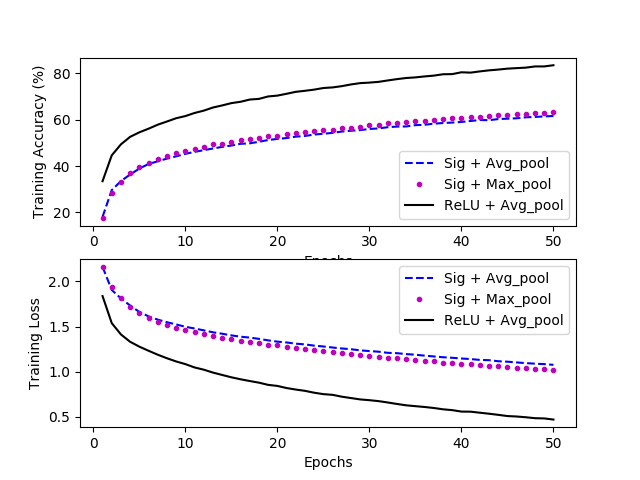

In [21]:
fig = plt.figure()
plt.subplot(211)
plt.plot(range(start_epoch,num_epochs+1), acc_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
legend = plt.legend()

plt.subplot(212)
plt.plot(range(start_epoch,num_epochs+1), loss_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
legend = plt.legend()

<font color=blue>**Which network converges faster? and why in you opinion?**</font>

## Data Augmentation

Check torchvision.transforms documentation to see how to perform RandomCrop (to size of 32 x 32 nad padding of 4 pixels) and Random horizontal flip on the input. 
http://pytorch.org/docs/master/torchvision/transforms.html

Add these two transformations instead of the brackets [ ] below

In [24]:
# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.RandomCrop((32,32),padding=4), # Crop all the images randomly to a fixed size
    transforms.RandomHorizontalFlip(),    # Randomly flip some of the images horizontaly
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

Files already downloaded and verified


Don't forget to replace the brackets [ ] with the relu activation

In [25]:
# Load and initialize the network architecture 
model4 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model4.cuda()

optimizer = optim.Adam(model4.parameters()) 


model4, loss_log4, acc_log4 = train(model4, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.30840731 | Acc: 9.77% (25/256)
Loss: 2.30642617 | Acc: 10.16% (52/512)
Loss: 2.30396191 | Acc: 11.59% (89/768)
Loss: 2.30192399 | Acc: 11.82% (121/1024)
Loss: 2.29925466 | Acc: 11.95% (153/1280)
Loss: 2.29807127 | Acc: 11.39% (175/1536)
Loss: 2.29663781 | Acc: 11.72% (210/1792)
Loss: 2.29685029 | Acc: 11.72% (240/2048)
Loss: 2.29377535 | Acc: 11.76% (271/2304)
Loss: 2.28886693 | Acc: 12.23% (313/2560)
Loss: 2.28497531 | Acc: 12.86% (362/2816)
Loss: 2.28004791 | Acc: 13.35% (410/3072)
Loss: 2.27574127 | Acc: 13.58% (452/3328)
Loss: 2.26945174 | Acc: 14.15% (507/3584)
Loss: 2.26241069 | Acc: 14.24% (547/3840)
Loss: 2.25504629 | Acc: 14.55% (596/4096)
Loss: 2.24933177 | Acc: 14.80% (644/4352)
Loss: 2.24338007 | Acc: 15.15% (698/4608)
Loss: 2.23580496 | Acc: 15.50% (754/4864)
Loss: 2.23230467 | Acc: 15.70% (804/5120)
Loss: 2.22616623 | Acc: 16.00% (860/5376)
Loss: 2.21909524 | Acc: 16.32% (919/5632)
Loss: 2.21369827 | Acc: 16.54% (974/5888)
Loss: 2.20813453 | Acc: 16.75% 

Loss: 1.91437245 | Acc: 29.84% (14665/49152)
Loss: 1.91355054 | Acc: 29.85% (14747/49408)
Loss: 1.91274123 | Acc: 29.88% (14838/49664)
Loss: 1.91190312 | Acc: 29.92% (14938/49920)
Loss: 1.91105338 | Acc: 29.93% (14967/50000)

Epoch: 2
Loss: 1.68654168 | Acc: 34.77% (89/256)
Loss: 1.71589273 | Acc: 35.55% (182/512)
Loss: 1.73345522 | Acc: 35.55% (273/768)
Loss: 1.72468466 | Acc: 36.43% (373/1024)
Loss: 1.72011881 | Acc: 37.42% (479/1280)
Loss: 1.71913906 | Acc: 37.70% (579/1536)
Loss: 1.72717556 | Acc: 37.44% (671/1792)
Loss: 1.74686682 | Acc: 36.47% (747/2048)
Loss: 1.74345442 | Acc: 36.59% (843/2304)
Loss: 1.74029993 | Acc: 36.60% (937/2560)
Loss: 1.73977086 | Acc: 36.75% (1035/2816)
Loss: 1.73868980 | Acc: 36.98% (1136/3072)
Loss: 1.73456279 | Acc: 37.32% (1242/3328)
Loss: 1.73815698 | Acc: 37.11% (1330/3584)
Loss: 1.74193438 | Acc: 36.90% (1417/3840)
Loss: 1.73334895 | Acc: 37.38% (1531/4096)
Loss: 1.73288636 | Acc: 37.20% (1619/4352)
Loss: 1.73008409 | Acc: 37.26% (1717/4608)
Loss:

Loss: 1.67032216 | Acc: 39.20% (18364/46848)
Loss: 1.66994822 | Acc: 39.22% (18475/47104)
Loss: 1.66979566 | Acc: 39.21% (18569/47360)
Loss: 1.66939057 | Acc: 39.24% (18685/47616)
Loss: 1.66952741 | Acc: 39.24% (18784/47872)
Loss: 1.66923437 | Acc: 39.24% (18887/48128)
Loss: 1.66940338 | Acc: 39.23% (18983/48384)
Loss: 1.66887219 | Acc: 39.25% (19089/48640)
Loss: 1.66773575 | Acc: 39.30% (19214/48896)
Loss: 1.66734318 | Acc: 39.32% (19325/49152)
Loss: 1.66744272 | Acc: 39.30% (19416/49408)
Loss: 1.66755877 | Acc: 39.29% (19514/49664)
Loss: 1.66741570 | Acc: 39.29% (19615/49920)
Loss: 1.66700389 | Acc: 39.30% (19650/50000)

Epoch: 3
Loss: 1.65860355 | Acc: 41.02% (105/256)
Loss: 1.67345113 | Acc: 38.87% (199/512)
Loss: 1.65382306 | Acc: 39.58% (304/768)
Loss: 1.66271374 | Acc: 40.62% (416/1024)
Loss: 1.66771228 | Acc: 40.16% (514/1280)
Loss: 1.65292112 | Acc: 40.76% (626/1536)
Loss: 1.64474944 | Acc: 41.07% (736/1792)
Loss: 1.63678442 | Acc: 41.26% (845/2048)
Loss: 1.63738856 | Acc: 41.

Loss: 1.57642265 | Acc: 43.09% (19523/45312)
Loss: 1.57608180 | Acc: 43.09% (19637/45568)
Loss: 1.57635628 | Acc: 43.11% (19755/45824)
Loss: 1.57551394 | Acc: 43.13% (19874/46080)
Loss: 1.57553362 | Acc: 43.12% (19980/46336)
Loss: 1.57555193 | Acc: 43.12% (20092/46592)
Loss: 1.57547346 | Acc: 43.13% (20204/46848)
Loss: 1.57517881 | Acc: 43.15% (20327/47104)
Loss: 1.57454832 | Acc: 43.17% (20444/47360)
Loss: 1.57403571 | Acc: 43.18% (20561/47616)
Loss: 1.57343416 | Acc: 43.21% (20684/47872)
Loss: 1.57329870 | Acc: 43.24% (20810/48128)
Loss: 1.57314830 | Acc: 43.23% (20916/48384)
Loss: 1.57270173 | Acc: 43.26% (21042/48640)
Loss: 1.57233720 | Acc: 43.27% (21157/48896)
Loss: 1.57227877 | Acc: 43.28% (21271/49152)
Loss: 1.57241153 | Acc: 43.28% (21382/49408)
Loss: 1.57234327 | Acc: 43.29% (21498/49664)
Loss: 1.57210673 | Acc: 43.30% (21613/49920)
Loss: 1.57164740 | Acc: 43.30% (21650/50000)

Epoch: 4
Loss: 1.50224471 | Acc: 43.36% (111/256)
Loss: 1.54775965 | Acc: 44.53% (228/512)
Loss: 1.

Loss: 1.52050372 | Acc: 45.22% (19333/42752)
Loss: 1.51962492 | Acc: 45.25% (19462/43008)
Loss: 1.51969643 | Acc: 45.21% (19560/43264)
Loss: 1.52019765 | Acc: 45.19% (19668/43520)
Loss: 1.52009400 | Acc: 45.22% (19795/43776)
Loss: 1.51966990 | Acc: 45.21% (19905/44032)
Loss: 1.51889535 | Acc: 45.22% (20027/44288)
Loss: 1.51847597 | Acc: 45.24% (20150/44544)
Loss: 1.51778914 | Acc: 45.27% (20279/44800)
Loss: 1.51710155 | Acc: 45.29% (20405/45056)
Loss: 1.51709579 | Acc: 45.29% (20522/45312)
Loss: 1.51684343 | Acc: 45.29% (20636/45568)
Loss: 1.51688507 | Acc: 45.28% (20750/45824)
Loss: 1.51655181 | Acc: 45.29% (20870/46080)
Loss: 1.51646405 | Acc: 45.30% (20992/46336)
Loss: 1.51559034 | Acc: 45.34% (21124/46592)
Loss: 1.51597893 | Acc: 45.31% (21228/46848)
Loss: 1.51496336 | Acc: 45.35% (21364/47104)
Loss: 1.51529119 | Acc: 45.35% (21480/47360)
Loss: 1.51495201 | Acc: 45.39% (21611/47616)
Loss: 1.51449957 | Acc: 45.39% (21729/47872)
Loss: 1.51433455 | Acc: 45.40% (21852/48128)
Loss: 1.51

Loss: 1.46496220 | Acc: 47.41% (19297/40704)
Loss: 1.46481731 | Acc: 47.42% (19422/40960)
Loss: 1.46504237 | Acc: 47.44% (19551/41216)
Loss: 1.46467434 | Acc: 47.43% (19670/41472)
Loss: 1.46350721 | Acc: 47.49% (19817/41728)
Loss: 1.46286162 | Acc: 47.52% (19951/41984)
Loss: 1.46243694 | Acc: 47.53% (20077/42240)
Loss: 1.46214574 | Acc: 47.53% (20199/42496)
Loss: 1.46146072 | Acc: 47.55% (20329/42752)
Loss: 1.46182708 | Acc: 47.55% (20449/43008)
Loss: 1.46185626 | Acc: 47.56% (20578/43264)
Loss: 1.46182129 | Acc: 47.56% (20699/43520)
Loss: 1.46206187 | Acc: 47.57% (20824/43776)
Loss: 1.46236829 | Acc: 47.55% (20937/44032)
Loss: 1.46149344 | Acc: 47.58% (21072/44288)
Loss: 1.46125945 | Acc: 47.57% (21191/44544)
Loss: 1.46174094 | Acc: 47.56% (21307/44800)
Loss: 1.46103257 | Acc: 47.58% (21436/45056)
Loss: 1.46126536 | Acc: 47.56% (21551/45312)
Loss: 1.46060145 | Acc: 47.61% (21697/45568)
Loss: 1.46066302 | Acc: 47.61% (21816/45824)
Loss: 1.46049001 | Acc: 47.62% (21943/46080)
Loss: 1.46

Loss: 1.41997147 | Acc: 49.15% (19127/38912)
Loss: 1.42031221 | Acc: 49.15% (19251/39168)
Loss: 1.42008831 | Acc: 49.18% (19387/39424)
Loss: 1.42039309 | Acc: 49.16% (19508/39680)
Loss: 1.41960502 | Acc: 49.19% (19646/39936)
Loss: 1.41916570 | Acc: 49.19% (19769/40192)
Loss: 1.41886961 | Acc: 49.18% (19892/40448)
Loss: 1.41839508 | Acc: 49.19% (20024/40704)
Loss: 1.41815198 | Acc: 49.19% (20147/40960)
Loss: 1.41870042 | Acc: 49.14% (20254/41216)
Loss: 1.41925108 | Acc: 49.11% (20368/41472)
Loss: 1.41936849 | Acc: 49.11% (20492/41728)
Loss: 1.41908802 | Acc: 49.11% (20620/41984)
Loss: 1.41940281 | Acc: 49.11% (20742/42240)
Loss: 1.42011205 | Acc: 49.08% (20857/42496)
Loss: 1.41986262 | Acc: 49.12% (21000/42752)
Loss: 1.42035562 | Acc: 49.11% (21120/43008)
Loss: 1.42024906 | Acc: 49.09% (21237/43264)
Loss: 1.41995390 | Acc: 49.10% (21367/43520)
Loss: 1.41944840 | Acc: 49.09% (21489/43776)
Loss: 1.41937930 | Acc: 49.09% (21614/44032)
Loss: 1.41929362 | Acc: 49.09% (21742/44288)
Loss: 1.41

Loss: 1.39074235 | Acc: 49.88% (18261/36608)
Loss: 1.39014845 | Acc: 49.92% (18401/36864)
Loss: 1.38981462 | Acc: 49.94% (18536/37120)
Loss: 1.39034706 | Acc: 49.94% (18664/37376)
Loss: 1.39011992 | Acc: 49.93% (18789/37632)
Loss: 1.39099879 | Acc: 49.90% (18905/37888)
Loss: 1.39001578 | Acc: 49.92% (19040/38144)
Loss: 1.38961410 | Acc: 49.92% (19168/38400)
Loss: 1.38966567 | Acc: 49.92% (19298/38656)
Loss: 1.38996289 | Acc: 49.92% (19424/38912)
Loss: 1.39055378 | Acc: 49.91% (19549/39168)
Loss: 1.39043216 | Acc: 49.94% (19687/39424)
Loss: 1.39127957 | Acc: 49.92% (19810/39680)
Loss: 1.39143092 | Acc: 49.94% (19943/39936)
Loss: 1.39088126 | Acc: 49.93% (20068/40192)
Loss: 1.39104841 | Acc: 49.93% (20197/40448)
Loss: 1.39061328 | Acc: 49.98% (20345/40704)
Loss: 1.39033774 | Acc: 50.02% (20488/40960)
Loss: 1.39024652 | Acc: 50.01% (20613/41216)
Loss: 1.39039883 | Acc: 50.02% (20746/41472)
Loss: 1.39026239 | Acc: 50.01% (20870/41728)
Loss: 1.39058137 | Acc: 49.99% (20986/41984)
Loss: 1.39

Loss: 1.36340587 | Acc: 50.78% (17548/34560)
Loss: 1.36361090 | Acc: 50.78% (17680/34816)
Loss: 1.36366744 | Acc: 50.78% (17808/35072)
Loss: 1.36370182 | Acc: 50.76% (17934/35328)
Loss: 1.36321433 | Acc: 50.76% (18064/35584)
Loss: 1.36323718 | Acc: 50.76% (18191/35840)
Loss: 1.36253391 | Acc: 50.80% (18336/36096)
Loss: 1.36257408 | Acc: 50.81% (18469/36352)
Loss: 1.36133337 | Acc: 50.86% (18617/36608)
Loss: 1.36069936 | Acc: 50.87% (18753/36864)
Loss: 1.36038050 | Acc: 50.88% (18885/37120)
Loss: 1.36145047 | Acc: 50.84% (19001/37376)
Loss: 1.36200851 | Acc: 50.81% (19122/37632)
Loss: 1.36241750 | Acc: 50.78% (19241/37888)
Loss: 1.36167274 | Acc: 50.80% (19379/38144)
Loss: 1.36169713 | Acc: 50.82% (19513/38400)
Loss: 1.36102187 | Acc: 50.84% (19653/38656)
Loss: 1.36145799 | Acc: 50.82% (19775/38912)
Loss: 1.36132600 | Acc: 50.84% (19912/39168)
Loss: 1.36124235 | Acc: 50.87% (20056/39424)
Loss: 1.36036008 | Acc: 50.90% (20199/39680)
Loss: 1.36072849 | Acc: 50.88% (20319/39936)
Loss: 1.36

Loss: 1.33363164 | Acc: 52.10% (17471/33536)
Loss: 1.33336596 | Acc: 52.11% (17609/33792)
Loss: 1.33379023 | Acc: 52.11% (17741/34048)
Loss: 1.33392467 | Acc: 52.11% (17876/34304)
Loss: 1.33411650 | Acc: 52.09% (18004/34560)
Loss: 1.33413046 | Acc: 52.09% (18136/34816)
Loss: 1.33361544 | Acc: 52.12% (18278/35072)
Loss: 1.33315238 | Acc: 52.16% (18427/35328)
Loss: 1.33339069 | Acc: 52.16% (18559/35584)
Loss: 1.33471505 | Acc: 52.10% (18673/35840)
Loss: 1.33440914 | Acc: 52.12% (18812/36096)
Loss: 1.33400778 | Acc: 52.13% (18951/36352)
Loss: 1.33545007 | Acc: 52.11% (19076/36608)
Loss: 1.33407228 | Acc: 52.16% (19229/36864)
Loss: 1.33409705 | Acc: 52.19% (19373/37120)
Loss: 1.33358337 | Acc: 52.22% (19519/37376)
Loss: 1.33402336 | Acc: 52.20% (19644/37632)
Loss: 1.33384447 | Acc: 52.20% (19779/37888)
Loss: 1.33342114 | Acc: 52.24% (19928/38144)
Loss: 1.33278812 | Acc: 52.28% (20076/38400)
Loss: 1.33240233 | Acc: 52.29% (20214/38656)
Loss: 1.33315337 | Acc: 52.28% (20343/38912)
Loss: 1.33

Loss: 1.31539264 | Acc: 52.71% (16328/30976)
Loss: 1.31606224 | Acc: 52.68% (16452/31232)
Loss: 1.31498053 | Acc: 52.71% (16598/31488)
Loss: 1.31533077 | Acc: 52.71% (16731/31744)
Loss: 1.31477772 | Acc: 52.74% (16876/32000)
Loss: 1.31553997 | Acc: 52.71% (17003/32256)
Loss: 1.31551006 | Acc: 52.75% (17150/32512)
Loss: 1.31547508 | Acc: 52.78% (17295/32768)
Loss: 1.31522956 | Acc: 52.77% (17428/33024)
Loss: 1.31550700 | Acc: 52.76% (17559/33280)
Loss: 1.31603005 | Acc: 52.76% (17694/33536)
Loss: 1.31556386 | Acc: 52.78% (17836/33792)
Loss: 1.31510227 | Acc: 52.81% (17982/34048)
Loss: 1.31509755 | Acc: 52.82% (18119/34304)
Loss: 1.31550286 | Acc: 52.83% (18258/34560)
Loss: 1.31476306 | Acc: 52.84% (18398/34816)
Loss: 1.31436305 | Acc: 52.83% (18530/35072)
Loss: 1.31379935 | Acc: 52.85% (18671/35328)
Loss: 1.31366044 | Acc: 52.85% (18805/35584)
Loss: 1.31343677 | Acc: 52.88% (18953/35840)
Loss: 1.31316647 | Acc: 52.90% (19095/36096)
Loss: 1.31341630 | Acc: 52.89% (19228/36352)
Loss: 1.31

Loss: 1.30080950 | Acc: 53.09% (15359/28928)
Loss: 1.30062938 | Acc: 53.11% (15499/29184)
Loss: 1.30110834 | Acc: 53.13% (15642/29440)
Loss: 1.30058452 | Acc: 53.18% (15792/29696)
Loss: 1.29905273 | Acc: 53.20% (15934/29952)
Loss: 1.29828839 | Acc: 53.24% (16084/30208)
Loss: 1.29834132 | Acc: 53.25% (16223/30464)
Loss: 1.29854826 | Acc: 53.28% (16368/30720)
Loss: 1.29888949 | Acc: 53.26% (16499/30976)
Loss: 1.29995198 | Acc: 53.21% (16617/31232)
Loss: 1.29941406 | Acc: 53.22% (16759/31488)
Loss: 1.29897898 | Acc: 53.26% (16906/31744)
Loss: 1.29843949 | Acc: 53.27% (17046/32000)
Loss: 1.29838021 | Acc: 53.27% (17182/32256)
Loss: 1.29789811 | Acc: 53.30% (17330/32512)
Loss: 1.29854077 | Acc: 53.27% (17457/32768)
Loss: 1.29828086 | Acc: 53.27% (17593/33024)
Loss: 1.29893244 | Acc: 53.26% (17725/33280)
Loss: 1.29925336 | Acc: 53.27% (17866/33536)
Loss: 1.29870166 | Acc: 53.28% (18006/33792)
Loss: 1.29810012 | Acc: 53.33% (18158/34048)
Loss: 1.29760021 | Acc: 53.37% (18307/34304)
Loss: 1.29

Loss: 1.27362007 | Acc: 54.42% (14349/26368)
Loss: 1.27341171 | Acc: 54.44% (14495/26624)
Loss: 1.27375444 | Acc: 54.42% (14627/26880)
Loss: 1.27403573 | Acc: 54.43% (14771/27136)
Loss: 1.27415769 | Acc: 54.42% (14907/27392)
Loss: 1.27367541 | Acc: 54.45% (15055/27648)
Loss: 1.27373521 | Acc: 54.45% (15193/27904)
Loss: 1.27461918 | Acc: 54.43% (15327/28160)
Loss: 1.27418001 | Acc: 54.47% (15478/28416)
Loss: 1.27418858 | Acc: 54.48% (15621/28672)
Loss: 1.27483809 | Acc: 54.46% (15753/28928)
Loss: 1.27381152 | Acc: 54.51% (15908/29184)
Loss: 1.27448501 | Acc: 54.49% (16041/29440)
Loss: 1.27315057 | Acc: 54.53% (16193/29696)
Loss: 1.27380879 | Acc: 54.53% (16333/29952)
Loss: 1.27330200 | Acc: 54.54% (16476/30208)
Loss: 1.27275775 | Acc: 54.55% (16619/30464)
Loss: 1.27277650 | Acc: 54.54% (16754/30720)
Loss: 1.27241430 | Acc: 54.53% (16890/30976)
Loss: 1.27338724 | Acc: 54.54% (17033/31232)
Loss: 1.27336978 | Acc: 54.52% (17167/31488)
Loss: 1.27249193 | Acc: 54.55% (17317/31744)
Loss: 1.27

Loss: 1.24957825 | Acc: 55.27% (13724/24832)
Loss: 1.24962046 | Acc: 55.24% (13859/25088)
Loss: 1.25048322 | Acc: 55.16% (13981/25344)
Loss: 1.25066821 | Acc: 55.17% (14124/25600)
Loss: 1.25089667 | Acc: 55.15% (14260/25856)
Loss: 1.25160498 | Acc: 55.13% (14395/26112)
Loss: 1.25123583 | Acc: 55.13% (14537/26368)
Loss: 1.25096354 | Acc: 55.11% (14672/26624)
Loss: 1.25141174 | Acc: 55.13% (14818/26880)
Loss: 1.25086845 | Acc: 55.15% (14966/27136)
Loss: 1.25170364 | Acc: 55.11% (15096/27392)
Loss: 1.25160726 | Acc: 55.13% (15241/27648)
Loss: 1.25159392 | Acc: 55.11% (15378/27904)
Loss: 1.25129281 | Acc: 55.12% (15521/28160)
Loss: 1.25103128 | Acc: 55.12% (15663/28416)
Loss: 1.25122348 | Acc: 55.13% (15808/28672)
Loss: 1.24962476 | Acc: 55.20% (15967/28928)
Loss: 1.24897048 | Acc: 55.20% (16109/29184)
Loss: 1.24856848 | Acc: 55.20% (16251/29440)
Loss: 1.24807205 | Acc: 55.21% (16396/29696)
Loss: 1.24827746 | Acc: 55.18% (16527/29952)
Loss: 1.24926489 | Acc: 55.15% (16661/30208)
Loss: 1.24

Loss: 1.24074772 | Acc: 55.79% (12711/22784)
Loss: 1.24003287 | Acc: 55.78% (12851/23040)
Loss: 1.23882041 | Acc: 55.86% (13012/23296)
Loss: 1.23935312 | Acc: 55.87% (13159/23552)
Loss: 1.23922611 | Acc: 55.89% (13306/23808)
Loss: 1.23943218 | Acc: 55.91% (13453/24064)
Loss: 1.24006802 | Acc: 55.90% (13596/24320)
Loss: 1.24008802 | Acc: 55.88% (13732/24576)
Loss: 1.23914154 | Acc: 55.90% (13881/24832)
Loss: 1.24036177 | Acc: 55.82% (14005/25088)
Loss: 1.24024035 | Acc: 55.85% (14154/25344)
Loss: 1.24077751 | Acc: 55.84% (14294/25600)
Loss: 1.23962031 | Acc: 55.89% (14452/25856)
Loss: 1.23925081 | Acc: 55.89% (14594/26112)
Loss: 1.24005281 | Acc: 55.89% (14737/26368)
Loss: 1.24016718 | Acc: 55.91% (14885/26624)
Loss: 1.24020430 | Acc: 55.92% (15030/26880)
Loss: 1.23952859 | Acc: 55.93% (15177/27136)
Loss: 1.24006285 | Acc: 55.92% (15318/27392)
Loss: 1.23895307 | Acc: 55.96% (15471/27648)
Loss: 1.23907705 | Acc: 55.93% (15608/27904)
Loss: 1.23784073 | Acc: 55.99% (15766/28160)
Loss: 1.23

Loss: 1.23814270 | Acc: 55.90% (11591/20736)
Loss: 1.23913518 | Acc: 55.85% (11723/20992)
Loss: 1.23805666 | Acc: 55.92% (11882/21248)
Loss: 1.23824147 | Acc: 55.90% (12020/21504)
Loss: 1.23929028 | Acc: 55.84% (12150/21760)
Loss: 1.24032988 | Acc: 55.80% (12284/22016)
Loss: 1.24011869 | Acc: 55.79% (12425/22272)
Loss: 1.23942794 | Acc: 55.82% (12575/22528)
Loss: 1.23808141 | Acc: 55.82% (12718/22784)
Loss: 1.23907525 | Acc: 55.79% (12853/23040)
Loss: 1.23900407 | Acc: 55.78% (12995/23296)
Loss: 1.24046112 | Acc: 55.74% (13127/23552)
Loss: 1.23954440 | Acc: 55.77% (13278/23808)
Loss: 1.23891032 | Acc: 55.82% (13432/24064)
Loss: 1.23751101 | Acc: 55.90% (13594/24320)
Loss: 1.23827338 | Acc: 55.90% (13737/24576)
Loss: 1.23775169 | Acc: 55.88% (13877/24832)
Loss: 1.23774478 | Acc: 55.92% (14028/25088)
Loss: 1.23728207 | Acc: 55.99% (14191/25344)
Loss: 1.23705108 | Acc: 55.99% (14334/25600)
Loss: 1.23562362 | Acc: 56.07% (14497/25856)
Loss: 1.23525224 | Acc: 56.09% (14645/26112)
Loss: 1.23

Loss: 1.21450313 | Acc: 56.02% (10469/18688)
Loss: 1.21528439 | Acc: 55.97% (10603/18944)
Loss: 1.21481561 | Acc: 56.02% (10756/19200)
Loss: 1.21286444 | Acc: 56.12% (10919/19456)
Loss: 1.21134416 | Acc: 56.20% (11078/19712)
Loss: 1.21164170 | Acc: 56.17% (11217/19968)
Loss: 1.21232650 | Acc: 56.16% (11358/20224)
Loss: 1.21217108 | Acc: 56.15% (11500/20480)
Loss: 1.21290755 | Acc: 56.10% (11633/20736)
Loss: 1.21278215 | Acc: 56.08% (11772/20992)
Loss: 1.21214679 | Acc: 56.12% (11924/21248)
Loss: 1.21242062 | Acc: 56.11% (12066/21504)
Loss: 1.21155129 | Acc: 56.12% (12212/21760)
Loss: 1.21082923 | Acc: 56.16% (12365/22016)
Loss: 1.20980676 | Acc: 56.20% (12516/22272)
Loss: 1.20915836 | Acc: 56.22% (12665/22528)
Loss: 1.20945393 | Acc: 56.22% (12810/22784)
Loss: 1.21014586 | Acc: 56.18% (12943/23040)
Loss: 1.21005860 | Acc: 56.14% (13078/23296)
Loss: 1.21016023 | Acc: 56.19% (13233/23552)
Loss: 1.21039649 | Acc: 56.15% (13369/23808)
Loss: 1.21038376 | Acc: 56.22% (13529/24064)
Loss: 1.20

Loss: 1.19631756 | Acc: 57.80% (9618/16640)
Loss: 1.19735224 | Acc: 57.75% (9758/16896)
Loss: 1.19693203 | Acc: 57.81% (9916/17152)
Loss: 1.19801405 | Acc: 57.74% (10052/17408)
Loss: 1.19752349 | Acc: 57.76% (10203/17664)
Loss: 1.19803655 | Acc: 57.77% (10353/17920)
Loss: 1.19881242 | Acc: 57.76% (10499/18176)
Loss: 1.19994215 | Acc: 57.71% (10638/18432)
Loss: 1.20040692 | Acc: 57.69% (10781/18688)
Loss: 1.19949025 | Acc: 57.70% (10930/18944)
Loss: 1.19920139 | Acc: 57.75% (11088/19200)
Loss: 1.20085192 | Acc: 57.71% (11228/19456)
Loss: 1.20100082 | Acc: 57.71% (11376/19712)
Loss: 1.20197678 | Acc: 57.70% (11521/19968)
Loss: 1.20288720 | Acc: 57.63% (11656/20224)
Loss: 1.20391436 | Acc: 57.54% (11784/20480)
Loss: 1.20379897 | Acc: 57.54% (11932/20736)
Loss: 1.20321022 | Acc: 57.60% (12091/20992)
Loss: 1.20373644 | Acc: 57.58% (12235/21248)
Loss: 1.20334880 | Acc: 57.54% (12373/21504)
Loss: 1.20402396 | Acc: 57.50% (12513/21760)
Loss: 1.20299106 | Acc: 57.56% (12672/22016)
Loss: 1.20213

Loss: 1.19390600 | Acc: 56.91% (8304/14592)
Loss: 1.19244453 | Acc: 56.96% (8457/14848)
Loss: 1.19226523 | Acc: 56.97% (8604/15104)
Loss: 1.19137203 | Acc: 57.01% (8756/15360)
Loss: 1.19231972 | Acc: 56.95% (8893/15616)
Loss: 1.19082433 | Acc: 56.97% (9043/15872)
Loss: 1.19179797 | Acc: 56.94% (9184/16128)
Loss: 1.19116516 | Acc: 56.99% (9338/16384)
Loss: 1.19110732 | Acc: 57.09% (9499/16640)
Loss: 1.18932504 | Acc: 57.13% (9653/16896)
Loss: 1.18916536 | Acc: 57.14% (9800/17152)
Loss: 1.18865996 | Acc: 57.17% (9952/17408)
Loss: 1.18662945 | Acc: 57.27% (10116/17664)
Loss: 1.18684990 | Acc: 57.23% (10255/17920)
Loss: 1.18584337 | Acc: 57.27% (10410/18176)
Loss: 1.18564329 | Acc: 57.30% (10561/18432)
Loss: 1.18422719 | Acc: 57.37% (10721/18688)
Loss: 1.18419681 | Acc: 57.41% (10875/18944)
Loss: 1.18304613 | Acc: 57.42% (11025/19200)
Loss: 1.18340323 | Acc: 57.45% (11177/19456)
Loss: 1.18360059 | Acc: 57.46% (11326/19712)
Loss: 1.18284923 | Acc: 57.46% (11473/19968)
Loss: 1.18186749 | Acc

Loss: 1.18111107 | Acc: 58.00% (7276/12544)
Loss: 1.18274558 | Acc: 57.94% (7416/12800)
Loss: 1.18295561 | Acc: 57.90% (7559/13056)
Loss: 1.18431546 | Acc: 57.81% (7696/13312)
Loss: 1.18363585 | Acc: 57.82% (7845/13568)
Loss: 1.18380118 | Acc: 57.81% (7992/13824)
Loss: 1.18503757 | Acc: 57.78% (8135/14080)
Loss: 1.18396099 | Acc: 57.77% (8282/14336)
Loss: 1.18399950 | Acc: 57.83% (8438/14592)
Loss: 1.18393383 | Acc: 57.83% (8586/14848)
Loss: 1.18319259 | Acc: 57.93% (8749/15104)
Loss: 1.18119942 | Acc: 58.04% (8915/15360)
Loss: 1.18056020 | Acc: 58.04% (9064/15616)
Loss: 1.18155497 | Acc: 58.07% (9217/15872)
Loss: 1.18042220 | Acc: 58.12% (9374/16128)
Loss: 1.17999427 | Acc: 58.17% (9530/16384)
Loss: 1.17942457 | Acc: 58.18% (9681/16640)
Loss: 1.17788183 | Acc: 58.21% (9836/16896)
Loss: 1.17534447 | Acc: 58.29% (9998/17152)
Loss: 1.17553486 | Acc: 58.28% (10146/17408)
Loss: 1.17574150 | Acc: 58.34% (10305/17664)
Loss: 1.17628899 | Acc: 58.30% (10448/17920)
Loss: 1.17689476 | Acc: 58.28

Loss: 1.18250632 | Acc: 57.96% (6084/10496)
Loss: 1.18293396 | Acc: 57.94% (6230/10752)
Loss: 1.17968595 | Acc: 58.11% (6397/11008)
Loss: 1.17942610 | Acc: 58.09% (6543/11264)
Loss: 1.17815467 | Acc: 58.17% (6701/11520)
Loss: 1.17847624 | Acc: 58.14% (6847/11776)
Loss: 1.17908452 | Acc: 58.10% (6991/12032)
Loss: 1.17936412 | Acc: 58.11% (7140/12288)
Loss: 1.18045876 | Acc: 58.12% (7290/12544)
Loss: 1.17854318 | Acc: 58.13% (7441/12800)
Loss: 1.17805117 | Acc: 58.11% (7587/13056)
Loss: 1.17697953 | Acc: 58.09% (7733/13312)
Loss: 1.17570755 | Acc: 58.11% (7884/13568)
Loss: 1.17501081 | Acc: 58.07% (8028/13824)
Loss: 1.17550556 | Acc: 58.03% (8171/14080)
Loss: 1.17537254 | Acc: 58.02% (8318/14336)
Loss: 1.17445286 | Acc: 58.08% (8475/14592)
Loss: 1.17272604 | Acc: 58.16% (8635/14848)
Loss: 1.17302510 | Acc: 58.17% (8786/15104)
Loss: 1.17282702 | Acc: 58.12% (8927/15360)
Loss: 1.17180028 | Acc: 58.12% (9076/15616)
Loss: 1.17160731 | Acc: 58.16% (9231/15872)
Loss: 1.17233636 | Acc: 58.17% (

Loss: 1.16423652 | Acc: 58.53% (4345/7424)
Loss: 1.16838461 | Acc: 58.45% (4489/7680)
Loss: 1.17166983 | Acc: 58.30% (4627/7936)
Loss: 1.17239516 | Acc: 58.30% (4776/8192)
Loss: 1.17124970 | Acc: 58.21% (4918/8448)
Loss: 1.17103494 | Acc: 58.18% (5064/8704)
Loss: 1.16973654 | Acc: 58.26% (5220/8960)
Loss: 1.17034259 | Acc: 58.28% (5371/9216)
Loss: 1.17162029 | Acc: 58.34% (5526/9472)
Loss: 1.17020274 | Acc: 58.37% (5678/9728)
Loss: 1.16780108 | Acc: 58.43% (5834/9984)
Loss: 1.16869071 | Acc: 58.48% (5988/10240)
Loss: 1.16744864 | Acc: 58.50% (6140/10496)
Loss: 1.16730318 | Acc: 58.50% (6290/10752)
Loss: 1.16492093 | Acc: 58.58% (6448/11008)
Loss: 1.16760565 | Acc: 58.46% (6585/11264)
Loss: 1.16880705 | Acc: 58.53% (6743/11520)
Loss: 1.16752327 | Acc: 58.54% (6894/11776)
Loss: 1.16819893 | Acc: 58.50% (7039/12032)
Loss: 1.17090515 | Acc: 58.43% (7180/12288)
Loss: 1.16921105 | Acc: 58.44% (7331/12544)
Loss: 1.17094127 | Acc: 58.27% (7459/12800)
Loss: 1.17215803 | Acc: 58.26% (7607/13056)

Loss: 1.12393770 | Acc: 60.36% (2627/4352)
Loss: 1.12363623 | Acc: 60.31% (2779/4608)
Loss: 1.12320886 | Acc: 60.63% (2949/4864)
Loss: 1.12457741 | Acc: 60.64% (3105/5120)
Loss: 1.12165634 | Acc: 60.77% (3267/5376)
Loss: 1.12203596 | Acc: 60.74% (3421/5632)
Loss: 1.12441968 | Acc: 60.63% (3570/5888)
Loss: 1.12643270 | Acc: 60.51% (3718/6144)
Loss: 1.13207195 | Acc: 60.19% (3852/6400)
Loss: 1.12806706 | Acc: 60.25% (4010/6656)
Loss: 1.13108653 | Acc: 60.05% (4151/6912)
Loss: 1.13114972 | Acc: 60.00% (4301/7168)
Loss: 1.13222887 | Acc: 59.95% (4451/7424)
Loss: 1.13208126 | Acc: 59.78% (4591/7680)
Loss: 1.13451232 | Acc: 59.63% (4732/7936)
Loss: 1.13564357 | Acc: 59.62% (4884/8192)
Loss: 1.13438168 | Acc: 59.64% (5038/8448)
Loss: 1.13067802 | Acc: 59.81% (5206/8704)
Loss: 1.13244049 | Acc: 59.84% (5362/8960)
Loss: 1.13198521 | Acc: 59.88% (5519/9216)
Loss: 1.13252700 | Acc: 59.99% (5682/9472)
Loss: 1.13641194 | Acc: 59.80% (5817/9728)
Loss: 1.13562699 | Acc: 59.80% (5970/9984)
Loss: 1.135

Loss: 1.14000641 | Acc: 59.59% (1373/2304)
Loss: 1.13545357 | Acc: 59.26% (1517/2560)
Loss: 1.13331199 | Acc: 59.48% (1675/2816)
Loss: 1.13345924 | Acc: 59.34% (1823/3072)
Loss: 1.13075806 | Acc: 59.34% (1975/3328)
Loss: 1.13163229 | Acc: 59.21% (2122/3584)
Loss: 1.12586281 | Acc: 59.56% (2287/3840)
Loss: 1.12856004 | Acc: 59.45% (2435/4096)
Loss: 1.13403778 | Acc: 59.21% (2577/4352)
Loss: 1.13331013 | Acc: 59.48% (2741/4608)
Loss: 1.13325573 | Acc: 59.33% (2886/4864)
Loss: 1.13218476 | Acc: 59.39% (3041/5120)
Loss: 1.13147095 | Acc: 59.45% (3196/5376)
Loss: 1.13149523 | Acc: 59.48% (3350/5632)
Loss: 1.13267827 | Acc: 59.41% (3498/5888)
Loss: 1.13353668 | Acc: 59.34% (3646/6144)
Loss: 1.13077824 | Acc: 59.52% (3809/6400)
Loss: 1.13462977 | Acc: 59.45% (3957/6656)
Loss: 1.13575134 | Acc: 59.42% (4107/6912)
Loss: 1.13806613 | Acc: 59.33% (4253/7168)
Loss: 1.14045770 | Acc: 59.25% (4399/7424)
Loss: 1.14072476 | Acc: 59.30% (4554/7680)
Loss: 1.13926510 | Acc: 59.31% (4707/7936)
Loss: 1.140

Loss: 1.24940979 | Acc: 54.30% (139/256)
Loss: 1.17718107 | Acc: 56.25% (288/512)
Loss: 1.16419093 | Acc: 56.38% (433/768)
Loss: 1.15548790 | Acc: 56.54% (579/1024)
Loss: 1.15511851 | Acc: 56.88% (728/1280)
Loss: 1.14375039 | Acc: 57.16% (878/1536)
Loss: 1.15117434 | Acc: 57.09% (1023/1792)
Loss: 1.15438399 | Acc: 57.13% (1170/2048)
Loss: 1.14820486 | Acc: 57.42% (1323/2304)
Loss: 1.14150872 | Acc: 57.93% (1483/2560)
Loss: 1.13835634 | Acc: 58.35% (1643/2816)
Loss: 1.13356621 | Acc: 58.69% (1803/3072)
Loss: 1.12703355 | Acc: 58.89% (1960/3328)
Loss: 1.12029529 | Acc: 58.98% (2114/3584)
Loss: 1.11456461 | Acc: 59.19% (2273/3840)
Loss: 1.11460049 | Acc: 59.25% (2427/4096)
Loss: 1.12020332 | Acc: 59.19% (2576/4352)
Loss: 1.12371010 | Acc: 59.05% (2721/4608)
Loss: 1.12389841 | Acc: 59.19% (2879/4864)
Loss: 1.12655976 | Acc: 59.32% (3037/5120)
Loss: 1.12248873 | Acc: 59.41% (3194/5376)
Loss: 1.12995496 | Acc: 59.07% (3327/5632)
Loss: 1.12605265 | Acc: 59.32% (3493/5888)
Loss: 1.12171142 | A

Loss: 1.12730178 | Acc: 59.92% (29607/49408)
Loss: 1.12701177 | Acc: 59.93% (29763/49664)
Loss: 1.12673272 | Acc: 59.95% (29926/49920)
Loss: 1.12625436 | Acc: 59.96% (29978/50000)

Epoch: 25
Loss: 1.22005451 | Acc: 56.64% (145/256)
Loss: 1.18932265 | Acc: 56.45% (289/512)
Loss: 1.14748402 | Acc: 57.68% (443/768)
Loss: 1.15666631 | Acc: 57.03% (584/1024)
Loss: 1.15777254 | Acc: 57.27% (733/1280)
Loss: 1.16667455 | Acc: 57.55% (884/1536)
Loss: 1.16356412 | Acc: 57.48% (1030/1792)
Loss: 1.16567007 | Acc: 57.62% (1180/2048)
Loss: 1.16338706 | Acc: 56.94% (1312/2304)
Loss: 1.15871782 | Acc: 57.46% (1471/2560)
Loss: 1.16896785 | Acc: 57.21% (1611/2816)
Loss: 1.16470493 | Acc: 57.26% (1759/3072)
Loss: 1.15587764 | Acc: 57.93% (1928/3328)
Loss: 1.15173335 | Acc: 58.23% (2087/3584)
Loss: 1.14690891 | Acc: 58.52% (2247/3840)
Loss: 1.15106942 | Acc: 58.54% (2398/4096)
Loss: 1.14930208 | Acc: 58.69% (2554/4352)
Loss: 1.14756349 | Acc: 58.90% (2714/4608)
Loss: 1.14330643 | Acc: 58.92% (2866/4864)
L

Loss: 1.12090363 | Acc: 60.07% (28448/47360)
Loss: 1.12025975 | Acc: 60.08% (28609/47616)
Loss: 1.12066939 | Acc: 60.07% (28757/47872)
Loss: 1.12057469 | Acc: 60.09% (28922/48128)
Loss: 1.12015012 | Acc: 60.12% (29087/48384)
Loss: 1.12044786 | Acc: 60.11% (29239/48640)
Loss: 1.12087958 | Acc: 60.10% (29385/48896)
Loss: 1.12114785 | Acc: 60.09% (29536/49152)
Loss: 1.12142985 | Acc: 60.08% (29684/49408)
Loss: 1.12135474 | Acc: 60.08% (29838/49664)
Loss: 1.12196395 | Acc: 60.05% (29976/49920)
Loss: 1.12172486 | Acc: 60.05% (30024/50000)

Epoch: 26
Loss: 1.10105264 | Acc: 57.81% (148/256)
Loss: 1.11426920 | Acc: 60.16% (308/512)
Loss: 1.11832416 | Acc: 58.72% (451/768)
Loss: 1.08446200 | Acc: 60.35% (618/1024)
Loss: 1.10417706 | Acc: 59.84% (766/1280)
Loss: 1.10567994 | Acc: 60.03% (922/1536)
Loss: 1.10527549 | Acc: 59.99% (1075/1792)
Loss: 1.11148153 | Acc: 59.86% (1226/2048)
Loss: 1.10817343 | Acc: 60.24% (1388/2304)
Loss: 1.11465003 | Acc: 59.88% (1533/2560)
Loss: 1.10591906 | Acc: 60.1

Loss: 1.10728545 | Acc: 60.65% (27326/45056)
Loss: 1.10754721 | Acc: 60.62% (27469/45312)
Loss: 1.10741658 | Acc: 60.63% (27629/45568)
Loss: 1.10768437 | Acc: 60.65% (27793/45824)
Loss: 1.10762337 | Acc: 60.65% (27946/46080)
Loss: 1.10816272 | Acc: 60.62% (28089/46336)
Loss: 1.10841449 | Acc: 60.59% (28229/46592)
Loss: 1.10875080 | Acc: 60.57% (28376/46848)
Loss: 1.10836072 | Acc: 60.60% (28543/47104)
Loss: 1.10869950 | Acc: 60.59% (28697/47360)
Loss: 1.10875695 | Acc: 60.59% (28852/47616)
Loss: 1.10882168 | Acc: 60.59% (29005/47872)
Loss: 1.10838407 | Acc: 60.61% (29169/48128)
Loss: 1.10858583 | Acc: 60.60% (29322/48384)
Loss: 1.10874104 | Acc: 60.60% (29476/48640)
Loss: 1.10884042 | Acc: 60.57% (29614/48896)
Loss: 1.10850124 | Acc: 60.58% (29777/49152)
Loss: 1.10800715 | Acc: 60.61% (29944/49408)
Loss: 1.10782396 | Acc: 60.61% (30101/49664)
Loss: 1.10799041 | Acc: 60.59% (30246/49920)
Loss: 1.10880957 | Acc: 60.58% (30291/50000)

Epoch: 27
Loss: 1.13021660 | Acc: 59.38% (152/256)
Los

Loss: 1.10672632 | Acc: 60.82% (26315/43264)
Loss: 1.10666924 | Acc: 60.83% (26472/43520)
Loss: 1.10659209 | Acc: 60.84% (26635/43776)
Loss: 1.10669912 | Acc: 60.84% (26789/44032)
Loss: 1.10620377 | Acc: 60.86% (26952/44288)
Loss: 1.10612833 | Acc: 60.84% (27102/44544)
Loss: 1.10511746 | Acc: 60.88% (27273/44800)
Loss: 1.10555789 | Acc: 60.88% (27428/45056)
Loss: 1.10534484 | Acc: 60.89% (27592/45312)
Loss: 1.10525739 | Acc: 60.90% (27752/45568)
Loss: 1.10511261 | Acc: 60.90% (27908/45824)
Loss: 1.10476207 | Acc: 60.92% (28070/46080)
Loss: 1.10460689 | Acc: 60.93% (28232/46336)
Loss: 1.10380112 | Acc: 60.97% (28405/46592)
Loss: 1.10331859 | Acc: 61.00% (28576/46848)
Loss: 1.10278888 | Acc: 61.00% (28734/47104)
Loss: 1.10325158 | Acc: 60.99% (28885/47360)
Loss: 1.10354931 | Acc: 60.98% (29035/47616)
Loss: 1.10384513 | Acc: 60.97% (29189/47872)
Loss: 1.10337521 | Acc: 60.99% (29353/48128)
Loss: 1.10358591 | Acc: 60.99% (29508/48384)
Loss: 1.10351896 | Acc: 60.99% (29666/48640)
Loss: 1.10

Loss: 1.09576060 | Acc: 61.11% (25186/41216)
Loss: 1.09602824 | Acc: 61.09% (25334/41472)
Loss: 1.09540319 | Acc: 61.10% (25497/41728)
Loss: 1.09573224 | Acc: 61.08% (25644/41984)
Loss: 1.09557249 | Acc: 61.08% (25802/42240)
Loss: 1.09502063 | Acc: 61.10% (25967/42496)
Loss: 1.09492323 | Acc: 61.10% (26122/42752)
Loss: 1.09492556 | Acc: 61.08% (26270/43008)
Loss: 1.09449574 | Acc: 61.06% (26416/43264)
Loss: 1.09400899 | Acc: 61.09% (26588/43520)
Loss: 1.09404117 | Acc: 61.09% (26744/43776)
Loss: 1.09431886 | Acc: 61.08% (26893/44032)
Loss: 1.09399915 | Acc: 61.08% (27052/44288)
Loss: 1.09412190 | Acc: 61.08% (27206/44544)
Loss: 1.09424146 | Acc: 61.08% (27365/44800)
Loss: 1.09395401 | Acc: 61.10% (27527/45056)
Loss: 1.09355876 | Acc: 61.12% (27695/45312)
Loss: 1.09274820 | Acc: 61.16% (27870/45568)
Loss: 1.09289987 | Acc: 61.15% (28021/45824)
Loss: 1.09286332 | Acc: 61.14% (28175/46080)
Loss: 1.09327159 | Acc: 61.12% (28322/46336)
Loss: 1.09333314 | Acc: 61.12% (28477/46592)
Loss: 1.09

Loss: 1.08615076 | Acc: 61.34% (24338/39680)
Loss: 1.08643726 | Acc: 61.30% (24482/39936)
Loss: 1.08617786 | Acc: 61.31% (24643/40192)
Loss: 1.08565954 | Acc: 61.35% (24814/40448)
Loss: 1.08521374 | Acc: 61.36% (24974/40704)
Loss: 1.08532037 | Acc: 61.35% (25128/40960)
Loss: 1.08571487 | Acc: 61.36% (25291/41216)
Loss: 1.08600378 | Acc: 61.35% (25445/41472)
Loss: 1.08655905 | Acc: 61.35% (25602/41728)
Loss: 1.08709739 | Acc: 61.33% (25749/41984)
Loss: 1.08775356 | Acc: 61.32% (25903/42240)
Loss: 1.08851470 | Acc: 61.27% (26037/42496)
Loss: 1.08857992 | Acc: 61.29% (26201/42752)
Loss: 1.08829943 | Acc: 61.28% (26357/43008)
Loss: 1.08820852 | Acc: 61.28% (26513/43264)
Loss: 1.08903252 | Acc: 61.25% (26657/43520)
Loss: 1.08923312 | Acc: 61.23% (26803/43776)
Loss: 1.08896469 | Acc: 61.26% (26975/44032)
Loss: 1.08866707 | Acc: 61.26% (27131/44288)
Loss: 1.08865992 | Acc: 61.26% (27286/44544)
Loss: 1.08930396 | Acc: 61.25% (27441/44800)
Loss: 1.08910795 | Acc: 61.28% (27610/45056)
Loss: 1.08

Loss: 1.08165164 | Acc: 61.61% (22871/37120)
Loss: 1.08181520 | Acc: 61.60% (23022/37376)
Loss: 1.08129887 | Acc: 61.62% (23190/37632)
Loss: 1.08118786 | Acc: 61.62% (23348/37888)
Loss: 1.08154576 | Acc: 61.63% (23507/38144)
Loss: 1.08107768 | Acc: 61.65% (23673/38400)
Loss: 1.08135590 | Acc: 61.65% (23832/38656)
Loss: 1.08162171 | Acc: 61.64% (23985/38912)
Loss: 1.08150359 | Acc: 61.65% (24147/39168)
Loss: 1.08218026 | Acc: 61.62% (24295/39424)
Loss: 1.08188836 | Acc: 61.65% (24464/39680)
Loss: 1.08099339 | Acc: 61.70% (24642/39936)
Loss: 1.08136022 | Acc: 61.68% (24790/40192)
Loss: 1.08165201 | Acc: 61.68% (24947/40448)
Loss: 1.08176115 | Acc: 61.68% (25108/40704)
Loss: 1.08244290 | Acc: 61.64% (25249/40960)
Loss: 1.08252834 | Acc: 61.63% (25400/41216)
Loss: 1.08233045 | Acc: 61.64% (25564/41472)
Loss: 1.08215276 | Acc: 61.64% (25721/41728)
Loss: 1.08259581 | Acc: 61.62% (25872/41984)
Loss: 1.08344748 | Acc: 61.60% (26020/42240)
Loss: 1.08285063 | Acc: 61.66% (26201/42496)
Loss: 1.08

Loss: 1.07005988 | Acc: 61.96% (21730/35072)
Loss: 1.06992418 | Acc: 61.95% (21885/35328)
Loss: 1.06975464 | Acc: 61.95% (22044/35584)
Loss: 1.06985764 | Acc: 61.97% (22209/35840)
Loss: 1.06938198 | Acc: 61.99% (22377/36096)
Loss: 1.06897615 | Acc: 61.99% (22535/36352)
Loss: 1.06992732 | Acc: 61.97% (22685/36608)
Loss: 1.06954908 | Acc: 61.99% (22851/36864)
Loss: 1.06960214 | Acc: 61.99% (23011/37120)
Loss: 1.07001705 | Acc: 62.01% (23177/37376)
Loss: 1.07055755 | Acc: 62.00% (23330/37632)
Loss: 1.07019088 | Acc: 62.00% (23490/37888)
Loss: 1.07014849 | Acc: 62.01% (23655/38144)
Loss: 1.06997931 | Acc: 62.01% (23813/38400)
Loss: 1.06981168 | Acc: 62.03% (23978/38656)
Loss: 1.07022663 | Acc: 62.01% (24129/38912)
Loss: 1.07029183 | Acc: 62.02% (24291/39168)
Loss: 1.06980408 | Acc: 62.02% (24452/39424)
Loss: 1.07068291 | Acc: 62.01% (24606/39680)
Loss: 1.07109676 | Acc: 62.01% (24763/39936)
Loss: 1.07098984 | Acc: 61.99% (24917/40192)
Loss: 1.07091715 | Acc: 62.01% (25080/40448)
Loss: 1.07

Loss: 1.07020531 | Acc: 62.02% (20483/33024)
Loss: 1.07015492 | Acc: 62.02% (20640/33280)
Loss: 1.06995129 | Acc: 62.01% (20795/33536)
Loss: 1.06965821 | Acc: 62.03% (20961/33792)
Loss: 1.06928916 | Acc: 62.04% (21123/34048)
Loss: 1.06988050 | Acc: 62.03% (21280/34304)
Loss: 1.07041306 | Acc: 62.03% (21438/34560)
Loss: 1.07020956 | Acc: 61.99% (21584/34816)
Loss: 1.07021685 | Acc: 61.99% (21740/35072)
Loss: 1.07001862 | Acc: 61.98% (21898/35328)
Loss: 1.07060404 | Acc: 61.95% (22045/35584)
Loss: 1.07090029 | Acc: 61.94% (22201/35840)
Loss: 1.07101470 | Acc: 61.93% (22356/36096)
Loss: 1.07015396 | Acc: 61.96% (22524/36352)
Loss: 1.06964015 | Acc: 61.98% (22689/36608)
Loss: 1.06881754 | Acc: 62.00% (22857/36864)
Loss: 1.06879791 | Acc: 62.01% (23017/37120)
Loss: 1.06852287 | Acc: 62.01% (23178/37376)
Loss: 1.06762021 | Acc: 62.05% (23349/37632)
Loss: 1.06739732 | Acc: 62.04% (23504/37888)
Loss: 1.06785270 | Acc: 62.02% (23657/38144)
Loss: 1.06775909 | Acc: 62.03% (23821/38400)
Loss: 1.06

Loss: 1.06046096 | Acc: 62.19% (19264/30976)
Loss: 1.06037277 | Acc: 62.20% (19425/31232)
Loss: 1.06102361 | Acc: 62.19% (19581/31488)
Loss: 1.06207106 | Acc: 62.16% (19731/31744)
Loss: 1.06276463 | Acc: 62.14% (19884/32000)
Loss: 1.06293461 | Acc: 62.12% (20037/32256)
Loss: 1.06223575 | Acc: 62.12% (20198/32512)
Loss: 1.06134654 | Acc: 62.14% (20363/32768)
Loss: 1.06070817 | Acc: 62.16% (20528/33024)
Loss: 1.06043763 | Acc: 62.15% (20685/33280)
Loss: 1.05927919 | Acc: 62.22% (20865/33536)
Loss: 1.05993201 | Acc: 62.19% (21015/33792)
Loss: 1.05984050 | Acc: 62.19% (21174/34048)
Loss: 1.06020999 | Acc: 62.16% (21322/34304)
Loss: 1.05952388 | Acc: 62.17% (21486/34560)
Loss: 1.05864184 | Acc: 62.20% (21655/34816)
Loss: 1.05863320 | Acc: 62.19% (21813/35072)
Loss: 1.05889961 | Acc: 62.18% (21967/35328)
Loss: 1.05997574 | Acc: 62.17% (22123/35584)
Loss: 1.05975917 | Acc: 62.18% (22286/35840)
Loss: 1.05908301 | Acc: 62.19% (22449/36096)
Loss: 1.05903818 | Acc: 62.20% (22612/36352)
Loss: 1.05

Loss: 1.06063430 | Acc: 62.17% (17667/28416)
Loss: 1.05837569 | Acc: 62.27% (17853/28672)
Loss: 1.05814112 | Acc: 62.27% (18014/28928)
Loss: 1.05850064 | Acc: 62.29% (18178/29184)
Loss: 1.05879201 | Acc: 62.30% (18340/29440)
Loss: 1.05942474 | Acc: 62.26% (18488/29696)
Loss: 1.05942565 | Acc: 62.24% (18642/29952)
Loss: 1.05852621 | Acc: 62.27% (18811/30208)
Loss: 1.05722006 | Acc: 62.30% (18978/30464)
Loss: 1.05767694 | Acc: 62.29% (19134/30720)
Loss: 1.05836793 | Acc: 62.28% (19291/30976)
Loss: 1.05778624 | Acc: 62.29% (19455/31232)
Loss: 1.05843724 | Acc: 62.28% (19610/31488)
Loss: 1.05788814 | Acc: 62.30% (19776/31744)
Loss: 1.05734897 | Acc: 62.33% (19944/32000)
Loss: 1.05606056 | Acc: 62.36% (20114/32256)
Loss: 1.05640181 | Acc: 62.33% (20266/32512)
Loss: 1.05683718 | Acc: 62.31% (20418/32768)
Loss: 1.05658159 | Acc: 62.33% (20583/33024)
Loss: 1.05673800 | Acc: 62.32% (20741/33280)
Loss: 1.05712955 | Acc: 62.32% (20899/33536)
Loss: 1.05686843 | Acc: 62.32% (21059/33792)
Loss: 1.05

Loss: 1.04442065 | Acc: 62.70% (16532/26368)
Loss: 1.04413480 | Acc: 62.70% (16693/26624)
Loss: 1.04419840 | Acc: 62.70% (16855/26880)
Loss: 1.04359505 | Acc: 62.72% (17021/27136)
Loss: 1.04460081 | Acc: 62.72% (17181/27392)
Loss: 1.04442343 | Acc: 62.72% (17341/27648)
Loss: 1.04457911 | Acc: 62.72% (17500/27904)
Loss: 1.04377739 | Acc: 62.77% (17676/28160)
Loss: 1.04398569 | Acc: 62.73% (17826/28416)
Loss: 1.04375205 | Acc: 62.75% (17991/28672)
Loss: 1.04479499 | Acc: 62.72% (18144/28928)
Loss: 1.04410937 | Acc: 62.75% (18314/29184)
Loss: 1.04421625 | Acc: 62.73% (18468/29440)
Loss: 1.04529685 | Acc: 62.69% (18616/29696)
Loss: 1.04571871 | Acc: 62.68% (18775/29952)
Loss: 1.04560009 | Acc: 62.66% (18927/30208)
Loss: 1.04558399 | Acc: 62.67% (19091/30464)
Loss: 1.04594944 | Acc: 62.69% (19257/30720)
Loss: 1.04600974 | Acc: 62.69% (19419/30976)
Loss: 1.04685602 | Acc: 62.66% (19570/31232)
Loss: 1.04743046 | Acc: 62.64% (19724/31488)
Loss: 1.04750223 | Acc: 62.65% (19889/31744)
Loss: 1.04

Loss: 1.04177107 | Acc: 63.00% (15000/23808)
Loss: 1.04184211 | Acc: 62.99% (15158/24064)
Loss: 1.04052271 | Acc: 63.04% (15331/24320)
Loss: 1.04078194 | Acc: 63.02% (15487/24576)
Loss: 1.04121502 | Acc: 62.99% (15642/24832)
Loss: 1.04235847 | Acc: 62.93% (15788/25088)
Loss: 1.04223723 | Acc: 62.95% (15955/25344)
Loss: 1.04281885 | Acc: 62.95% (16116/25600)
Loss: 1.04271958 | Acc: 62.96% (16278/25856)
Loss: 1.04262585 | Acc: 62.99% (16448/26112)
Loss: 1.04229762 | Acc: 63.00% (16612/26368)
Loss: 1.04259531 | Acc: 62.98% (16767/26624)
Loss: 1.04230982 | Acc: 62.99% (16933/26880)
Loss: 1.04248532 | Acc: 63.00% (17095/27136)
Loss: 1.04145204 | Acc: 63.03% (17265/27392)
Loss: 1.04227546 | Acc: 63.02% (17424/27648)
Loss: 1.04284365 | Acc: 63.01% (17583/27904)
Loss: 1.04343186 | Acc: 62.99% (17738/28160)
Loss: 1.04247106 | Acc: 63.05% (17917/28416)
Loss: 1.04158597 | Acc: 63.07% (18084/28672)
Loss: 1.04112322 | Acc: 63.10% (18253/28928)
Loss: 1.04104724 | Acc: 63.07% (18407/29184)
Loss: 1.04

Loss: 1.03816610 | Acc: 63.11% (13733/21760)
Loss: 1.03907542 | Acc: 63.07% (13885/22016)
Loss: 1.04030845 | Acc: 63.08% (14049/22272)
Loss: 1.04162987 | Acc: 63.07% (14208/22528)
Loss: 1.04128056 | Acc: 63.08% (14373/22784)
Loss: 1.04069224 | Acc: 63.09% (14536/23040)
Loss: 1.04136832 | Acc: 63.04% (14686/23296)
Loss: 1.04210578 | Acc: 63.03% (14846/23552)
Loss: 1.04106462 | Acc: 63.08% (15019/23808)
Loss: 1.04103424 | Acc: 63.09% (15182/24064)
Loss: 1.04192437 | Acc: 63.02% (15326/24320)
Loss: 1.04203623 | Acc: 63.06% (15497/24576)
Loss: 1.04168535 | Acc: 63.09% (15667/24832)
Loss: 1.04114351 | Acc: 63.11% (15832/25088)
Loss: 1.04192269 | Acc: 63.08% (15988/25344)
Loss: 1.04189503 | Acc: 63.10% (16154/25600)
Loss: 1.04160128 | Acc: 63.13% (16322/25856)
Loss: 1.03983788 | Acc: 63.20% (16503/26112)
Loss: 1.03903121 | Acc: 63.24% (16676/26368)
Loss: 1.03864195 | Acc: 63.23% (16834/26624)
Loss: 1.03746263 | Acc: 63.28% (17009/26880)
Loss: 1.03674874 | Acc: 63.28% (17172/27136)
Loss: 1.03

Loss: 1.02582459 | Acc: 63.18% (12130/19200)
Loss: 1.02707102 | Acc: 63.15% (12287/19456)
Loss: 1.02776363 | Acc: 63.12% (12442/19712)
Loss: 1.02936582 | Acc: 63.07% (12593/19968)
Loss: 1.02883633 | Acc: 63.08% (12757/20224)
Loss: 1.02863680 | Acc: 63.10% (12923/20480)
Loss: 1.02858299 | Acc: 63.12% (13089/20736)
Loss: 1.02855279 | Acc: 63.15% (13256/20992)
Loss: 1.02809352 | Acc: 63.14% (13416/21248)
Loss: 1.02800921 | Acc: 63.16% (13581/21504)
Loss: 1.02882282 | Acc: 63.13% (13738/21760)
Loss: 1.03053084 | Acc: 63.05% (13882/22016)
Loss: 1.03067240 | Acc: 63.07% (14048/22272)
Loss: 1.03024373 | Acc: 63.08% (14211/22528)
Loss: 1.02949212 | Acc: 63.15% (14389/22784)
Loss: 1.03043056 | Acc: 63.10% (14539/23040)
Loss: 1.02982696 | Acc: 63.16% (14714/23296)
Loss: 1.03071323 | Acc: 63.15% (14872/23552)
Loss: 1.03042180 | Acc: 63.13% (15031/23808)
Loss: 1.03033098 | Acc: 63.15% (15196/24064)
Loss: 1.03096027 | Acc: 63.14% (15355/24320)
Loss: 1.03107496 | Acc: 63.11% (15511/24576)
Loss: 1.03

Loss: 1.01690934 | Acc: 63.60% (11560/18176)
Loss: 1.01849611 | Acc: 63.60% (11722/18432)
Loss: 1.01818158 | Acc: 63.62% (11890/18688)
Loss: 1.01756767 | Acc: 63.67% (12061/18944)
Loss: 1.01791953 | Acc: 63.67% (12225/19200)
Loss: 1.01998790 | Acc: 63.64% (12382/19456)
Loss: 1.01923818 | Acc: 63.67% (12550/19712)
Loss: 1.01935299 | Acc: 63.67% (12713/19968)
Loss: 1.01911257 | Acc: 63.70% (12882/20224)
Loss: 1.01900782 | Acc: 63.75% (13055/20480)
Loss: 1.01970863 | Acc: 63.73% (13215/20736)
Loss: 1.01891755 | Acc: 63.77% (13387/20992)
Loss: 1.01904701 | Acc: 63.78% (13552/21248)
Loss: 1.02031504 | Acc: 63.73% (13704/21504)
Loss: 1.01903474 | Acc: 63.77% (13876/21760)
Loss: 1.01868984 | Acc: 63.79% (14044/22016)
Loss: 1.01899400 | Acc: 63.78% (14204/22272)
Loss: 1.01901301 | Acc: 63.79% (14371/22528)
Loss: 1.01868038 | Acc: 63.82% (14540/22784)
Loss: 1.01857912 | Acc: 63.84% (14709/23040)
Loss: 1.01888784 | Acc: 63.83% (14870/23296)
Loss: 1.01916431 | Acc: 63.80% (15026/23552)
Loss: 1.01

Loss: 1.01819416 | Acc: 63.60% (10583/16640)
Loss: 1.02013982 | Acc: 63.59% (10744/16896)
Loss: 1.01915536 | Acc: 63.67% (10921/17152)
Loss: 1.01939922 | Acc: 63.65% (11081/17408)
Loss: 1.01887821 | Acc: 63.68% (11249/17664)
Loss: 1.01803123 | Acc: 63.76% (11426/17920)
Loss: 1.01874138 | Acc: 63.73% (11583/18176)
Loss: 1.01966655 | Acc: 63.68% (11738/18432)
Loss: 1.01949050 | Acc: 63.68% (11900/18688)
Loss: 1.01913292 | Acc: 63.68% (12063/18944)
Loss: 1.01903529 | Acc: 63.67% (12224/19200)
Loss: 1.02002797 | Acc: 63.67% (12387/19456)
Loss: 1.01921207 | Acc: 63.70% (12557/19712)
Loss: 1.01733412 | Acc: 63.78% (12736/19968)
Loss: 1.01958190 | Acc: 63.67% (12877/20224)
Loss: 1.02063065 | Acc: 63.69% (13044/20480)
Loss: 1.02093118 | Acc: 63.69% (13207/20736)
Loss: 1.02127066 | Acc: 63.70% (13371/20992)
Loss: 1.02123755 | Acc: 63.69% (13532/21248)
Loss: 1.01992279 | Acc: 63.77% (13714/21504)
Loss: 1.02106588 | Acc: 63.75% (13871/21760)
Loss: 1.02040128 | Acc: 63.73% (14031/22016)
Loss: 1.01

Loss: 1.01170783 | Acc: 63.73% (9300/14592)
Loss: 1.00932245 | Acc: 63.83% (9477/14848)
Loss: 1.01035587 | Acc: 63.87% (9647/15104)
Loss: 1.01201942 | Acc: 63.77% (9795/15360)
Loss: 1.01106884 | Acc: 63.79% (9961/15616)
Loss: 1.00978141 | Acc: 63.80% (10126/15872)
Loss: 1.00936913 | Acc: 63.79% (10288/16128)
Loss: 1.01079274 | Acc: 63.71% (10439/16384)
Loss: 1.00914165 | Acc: 63.79% (10615/16640)
Loss: 1.01112953 | Acc: 63.67% (10758/16896)
Loss: 1.01068514 | Acc: 63.68% (10922/17152)
Loss: 1.00948471 | Acc: 63.74% (11095/17408)
Loss: 1.01087631 | Acc: 63.71% (11254/17664)
Loss: 1.00989305 | Acc: 63.72% (11419/17920)
Loss: 1.00880159 | Acc: 63.76% (11589/18176)
Loss: 1.00904120 | Acc: 63.67% (11736/18432)
Loss: 1.00944891 | Acc: 63.69% (11903/18688)
Loss: 1.00899378 | Acc: 63.70% (12067/18944)
Loss: 1.00830323 | Acc: 63.72% (12235/19200)
Loss: 1.00724248 | Acc: 63.76% (12406/19456)
Loss: 1.00743830 | Acc: 63.74% (12564/19712)
Loss: 1.00721029 | Acc: 63.78% (12735/19968)
Loss: 1.0050230

Loss: 1.01189093 | Acc: 64.31% (8067/12544)
Loss: 1.01112924 | Acc: 64.27% (8226/12800)
Loss: 1.01125214 | Acc: 64.30% (8395/13056)
Loss: 1.01152778 | Acc: 64.27% (8555/13312)
Loss: 1.01220209 | Acc: 64.23% (8715/13568)
Loss: 1.01424763 | Acc: 64.10% (8861/13824)
Loss: 1.01489868 | Acc: 64.01% (9012/14080)
Loss: 1.01564755 | Acc: 63.96% (9169/14336)
Loss: 1.01675386 | Acc: 63.90% (9324/14592)
Loss: 1.01631867 | Acc: 63.90% (9488/14848)
Loss: 1.01667389 | Acc: 63.90% (9651/15104)
Loss: 1.01655592 | Acc: 63.87% (9810/15360)
Loss: 1.01564402 | Acc: 63.94% (9985/15616)
Loss: 1.01619067 | Acc: 63.90% (10142/15872)
Loss: 1.01655312 | Acc: 63.88% (10302/16128)
Loss: 1.01587945 | Acc: 63.89% (10467/16384)
Loss: 1.01538011 | Acc: 63.91% (10634/16640)
Loss: 1.01590343 | Acc: 63.89% (10795/16896)
Loss: 1.01584573 | Acc: 63.91% (10962/17152)
Loss: 1.01579736 | Acc: 63.91% (11126/17408)
Loss: 1.01549746 | Acc: 63.92% (11291/17664)
Loss: 1.01438557 | Acc: 63.92% (11455/17920)
Loss: 1.01512229 | Acc:

Loss: 1.01859218 | Acc: 63.13% (6626/10496)
Loss: 1.01752706 | Acc: 63.13% (6788/10752)
Loss: 1.01762710 | Acc: 63.14% (6950/11008)
Loss: 1.01757936 | Acc: 63.11% (7109/11264)
Loss: 1.01917300 | Acc: 63.13% (7273/11520)
Loss: 1.01960441 | Acc: 63.11% (7432/11776)
Loss: 1.01950496 | Acc: 63.15% (7598/12032)
Loss: 1.02302795 | Acc: 63.08% (7751/12288)
Loss: 1.02143250 | Acc: 63.02% (7905/12544)
Loss: 1.01932700 | Acc: 63.08% (8074/12800)
Loss: 1.02081720 | Acc: 63.02% (8228/13056)
Loss: 1.02096724 | Acc: 63.05% (8393/13312)
Loss: 1.02247138 | Acc: 63.06% (8556/13568)
Loss: 1.02359099 | Acc: 63.03% (8713/13824)
Loss: 1.02302819 | Acc: 63.11% (8886/14080)
Loss: 1.02316547 | Acc: 63.14% (9052/14336)
Loss: 1.02331263 | Acc: 63.15% (9215/14592)
Loss: 1.02247858 | Acc: 63.19% (9382/14848)
Loss: 1.02111231 | Acc: 63.25% (9553/15104)
Loss: 1.02124600 | Acc: 63.20% (9707/15360)
Loss: 1.02100717 | Acc: 63.26% (9879/15616)
Loss: 1.01948611 | Acc: 63.39% (10062/15872)
Loss: 1.01944824 | Acc: 63.44% 

Loss: 1.03701753 | Acc: 62.80% (5305/8448)
Loss: 1.03381334 | Acc: 62.89% (5474/8704)
Loss: 1.03187065 | Acc: 62.97% (5642/8960)
Loss: 1.03226357 | Acc: 62.99% (5805/9216)
Loss: 1.03324438 | Acc: 63.01% (5968/9472)
Loss: 1.02974931 | Acc: 63.21% (6149/9728)
Loss: 1.02638406 | Acc: 63.34% (6324/9984)
Loss: 1.02687178 | Acc: 63.35% (6487/10240)
Loss: 1.02803483 | Acc: 63.32% (6646/10496)
Loss: 1.02883271 | Acc: 63.31% (6807/10752)
Loss: 1.02994606 | Acc: 63.25% (6963/11008)
Loss: 1.02925089 | Acc: 63.31% (7131/11264)
Loss: 1.02596222 | Acc: 63.35% (7298/11520)
Loss: 1.02631704 | Acc: 63.32% (7457/11776)
Loss: 1.02758230 | Acc: 63.27% (7613/12032)
Loss: 1.02741844 | Acc: 63.26% (7773/12288)
Loss: 1.02672245 | Acc: 63.29% (7939/12544)
Loss: 1.02642463 | Acc: 63.28% (8100/12800)
Loss: 1.02577315 | Acc: 63.37% (8273/13056)
Loss: 1.02462759 | Acc: 63.37% (8436/13312)
Loss: 1.02335040 | Acc: 63.47% (8611/13568)
Loss: 1.02349530 | Acc: 63.40% (8765/13824)
Loss: 1.02442932 | Acc: 63.32% (8915/14

Loss: 1.01007412 | Acc: 63.92% (4091/6400)
Loss: 1.00662227 | Acc: 64.08% (4265/6656)
Loss: 1.00540764 | Acc: 64.18% (4436/6912)
Loss: 1.00545581 | Acc: 64.19% (4601/7168)
Loss: 1.00605925 | Acc: 64.16% (4763/7424)
Loss: 1.00232580 | Acc: 64.28% (4937/7680)
Loss: 1.00435666 | Acc: 64.18% (5093/7936)
Loss: 1.00415396 | Acc: 64.17% (5257/8192)
Loss: 1.00625269 | Acc: 64.15% (5419/8448)
Loss: 1.00446620 | Acc: 64.19% (5587/8704)
Loss: 1.00483853 | Acc: 64.20% (5752/8960)
Loss: 1.00443791 | Acc: 64.24% (5920/9216)
Loss: 1.00148230 | Acc: 64.38% (6098/9472)
Loss: 1.00150000 | Acc: 64.34% (6259/9728)
Loss: 0.99920110 | Acc: 64.43% (6433/9984)
Loss: 1.00075357 | Acc: 64.43% (6598/10240)
Loss: 1.00108052 | Acc: 64.44% (6764/10496)
Loss: 1.00156181 | Acc: 64.47% (6932/10752)
Loss: 1.00079830 | Acc: 64.48% (7098/11008)
Loss: 0.99857765 | Acc: 64.51% (7266/11264)
Loss: 1.00083847 | Acc: 64.47% (7427/11520)
Loss: 1.00019647 | Acc: 64.50% (7596/11776)
Loss: 1.00180545 | Acc: 64.47% (7757/12032)
Los

Loss: 1.01760203 | Acc: 64.91% (2825/4352)
Loss: 1.01636227 | Acc: 64.95% (2993/4608)
Loss: 1.01531291 | Acc: 64.88% (3156/4864)
Loss: 1.01771293 | Acc: 64.73% (3314/5120)
Loss: 1.01505130 | Acc: 64.83% (3485/5376)
Loss: 1.02170748 | Acc: 64.54% (3635/5632)
Loss: 1.02659460 | Acc: 64.32% (3787/5888)
Loss: 1.02644411 | Acc: 64.49% (3962/6144)
Loss: 1.02856606 | Acc: 64.36% (4119/6400)
Loss: 1.03220044 | Acc: 64.15% (4270/6656)
Loss: 1.03079611 | Acc: 64.11% (4431/6912)
Loss: 1.03191166 | Acc: 64.05% (4591/7168)
Loss: 1.03269615 | Acc: 63.98% (4750/7424)
Loss: 1.03114946 | Acc: 64.01% (4916/7680)
Loss: 1.02914065 | Acc: 63.97% (5077/7936)
Loss: 1.03012894 | Acc: 63.95% (5239/8192)
Loss: 1.02810835 | Acc: 63.90% (5398/8448)
Loss: 1.02513657 | Acc: 63.88% (5560/8704)
Loss: 1.02278423 | Acc: 63.96% (5731/8960)
Loss: 1.02202374 | Acc: 63.99% (5897/9216)
Loss: 1.02103042 | Acc: 63.91% (6054/9472)
Loss: 1.01942649 | Acc: 63.92% (6218/9728)
Loss: 1.01723418 | Acc: 63.91% (6381/9984)
Loss: 1.016

Loss: 1.01945156 | Acc: 65.76% (1515/2304)
Loss: 1.02196438 | Acc: 65.51% (1677/2560)
Loss: 1.03123385 | Acc: 64.81% (1825/2816)
Loss: 1.02405440 | Acc: 64.88% (1993/3072)
Loss: 1.02200656 | Acc: 64.84% (2158/3328)
Loss: 1.00706178 | Acc: 65.43% (2345/3584)
Loss: 1.00248480 | Acc: 65.44% (2513/3840)
Loss: 1.00525377 | Acc: 65.33% (2676/4096)
Loss: 0.99889270 | Acc: 65.30% (2842/4352)
Loss: 1.00333943 | Acc: 65.15% (3002/4608)
Loss: 1.00513632 | Acc: 64.93% (3158/4864)
Loss: 1.00488017 | Acc: 64.92% (3324/5120)
Loss: 1.00427785 | Acc: 64.84% (3486/5376)
Loss: 1.00346023 | Acc: 64.79% (3649/5632)
Loss: 1.00043949 | Acc: 65.01% (3828/5888)
Loss: 0.99632705 | Acc: 65.07% (3998/6144)
Loss: 0.99305392 | Acc: 65.09% (4166/6400)
Loss: 0.99340013 | Acc: 65.08% (4332/6656)
Loss: 0.99400132 | Acc: 64.99% (4492/6912)
Loss: 0.99276748 | Acc: 65.05% (4663/7168)
Loss: 0.99022176 | Acc: 65.14% (4836/7424)
Loss: 0.99252843 | Acc: 65.10% (5000/7680)
Loss: 0.99077822 | Acc: 65.12% (5168/7936)
Loss: 0.990

Loss: 0.98949069 | Acc: 64.81% (32023/49408)
Loss: 0.98963290 | Acc: 64.79% (32177/49664)
Loss: 0.98900770 | Acc: 64.81% (32354/49920)
Loss: 0.99005406 | Acc: 64.80% (32402/50000)

Epoch: 48
Loss: 0.98957115 | Acc: 66.41% (170/256)
Loss: 0.96323419 | Acc: 67.19% (344/512)
Loss: 0.94202634 | Acc: 67.45% (518/768)
Loss: 0.95795485 | Acc: 66.50% (681/1024)
Loss: 0.93881055 | Acc: 67.11% (859/1280)
Loss: 0.94330862 | Acc: 67.06% (1030/1536)
Loss: 0.95272167 | Acc: 65.90% (1181/1792)
Loss: 0.96334516 | Acc: 65.62% (1344/2048)
Loss: 0.97201884 | Acc: 65.06% (1499/2304)
Loss: 0.98566236 | Acc: 64.53% (1652/2560)
Loss: 0.98089002 | Acc: 64.95% (1829/2816)
Loss: 0.98522047 | Acc: 64.75% (1989/3072)
Loss: 0.98089827 | Acc: 64.87% (2159/3328)
Loss: 0.97886675 | Acc: 64.90% (2326/3584)
Loss: 0.98090380 | Acc: 64.87% (2491/3840)
Loss: 0.98063303 | Acc: 65.09% (2666/4096)
Loss: 0.97894710 | Acc: 65.12% (2834/4352)
Loss: 0.98473817 | Acc: 65.02% (2996/4608)
Loss: 0.98744483 | Acc: 64.97% (3160/4864)


Loss: 0.98815100 | Acc: 64.87% (30721/47360)
Loss: 0.98774407 | Acc: 64.89% (30898/47616)
Loss: 0.98765858 | Acc: 64.90% (31067/47872)
Loss: 0.98765076 | Acc: 64.89% (31228/48128)
Loss: 0.98767997 | Acc: 64.88% (31390/48384)
Loss: 0.98793915 | Acc: 64.87% (31554/48640)
Loss: 0.98786690 | Acc: 64.86% (31715/48896)
Loss: 0.98730168 | Acc: 64.88% (31890/49152)
Loss: 0.98685180 | Acc: 64.90% (32067/49408)
Loss: 0.98666642 | Acc: 64.91% (32238/49664)
Loss: 0.98637629 | Acc: 64.93% (32415/49920)
Loss: 0.98605270 | Acc: 64.93% (32467/50000)

Epoch: 49
Loss: 0.99872482 | Acc: 67.58% (173/256)
Loss: 1.03674042 | Acc: 63.28% (324/512)
Loss: 1.03228219 | Acc: 62.50% (480/768)
Loss: 1.02529627 | Acc: 62.60% (641/1024)
Loss: 1.00370461 | Acc: 63.44% (812/1280)
Loss: 1.01848862 | Acc: 63.28% (972/1536)
Loss: 1.01876718 | Acc: 63.17% (1132/1792)
Loss: 1.00590270 | Acc: 63.43% (1299/2048)
Loss: 1.00061911 | Acc: 63.89% (1472/2304)
Loss: 1.00973638 | Acc: 63.91% (1636/2560)
Loss: 1.01094924 | Acc: 63.7

Loss: 0.98652107 | Acc: 64.68% (28813/44544)
Loss: 0.98655840 | Acc: 64.67% (28970/44800)
Loss: 0.98629420 | Acc: 64.68% (29141/45056)
Loss: 0.98628510 | Acc: 64.67% (29305/45312)
Loss: 0.98660311 | Acc: 64.64% (29457/45568)
Loss: 0.98678890 | Acc: 64.64% (29622/45824)
Loss: 0.98646796 | Acc: 64.67% (29799/46080)
Loss: 0.98660317 | Acc: 64.66% (29962/46336)
Loss: 0.98633419 | Acc: 64.68% (30137/46592)
Loss: 0.98614625 | Acc: 64.69% (30308/46848)
Loss: 0.98608927 | Acc: 64.68% (30468/47104)
Loss: 0.98624878 | Acc: 64.67% (30628/47360)
Loss: 0.98666236 | Acc: 64.65% (30784/47616)
Loss: 0.98664313 | Acc: 64.64% (30944/47872)
Loss: 0.98753244 | Acc: 64.62% (31098/48128)
Loss: 0.98688228 | Acc: 64.65% (31281/48384)
Loss: 0.98709944 | Acc: 64.64% (31442/48640)
Loss: 0.98709700 | Acc: 64.65% (31613/48896)
Loss: 0.98683235 | Acc: 64.66% (31783/49152)
Loss: 0.98700040 | Acc: 64.66% (31946/49408)
Loss: 0.98693793 | Acc: 64.66% (32115/49664)
Loss: 0.98646478 | Acc: 64.69% (32294/49920)
Loss: 0.98

Loss: 0.97436801 | Acc: 65.17% (27195/41728)
Loss: 0.97349148 | Acc: 65.18% (27364/41984)
Loss: 0.97328505 | Acc: 65.17% (27529/42240)
Loss: 0.97292040 | Acc: 65.20% (27708/42496)
Loss: 0.97270243 | Acc: 65.20% (27873/42752)
Loss: 0.97214564 | Acc: 65.21% (28046/43008)
Loss: 0.97141368 | Acc: 65.23% (28221/43264)
Loss: 0.97158675 | Acc: 65.23% (28387/43520)
Loss: 0.97149320 | Acc: 65.22% (28551/43776)
Loss: 0.97101924 | Acc: 65.25% (28729/44032)
Loss: 0.97174004 | Acc: 65.23% (28888/44288)
Loss: 0.97234324 | Acc: 65.23% (29054/44544)
Loss: 0.97297497 | Acc: 65.19% (29207/44800)
Loss: 0.97279736 | Acc: 65.21% (29381/45056)
Loss: 0.97302928 | Acc: 65.20% (29544/45312)
Loss: 0.97240440 | Acc: 65.24% (29727/45568)
Loss: 0.97262002 | Acc: 65.24% (29895/45824)
Loss: 0.97231858 | Acc: 65.26% (30072/46080)
Loss: 0.97213500 | Acc: 65.27% (30244/46336)
Loss: 0.97181300 | Acc: 65.28% (30416/46592)
Loss: 0.97229551 | Acc: 65.26% (30574/46848)
Loss: 0.97263307 | Acc: 65.24% (30731/47104)
Loss: 0.97

In [26]:
test_acc4 = test(model4, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 66 %


<font color=blue>**How does data augmentation affect the training and test accuracies?**</font>

### Test Accuracy Per Class

In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = model4(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 75 %
Accuracy of  bird : 66 %
Accuracy of   cat : 44 %
Accuracy of  deer : 48 %
Accuracy of   dog : 42 %
Accuracy of  frog : 75 %
Accuracy of horse : 60 %
Accuracy of  ship : 84 %
Accuracy of truck : 58 %


<font color=blue>**Which class has the lowest accuracy? How do we improve it?**</font>

### Visualize some test images with groundtruth and network predictions

Run the cell several times to get more predictions 

GroundTruth:    cat   dog plane plane  frog  frog   cat   cat  frog   cat


<IPython.core.display.Javascript object>


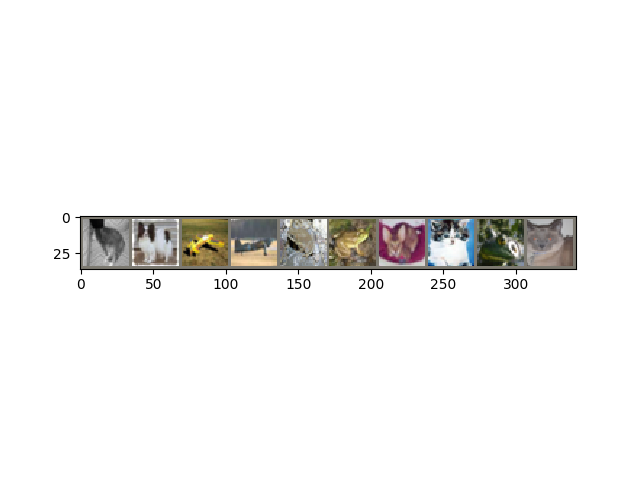

Predicted:    cat   dog  bird plane  frog  frog   cat   dog  frog   cat


In [36]:
def imshow(inp, mean=None, std=None, title=None):          
    # Check if input is torch, convert it to numpy
    if type(inp) in (torch.cuda.FloatTensor, torch.FloatTensor ):
        if inp.shape[0] == 3 :
            inp = inp.cpu().numpy().transpose((1, 2, 0))
        elif inp.shape[0] == 1 :
            inp = np.squeeze(inp.cpu().numpy(), 0)
        
    if mean is not None and std is not None:
        inp = std * inp + mean
    plt.imshow(inp.clip(0,1))

    if title is not None:
        plt.title(title)

try:
    images, labels = dataiter.next()
except NameError:
    dataiter = iter(testloader)
    images, labels = dataiter.next()

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

# print images
plt.figure()
img = torchvision.utils.make_grid(images[0:10], 10)

imshow(img, (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

images = Variable(images.cuda())
outputs = model4(images)


_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

<font color=blue>**Which are the mostly confused classes and why are they confused in your opinion?**</font>

## <font color=Red>Extra Task</font>

Run the last network (with data augmentation) three times and plot the convergence curves for the three runs as we did in the second task.
Are they identical ?